
<div align="left"><b> IMT Mines Alès (2019-2020)</b></div>



<p><a id="top"></a></p>



<div align="center">
<font face="Times" size="6">Analyse et calcul numériques<br/><br/>
        TD7 - Interpolation polynomiale<br/><br/><i>Solutions des exercices</i><br/></font><br/>
<font face="Times" size="4">P. Guyot, X. Picamoles, L. Pissot, E. Rousée</font>
</div>



<div class="alert alert-info">
<font color="black" face="Times" size="6"><b>Table des matières </b></font><br/><br/>
<font color="blue" face="Times" size="5"><b><a href="#Exo1"> 1. Problématique de l’interpolation</a></b></font><br/><br/>
<font color="blue" face="Times" size="5"><b><a href="#Exo2"> 2. Fonction native</a></b></font><br/><br/>
<font color="blue" face="Times" size="5"><b><a href="#Exo3"> 3. Les pré requis</a></b></font><br/><br/>
<font color="blue" face="Times" size="5"><b><a href="#Exo4"> 4. Méthode directe avec abscisses équiréparties</a></b></font><br/><br/>
<font color="blue" face="Times" size="5"><b><a href="#Exo5"> 5. Le manque de stabilité vis-à-vis des données </a></b></font><br/><br/>
<font color="blue" face="Times" size="5"><b><a href="#Exo6"> 6. Le phénomène de Runge </a></b></font><br/><br/>
<font color="blue" face="Times" size="5"><b><a href="#Exo7"> 7. Méthode directe avec abscisses de Tchebychev </a></b></font><br/><br/>
<font color="blue" face="Times" size="5"><b><a href="#Exo8"> 8. Méthode de Lagrange</a></b></font><br/><br/>
<font color="blue" face="Times" size="5"><b><a href="#Exo9"> 9. Le cas paramétrique</a></b></font><br/><br/>
<font color="blue" face="Times" size="5"><b><a href="#Exo10"> 10. Perturbation de l’interpolation de Lagrange (facultatif) </a></b></font><br/><br/>
</div>



<p><a id="Exo1"></a></p><div align="right"><a href="#top">Haut du document</a></div>



<ul>
<li>Import des packages Python</li>
</ul>


In [1]:

import numpy as np
import matplotlib.pyplot as plt
import numpy.polynomial.polynomial as poly  # ex 2


import scipy.optimize as resol

import time
import scipy.linalg as la




<div class="alert alert-info">
<font color="black" size="5"><b>1. Problématique de l’interpolation</b></font>
</div>



<p>Les techniques de l’<i>interpolation</i> ont toutes le même objectif, faire passer la courbe (ou la surface) représentative
d’une fonction à déterminer par un ensemble de points donnés.<br/>
On peut être plus « souple » en cherchant à passer au plus près des points mais cela n’est alors plus de l’interpolation,
on parle de préférence d’<i>approximation</i>.<br/>
Dans la pratique la fonction cherchée est très souvent polynomiale même si ce n’est pas une obligation et que l’on
peut utiliser pléthore de fonctions. Dans les exemples qui suivent, on se limite à l’<i>interpolation polynômiale</i> en
s’appuyant sur le résultat bien connu suivant.<br/>
Soient $n \in \mathbb{N}-\{0,1\}$ et<br/></p>
<ul>
<li>n + 1 réels distincts rangés dans l’ordre croissant $x_0 &lt; .. &lt; x_n$.<br/></li>
<li>n + 1 réels $y_0, .., y_n$.<br/></li>
<li>n + 1 points $M_k(x_k, y_k)$.<br/></li>
</ul>
<p>Il existe alors un unique polynôme P à coefficients réels et de degré $n$ tel que $P(x_k) = y_k$ pour tout $k \in [0,n]$ dont la courbe représentative passe par les $n + 1$ points $M_k(x_k, y_k)$ comme illustré dans la figure 1.<br/></p>



<p><img alt="image.png" src="data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAVQAAAEvCAYAAAAadzm3AAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAADsMAAA7DAcdvqGQAACv/SURBVHhe7d0JfBNl/gbwp0g5Ki3SUkCOWoVCQQFpqxQQpS5UpaD8uW9ZBURWRMG7dUGXY1VElEVBWGVFFFBW5VpFVkGFggUKIqd05So3FShtgULf//wmE0ivFMqkSSbP9/MpSWbSdJhMnrzvO++8r5/SgIiIrlk545aIiK4RA5WIyCQMVCIikzBQiYhMwkAlIjIJA5WIyCQMVCIikzBQiYhMwkAlIjIJA5WIyCQMVCIikzBQiYhMwkAlIjIJA5WIyCQeO3yfn5+fcY+I6Oq5I9o8OlA9dNOIyMO5Kz9Y5SciMgkDlYjIJAxUIiKTMFCJiEzCQCUiMgkDlYjIJOw25eEyTp/FidM5xqPLIupWM+4RUUHuyg8Gqgf57cAf2Lo3AylpJ7D7eBbWHc021hSvX5NQ1A2pjNvDQ9CoXjCCgyoZa4h8FwO1AF8JVAnRFZsPYP7GQ9iTlYuWNQLQrlF1RNxYFTfVCERAxfKoExpoPNsm59wFHDiWieOncnDkZI4ewHO3HdPXdQy/AfFNa+HupnUYruSzGKgFWD1Qk7cexJRvduqlUAnBAW1vvuYSpoTzup1HsHjzIf11pfTaKbouWt1a23gGkW9goBZg1UB1DNLn24ahV9sIl5Qk7SXf137cp5d6+7QMw30xN6GyVuIlsjoGagFWC1QJuLeWbMOyPSddGqQFyUmtH7akY8p3afrjpIRItI8K0+8TWRUDtQCrBKq0dy78aTeSvk3Tq+CjuzRzS9um43ZIiXVcz9vZU4Asi4FagBUCNf1YJkbNWY8jWbkeUzKUEuus5dvx7vqDGB5TG4PjG7sl4IlciYFagLcHqrSVvvjvX9Ek9HqM6xvtcaElTRBJCzbpYT+x6208cUWWYqlA3bdvH2bMmKHfj4+Pxz333KPft1u1ahVSUlLQqVMnREZGGkvz8+ZAfW/pFv1k0LgO9dH/T0X//zyBYzOAlFZHdG6Kynm5wP79QL16QOXKxjOJvIulAnXHjh3GPeCRRx7B4sWLERISoj+WdUlJSXjxxRcxceJEfPTRRwgICNDXOfLGQJWAmr1iux6mnw5o4TWlPimtDvkwBTXVBUz+zwzU2fMzUKEC8Le/AQMHGs8i8h7uyg+XXMtvL3WmpdnOLFd2KOnIsu7duyM6OhqxsbF6adYKJExHf7hO76C/evTdXlWFlpNT/3nuXjQ4fBht7hmKFdF9pZoBvPyy9h8rfNkrERXNpYOjbN++Xb/NcfhQZmZmIjDQduVPUFDQpdC1k28W+fEm9jDddiwLc4e1KnRlkzeofOwwxn+RiCm7kjH4tnvxXv83kFO+qq36T0RXxGWBKqXUZ555Bs2bN0dWVpaxVCsNRUQgPT1dv5+amqqXUh1JMd2bqvpWCFNd3bpAWBi6fDEe366cjfk162N0x2eRc9MtxhOIqCQuCdR58+YhMTFRr9qLMO2DKm2nsiw8PBzLly/X1wUHB19qW/VGlglTu1mzgFatELHuc8zd8hlQrwYeeP07vfsXEZXMZd2mJEBDQ0OLDUxpO5WgLY43nJSSs/nSZmqJMHWUkQHt2856XxjkM9yVH+yHWkr2rlFyAsrKQSOh6o09F8i3uSs/OGJ/KazYuO9SwFi91CaDqTye0FQff6DPnFT9ggUiKhoD9SpJn83BC7ZgSudInyqtMVSJSsYq/1WQ6+C7vv0DekXdqAeML5LSuXyhsPpPnoxVfi+Q9MkG/dr8Qe0bG0t8jwzwImHKkipRYQzUK/Txf3foZ7sTuzXz+UGapWTKUCUqjIF6BTanHdMHEJFRmdh1yIahSlQYA7UE0m468pNU/YQM2wzzk/3BE1VElzFQS/Dml7+g5vX+Pt1u6gzP/hNdxkB1Qs5oy/TMMl0IJ7crnj1UZUBtXqZKvoyBWgyp6o9bukPvb8q5l0omodqxcSj6TU9mqJLPYqAWQ6r60kWqS5v6xhIqiYz4L/tM5tGSS1aJfA0DtQjSFihV/ac7NTGW0JWQZpE3/9wSIQEV9EFVGKrkaxioBUgISFugzAfFqv7Vk1CVvrrSZ3fq4i3GUiLfwEAtQEZWEt3uaqDf0tWTvroy3J9MVS2jchH5CgaqAxn4REaRertvC57Vv0YSqtLxX/Ynu1ORr2CgOnhryTb0axKK5vVDjSV0LaTjv/SSkD6q8mVFZHUMVIOUopbtOYnhD7ADv5mkl4T0UZVpqtmdiqyOgapxPBHFa/XNJ1eZSXeq8Qt/4Zl/sjQGquab9Xv1W56Icg1pjx7XN5pn/snyfD5Q5YqopxbvQFJCJE9EuVBwUCXM/PMd+pn/L1enGUuJrMUlI/bLjKYzZsxAtWrVEBcXh+joaGPN5XV248ePN+7lV1Yjbku3npU7j2P+qDhjCbmSfcT/r4bcyZN/5DKWGrE/OzsbXbt21cN0xIgR+mM7uZ+RkYEBAwboP+4kpVPp1vPUfY2MJeRqMuK/nKSSIRFl/xNZiUsCNTIyUi+VNm7cGMnJycZSm4CAAGzevBlLlixBVlaWsdQ95Hr9juE3cJzTMmY/SSVTyhBZicvaUKUkOnDgQD04JUTtqlevjnnz5uml15iYmHylVyFFdflxNekXyev13cPx8lSZWobIKlxW5R89ejTi4+ORkJBgLLWRcA0LC9NLsN26dUNOTo6xxkbaPcqi7WP2d7/pnfh5vb57SPc0mVJGppaRKWaIrMAlJ6WkBNqnTx8MGzYMwcHBeOyxx/SQnTNnDpo2bYotW7Zg586daNSokVtOSknptMM/1uDbJ1ozUN1MTgrO33hIv/affYDJLO46KeWWefl37NiB0NBQhISEGEsKc+UOSfzoZ/12/MA79Vtyr+HTV+u3MvQfu66RGdwVqG7phyonrZyFqSvZ204H3RthLCF3s3f6t4/0ReSt3BKo7sS2U88jnf5lhC/pwsb2VPJmPhWoLJ16LunkL2MpsH8qeTOfCtQVmw+wdOrBZCwF9k8lb+YzgWq/KqpTdF1jCXkax/6pvN6fvJHPBOr8H39DyxoBvCrKw0nXKRmoRgas4aDU5G18IlB5zb53kev9h8fU1gel5vip5E18IlB/2JLO0qmXkTn+BcdPJW9i+UCVEs6U79LQp2WYsYS8gbSn2sdPlSH/iLyB5QN10+6j+u19MTfpt+Q9pDeGdKUat3QHu1KRV7B8oE75Zid6Rd3ISxq9VP8/RepdqWSoRSJPZ+lAlatu1h3NRq+27MjvzaQrlVyQwa5U5OksHagLVv+ud+SXSxvJe0lXKpnfX7pScSpq8mSWDVRpc5NSTc82NxtLyJvJ/P7y5cipqMmTWTZQl6Xs0btKcSI46xjdxXYV1cKfdhtLiDyLJQNVSjCz1uzDkHb1jSVkBdJ0Yx/ln1dRkSeyZKBKV6k9Wblow478liMXZ8hVVEkLNrHqTx7HkoE658ff9amK2VXKmuQqqiPaFyar/uRpLBeochZ42Z6TePDOcGMJWY18UcqA1Kz6k6exXKAu+nmPPtc+J3yzNjnZyKo/eRpLBap8sGQGzQFt2VXKF9ir/pyLijyFSwJ13759SExMxKRJk7BhQ+HR11etWqWvk9lPTXPgADYt+lG/e3uDGvotWZu96s+5qMhTuCRQZQ7+rl27Ii4uDiNGjNAf20mITp06VV+XlJSUb12pDRoE3HUX5qzaj157tqHy3v8ZK8jq7FV/mYuKVX9yN5cEqkwTHR0djcaNGyM5OdlYapOWlobu3bvr62NjY/XS7DXZtAlYuRLpN0RiWZUQtN+6Gvj4Y2Ml+QKOnUqewmVtqFLyHDhwIJYsWYKAgABjKZCZmYnAQNsJo6CgID1gHfn5+ek/VywlBdi7F9vr3oqWZzMRse5z4NNPjZXkC+xVfxk7lVV/cieXVflHjx6N+Ph4JCQkGEttIiIikJ6ert9PTU3VS6mOlFL6zxV74AHgppvQfulkzP5srG3Z00/bbslnsOpPnsAlgbpo0SJMnz5dD0w5OSXVemk7lfvh4eFYvny5Xu0PDg5GSEiI8VulVLcu8OqrQFQUKh/cCbz8MtC7t7GSfIm96s8O/+Quflpp8CqKg+aRkA0LK35aEqn2X/Wm5eRo9b/KxgPyRVLlf2jmz/j2idb6iP/km0qVHyZwW6CWxF07hLzf65+nYsO+k5j9l7a8/NhHuSs/XHZSishdeK0/uQsDlSyH1/qTuzBQyZLkrL+M8M9r/aksMVDJsmSEf1b9qSwxUMmyZIT/pIRIVv2pzDBQydLaR4XpVf+3lmwzlhC5DgOVLM8+uR/n9SdXY6CS5dmr/pzXn1yNgUo+wV71l3n9iVyFgUo+Y/gDjfX5xlj1J1dhoJLPkHnGpnSOxJTv0pBx+qyxlMg8DFTyKV3a1EeT0Ovx5pes+pP5GKjkcxK7NcPcbcewYuM1zhZBVAADlXyOveo/bukOVv3JVAxU8kn3xdyEmtf7s+pPpmKgkk+SEanG9bxdr/pzHioyCwOVfJaM6D+uQ33OQ0WmYaCST+t2VwO96s8pqMkMDFTyafaqP6egJjMwUMnnSdWfU1CTGVwySd+JEyewcOFC7N27F+PHjzeW2shspzNmzDAeodB6O07SR2VJgvSB17/D4NZh6P+nSGMpeSvLTdJXp04dTJgwwXh0WXZ2NjIyMjBgwAD9h8gTcB4qMoNLAjUkJAQJCQnGo/wCAgKwefNmLFmyBFlZWcZSIveTeaik6s95qKi0XDovf1HFbimhHj9+HMeOHUNMTIweqhKydvI7dqzyU1lj1d8afGZefgnPsLAwREdHo1u3bsjJyTHW2MhOYJCSu0jVn/NQUWm5JFDlxFNiYqJ+X27l8Y4dO/T78+bN02+7d++ORo0a6c0DRJ6E81BRabm0yl8cCdfQ0FCnYcqz/OROMmhK17d/wFP31teH/CPv4q78cEugXgkGKrmbDO83eMEWrB59tz5CFXkPn2lDJfIWUvXvGH4D56GiK8ZAJXJCBqPmPFR0pRioRE5wHiq6GgxUohJwHiq6UgxUoivAeajoSjBQia6AVP1lMGrOQ0XOMFCJrpB9MGpW/ak4DFSiK8R5qKgkDFSiq8B5qMgZBirRVeI8VFQcBirRVZKq/0sP3cZ5qKgQBipRKdgHo57w1a+s+tMlDFSiUhrRuSmOZOVi4U+7jSXk6xioRKXEeaioIAYq0TXgPFTkiIFKdI0Gxzdm1Z90DFSiaxQcVOnSPFTpxzKNpeSLGKhEJrDPQ8XBqH0bA5XIJKO7NMO2Y1kcjNqHMVCJTGKv+j+1eAer/j7KJZP0nThxAgsXLsTevXsxfvx4Y+llq1atQkpKCjp16oTIyEhjaX6cpI+81fDpq/Xbd5tq/4SGAg0b6o+p7Fhukr46depgwoQJxqPLZArpqVOnIi4uDklJScjOzjbWEFlDYpua2JZ2FF9O+QZo1w5o3RrIyTHWkpW5JFBlvv2EhATjUX5paWno3r07oqOjERsbi337OAI6WUudr+YhaftPeKp+S6TXaAbs3w8kJxtrycrKvA01MzMTgYG2Oc6DgoL0gHUkRXX5IfJaq1ej/dLJ6PfHQYxv0xc5edcDK1caK8nKyjxQIyIikJ6ert9PTU3VS6mOpN2Dbafk1YYP129Gr/wQ2yoHYuE9A4H+/fVlZG0uCVSpxicmJur35VYeS9up3A8PD8fy5cv1an9wcLDePEBkKe3bA2+9heCz6Ug6sAFJYc3xW0CosZKszCVn+a+EhGxYWJjxqDCe5SereP3zVGzYdxKz/9JWH1CFXM9yZ/lL4ixMiayEw/z5DrcFKpGvcBzmjyP8WxsDlagM2If54+R+1sZAJSojUvXn5H7WxkAlKiP2ef1lcr8VG3lBixUxUInKkMzrP6VzJMYt5QAqVsRAJSpjXdrUR5PQ6zl2qgUxUIncYFzfaH3s1I//u8NYQlbAQCVyA8dpUzhjqnUwUIncRKZNka5UQz5MYVcqi2CgErmRvSvVuPkbjSXkzRioRG4kXakmD4jB3G3HOBeVBTBQidysTmig3pWKc1F5PwYqkQeQrlQyDfWoOevZnurFGKhEHiKpV5Q+KhUvTfVeDFQiDyHtqTP/fAcvTfViDFQiD2K/NHXwgi1sT/VCDFQiDyPtqdI/td/0ZLanehkGKpEHYv9U78RAJfJA9v6pq/ee5PX+XoSBSuShpH/qxK636df7J289aCwlT+ayWU9XrVqFlJQUdOrUCZGRkcZS22ynM2bMMB4B48ePN+7lx1lPiWzeW7oF8zcewtxhrfSQpZJZatZTmYN/6tSpiIuLQ1JSErKzs4010O9nZGRgwIAB+g8ROfd4QtNL46fyJJVnc0mgpqWloXv37oiOjkZsbKxeKrULCAjA5s2bsWTJEmRlZRlLiciZN//cUh8/lSepPJtLAjUzMxOBgbaqSVBQkB6wdtWrV8e8efP00mtMTEy+0quQorr8ENFlcpJKqvxykkqaAMgzuSRQIyIikJ6ert9PTU3VS6l2UkINCwvTS6/dunVDTk6OscZG2j3YdkpUmP0k1Ws/7uNJKg/lkkANDw/H8uXL9Wp/cHAwQkJC9HbVxMREvXQqt7KuUaNG+joiujKtbq2NcR3qo8+cVF5J5YFcdpZfSNuplEYLknANDQ11GqY8y09UPJ75d85d+eHSQL0WDFSi4snZ/tEfrsOJ7POY/Ze2ehsrXcZALYCBSuScPVSF9AJgqF7mrvxwSRsqEbmeBGhit2Z6dyqOoeoZGKhEXkzaT6Udddn2Y+xO5QEYqERezrE7FUPVvRioRBYg3ak+HdBCD1XOnuo+DFQii7CHqsyeyo7/7sFAJbIQCVWZQkU6/jNUyx4DlchiZAqV59uGMVTdgIFKZEEy5B9DtewxUIksiqFa9nilFJHFyVl/OVElbavSHOALeOlpAQxUIvNICVVKqlJilZKr1fHSUyJyGcd+quz87zosoRL5kN8O/IEhH6boc1RZeUAVVvkLYKASuYYMTD1qznr9vsz9b8XxVFnlJ6IyIQEqY6iGBFRAv+nJ2Jx2zFhD14olVCIfJu2p0q5qtR4ArPIXwEAlKhsrNu7D4AVb0K9JKJJ6RVmiXZWBWgADlajs2NtVj2Tl4u2+LdC8fqixxjsxUAtgoBKVLZlSZfaK7XoTwPCY2hjRuanXllYtF6irVq1CSkoKOnXqhMjISGOpjbN1dgxUIveQk1QjP0nV78vA1dKH1a127QK2bAE6dgQqVzYWOueu/HDJWX6ZJnrq1KmIi4tDUlISsrOzjTXO1xGR+0l1/z/P3YvBrW3jACR+9LPef9UtunYF2rUDuncHAgKAdbZJCT2VSwI1LS1N+/93R3R0NGJjY/X5+e2crSMizyBV/f5/isS3T7TWH3f4xxq9R0DG6bP64zIhJdO1a5ERGI7kDo/blo0fb7v1UC4J1MzMTAQG2joLBwUF6SFq52ydkKK6/BCR+0XUrYbxA+/EV0PuxMqdxxE14b94/fPUMimxZmz4FR/fPRxR/5eIKU3uti3cvNl266FcEqgRERFIT0/X76empuolUTtn64S0e7DtlMizSDPA/FFxerCeys7VS6y9Jn+vD7oiJ7PMJGEtpeGozRWxuFYDfLpxKea/3ce2csgQ262HcslJqRMnTuCxxx7T7zdq1EgrpY/X207nzJmDUaNGFVpXFJ6UIvJc0s1q0c97MH/jIezJytV7BUTdEoLG9aqV6lJWCdF1O49g8eZDWHc0Gx3Db8CAtjej1Zn9wDvvAD/9ZAvT0aOv6MSUu/LDpd2mpH00LCzMeJSfs3WCgUrkHaRXwJodh/UmAQlDIRcJ1A2pjBtvCECVyv64qcblkN17NBNncnJx6GQ2DpzIwdxttktfJURbR4Sg4x3hCA6qpC8rLUsG6rVgoBJ5HzlptXN/Bo6czEFK2gl92e7jWZeCVrSsEYAG1a9H1QB/NLwxCDfXCkLDutVM7fPKQC2AgUpEpeWu/OBoU0REJmGgEhGZhIFKRGQSBioRkUkYqEREJmGgEhGZhIFKRGQSj+6HSkRUWu6INo8N1NLwhosBuI3m4Daah/vSPKzyExGZhIFKRGQSS1X5iYjciSVUIiKTeGUJVQawXrhwIfbu3VvkANVXMquqqznbRhkLdsaMGcYjmSbHPfPk2LejWrVq+qSJMs+XI0/YjyVto6ftSxEfH4977rlHv2/nSftSFNxGT9mPdkuXLtVn9hg6dKixxMYT9qNTEqje5vjx42rJkiXyRWAsuWz79u2qW7duav369fptVlaWsaZslbSNw4YN02/lx13kb8t+kp9WrVrl21eesh+dbaOQ9Z6yL+0/sp3y/tvJMk/Zl8620RP2o5C/L5+bl156yVhiI8s9YT8645VV/pCQECQkJBiP8vOUWVWdbWNAQAA2b94MLXChHRTG0rIn3/Cynxo3bozk5GRjqY2n7Edn2yg8aV8K+6STlR2m6fCkfSmK2kZP2Y9CppdfuXKl8egyT9mPzliuDbWkWVU9QfXq1TFv3jy9ChsTE4Ps7MujmZc1+dsDBw7UP0jyobLzpP1Y3DYKT9qXQitF6bc5OTn6rfC0Y7KobfSU/SjbIKFZs2ZNY8ll3vDZtlygljSrqieQUJD5tOSbVqu65Duwy5J8aEaPHq23pxUsTXvKfnS2jcJT9qWQEuAzzzyD5s2b5yvledIxWdw2etJ+3LJlC95++218//332LBhg7HUOz7bXhmoUtRPTEzU78utPJZZVeV+eHg4li9frn/LBQcH61Vvd3C2jfItLLeyjTLzq7u2cdGiRZg+fbp+cBbcRk/Zj862UXjKvnTcDiFfBPZt9JR9WXAbJUA97Zjs3bu3fkJs5MiRl05Cetox6Yxl+6HKB8/ZrKruJgdJaGioRx4Ujjx9PwpP2ZclbYcn7Etn28hj8tqxYz8RkUnYsZ+IyCQMVCIikzBQiYhMwkAlIjIJA5WIyCQMVCIikzBQiYhMwkAlIjIJA5WIyCQMVCIikzBQiYhMwkAlIjIJA5WIyCQMVCIikzBQiYhMwkAlIjIJA5WIyCQMVCIikzBQiYhMwkAlIjIJA5WIyCQMVCIikzBQiYhMwkAlIjIJA5WIyCQMVCIikzBQiYhMwkAlIjIJA5WIyCQMVCIikzBQiYhMwkAlIjIJA5WIyCQMVCIikzBQiYhMwkAlIjIJA5WIyCQMVCIikzBQiYhMwkAlIjIJA5WIyCQMVCIikzBQiYhMwkAlIjLJVQbqBWSuT8LLjzdETKAf/AJjUK/Tg7j11lsRE9MEXWMrw8/PD5VeX49zxm/Q1TqA1H/2wKhONyBQ25flonuj3VNzseh0Gv4zqhkeaOav7eNhGHvwAlT6W3jpwXq29+Lhf2Or8QreSyH3yI9Y8r9M7Z4bnf4YkzrXR7tbysGvwSR8dsFYfpWKfn9ykbG8AyLKPYie6/7Ql9icwdGfV2Bj5kXjsfW45nj1kGPGTpVG7gL1Rn1t++u/oRbkGstE3l6VMj5MVXwtRZ01FlnLRZWz9TX1txHt1MD4UFUf9VWTBfuMdebKXdtDe33k35d5a9Wn3Stox81jaky6bcfn7X1B9ZKjauBC9au+xGx56vyh9Sr19AXjsVky1aG1aeponvFQnJ6rXm/rrxDxhBrzu5uPoJw5alx4Ecf4VSr8/lxUWWt7qVb53ttclbm2j4rz81OVHv5crb+oL7x659PU2p2ntHfMc13b8erhx4zG3Cq/XxiiOndAiGW/ZMuhYr32aP/QQHS+3R9pxtIy4+cP/4p+xgMbv/IVUdG47xJqA74a1g0TtuUYC8yhDkzCc3GfY6XjsXJdRVS4Tu74o5K/m1ujZL/q23JtCr8/5RAQ3Q1dKt6BdnfebKwrh+vK+0P/cxUroMBbfIVycPDfvRD35W84byzxRNdyvHr8MaMxfQvKNZ2F9BdjtJ2Wh5zf3sP7T96EYL8GqPfkDLz72xnjWSIXZ36bjhmjIlGjSX/cP2o0xjzZAq0r344GT3yERZl52nPO4ljKGLzWJ1ir5rZG01c/wiz9NeS1Z2H2q80R4xeMqv3+jqSUo9rSAn9z6Bg8/2x79L4lEDWHvY856Wf1v2z7/fzP69mzp/7cgVpQOmuy8AuMQuyf+qJNdC1jiafKxekDJ7Q9WIDKwIHDV9ogk4fsnydh8lc3G4/NchAb5szEnNoFDr+Abhj5/XmoXZPxQh1/Y6HVaMfeL8vw3oAkvNEm2FhWDpWj/4Vv87R1MzrjttIEavYifPLWRu3VPaLi6wJecswYJdWrU1yVP3utmvvTYa1Sc5mt6tpO9VibaSwR59XpzU+q/pUaqdumb1JHLhXh81Tu7y+ph8sNvVSlVVql6OD8qHzV3EvSx6iBRVS7C/3N45PVUzW16tSTy9Quh+pC4W3LU+c2DFA3TlhfQpOFfZvKuMqvNqjP+1XMvy/0fXC5CnVxd5J6pGl5+VQ5VKtOq93zWqroKvJpc9xmrTp/YJqaEF9L1ejQRfVsF6TKRQ9Vj6//Q1u3S618pbm6X3+tG1VQu66qSZOHVI/vdqrUqW3U/7WspC0fop5fs1T94+EQVQV3qfu+P67yTq9QX4yNUS2CWqjbOtyi2tTwV1UfnaP+Y28yODFLje9c17YtVaJV3YTOqknsRDXrf0vVO33CbMvzHVfasbL172pi72BVrsUDKiGhrmpRrpW67ZWv1Hf21zw1R03qYntNv8e+ULuM51eRfYBIFTbmW7XlvLOKcKY6suZZ9dID1VSllg+pztrfaFyxoqpfaFs0539RP73ZWjUOvcvYljYqavKP6tfiXr/A+6PydqoVI96/vD+06v7p5MfUI9q+l+21vd8X1KkfBqm++rJIFfXvX9X2z3qqh5sb72v9buqhr/epHP33z6uM//ZVvY3f94vqqBpHR2v7Z6Xaq68/rdJXDVOPNayh7et4Fd+4oqr65/fURwfktw8W/15++5Na8GiEuudmP4XwsWrypnlqxoib9GMSqKIqdhyjXtl60qF54QreJ1Fwf2i885gpmomBmqfOruupQibmbz8tMlAvrlQfda6gyg1aqH4ptM371U/9O6uJR+xvggmBag+iAh+OIretiC+Fwjw3UEXR7VTZau/HTfNvs/Y+/KtTZVVj8kZ1Uh7n/a7W/DXc4f90VKVMDNV+p8A+UukqeWyItryKqtR3opr2ZifVpdYg9fTWzWrR4CDtoO+lHv3ltPY8e3thuAqfvVOLDkNxX8iF2i21wP99jBrWwE+Ve3iBSsmVg8X2pTsoUPuCHLJQrbcf9PbfRT1V4+m56svDZ7UP6n/Vp8OractsYV+08+pUcl/V3i9MhU1ab3y5n1eZ6/qqONmHjtuYt1utGVNX+TV8Vk3cL4F0Tp34Jl5FooVq+vFObQ8XoYj3p7A8lfPTQyo83/t9eRmq3K/iZq9Xu85fUJm7ktTIhlrIRY5Vs05dPkqLPl7OqYwfu6s4v1jV+os9tgA+8Q/1XEQ5VWngPLX6vCwo5r3cpr3fl9rsZd3batquUyrv/A61cdZd6g7tb/m1f0d9mWV7T674fSr0BbPBC4+Z4l1blf/IPIzqYjvLHx/fAPf1/gxnruAV87bOwfuLa6N++6giqjd10WbOIrxQw4QGLLu8P3Dq8EWUax+J5s5eVm3F10N2oXZsTfPbQspQ0e1U5eDvX6BKdPh7/HfJDcC58zinHULSBt78wR6ICSmplcsf5SvKHmqKe4YMxfBRi/HFoQ8xubE/qtYORdXeffHUbYHa+nIIqBeJCOzBoSOnUWLTeqF2y3Ssn/0upu+Owt194xBTXg4WP5QPfwQDhgbi7MypeHXdKdtT7b97Y2+8kNgTD9WsCL/AdujcIxb1sAlrNh0oum0xbw2+mvA5VtTqhacGNUcN/Xj0R5WoLuioJZSjvLRpeP3NAyjfszOG1K2kLamA4DY90aNeKrZM/w4/lPrcgfZ/Kl/B1oZ6yeVl5R99Ch8MjEaE/3WoEjEYXbtr79mOtViZVkK7dl4ylry+CN/XvQ+PdAiDbDGCOyGhR1Wc/ehTfLAjW1tQ3HupldUutdnHo98Lj2J4RJC2qBFaPDINLw+5HmrFP/Ha90e19VfxPhVS2fuOGSeuLTdq9sbkLxdh69atWP7Nasx6ORp6pcSpXJzctwtbEY7bG1TX/qsulrsTqR+Oxavrh+LZke3QsNAf3I/kf76ht6GOfX4gxi48hGMl/h8sIrQ12nY6gaMv/h8a9hmLv8zbhPRmr+Ff99YwnlCSigiqXMG4r/FrjLtf2Y2TMx/EbTiKPd9PwLS/z8ZqY/VVy9uJ7T9J16JmiI2salumq40GLW7SbnciZfth5OvVFFADdauWNx6UQ8XKVbTYO4Pz53OlKFKIOvA1li7WPjZ3NkVssP33ipKDA+tW4Msz4QiPrAd766ecFNE/lJu2IfVEqRPVqetqh+DGS8dtAAICZTvPat+Dzg/US/+31o3RIsD+Av6oUEE+9trn4n+O3bYKvJf5hKKu45es3y24tVU97U4afv3tMC6W5n2y88JjxhnzCmJ+tdDgocfRs1qVEl40D+eysuD4Vtocx+5lEzB27FjjZx4WHc011pWGLSj/+uLDeOEvZ1D9rccxKlL71i2kHlo9+iwWLFiAMUkj8cANJqbpwbF42M9P75tb7I87+4/6d8Cg96bird7ncHH+K3i3TzQa3voYnvjl5FUfSDbGicbRjRAZMAj9kuujWfeOaGWsvWp5GcjYI4d+BVTUSxp29tL2IWT8cabkUowTFw+lYb3cqXo9gpx+u5/B0f2Htdvj2Dftadym1cqkZnZr9ER8EtAEt/VthZaB5n2czHDp/7Z+Onp2aG/b3ls74NEFNdEk9gHEN3QMnKvhj8rXB2i3Ruhc0/vkfceMM+YeAcGP4IOhkdrudsYfQTVqajGWju37Tjh8cKujQccnMaz5d/jglWX4oc296FzD+Ss5ZwvKVyf9gE8WVsWBR8fipV8dexkU5hfUEX3evBdR+etepVd7LP5la6cu/udfXXGr8fSypjJ/xYbyD+OpTw/jUNrHmP9KM9xxaCamPT4Hi0so/RTp9L/weqfhGJb8KJKOLMbql3qhbYMapT/IygUjOFxKDudx7oLj9uQhN1e+bG9EsPYFfi1vV7mAIO1VNIdP4ph0LClRTdR/+h29Vub4s2VGH8RVdprI7tNmBL5asSL/NidPxkSp1pdKLnKypLmgHmrVuAHXXcv75IXHjDNu+Eoth+ujumJQw93YtmwDfs33ua2C6rVrad8t16N6UIDRHFAB1erUQzj+h2375U20Uzh3YDs2azuowY1BxrKiVEBwZBRi1c9YseGwtludqY6GfRvjuvlTjG5bXu5crq1tVJeNTO2b2ZHa8w56vrsRGdqXXJVb+qHnXxdh0pPVgDVbsfH41X+HX9i+HJ/s0v5gRAO0CLIdsurCudJfNVeuERrfpW0PfsHaHY5tcAexO3WvdtsIdzSuBXtlrTTK3RSLOGkHWrMa3+x3aDE7dxqn8zWg3YBbmkaimlbN3ZXym1bOcaB24sdJa5GW71h2v/INWqGT7L5v12PVKcfj+SyOrpqOz0tdAzyCPVsParfN0LZ5Lfhdw/vkjceMM+6powT1xOBXY1F/9jj0fX8zjjo9EP1QqcUAjLz7B6z45lcctj9X7cXG//yIX9r3xCNRzgJVe4U6UbgjfD/SN6VhX0kHfe4aLH9pD9JKU0LzFNVvR3Qr7a1d+hleW30Iueow0r4eiXGTfjOeYFMupA7uHj8Nz/9yyqgpZCPn9AX4dWmN+FpyyJU3qnb7sWnbQe1jeFHv21rcx7B843j0lXBavBTvbdMO5twdSFnwJZZr6y4ePIFD9l3qVwVVamnbd2Qrkvec1d7L4vrG1kHMIK300mAjfvjke6zXSxwKF/Z8gDnvZ6LSkBH4a8vSVlsNQQ+i5xMNUOXMAkxJmo0FR85pJfefsWrmVMzbbzxH54/guJEY084fF96bimFLdtva2uX/+HZ/DPTT1ruxgGovaZ/fuAMbtDdInU5HelBfDEoMR5VDn2Li5K+RrF/WegZH1z6FIYPOwr/KlcbKKiz8fq/Rp1mrov8yCTPeOoOqz47EX2+XUm7p3yevPGac0aqdVyFXnU5JVEnDIi71CQsb9IzqMXOjOmI847KLKnvXu2rGiDBVDfVV3RHT1bRdjl1vpH/cSPV8l1oqqMXD6r6nR6lnRsWrPmFhKmLg39U/9jh2vspTuftnqDd7hKqqCU+qHk90Vk/dH6Kq9Z6iZh5wfJ78zZnqg2fD9b8Z9syHaqb+N4+qHbOiVAO/9qrVtHVqd16ew7bdqKr2ek51799fPaG97tMJVZXfza/n75pxifb/X/+kGnhvI6N/ptHv7+6harjed9MM+9XGWd317ZA+cX5RvdQ9Iz9WK/YtVB8921J1lH6BiFR1h4xRT49+WI0ZHKZ3l0H9B1Wr0XPVV6elK805lZE81KHf4kOq3TvfqE3/bq/qSR/C+OHqoX9uVKfOb1IrJ96hWlVqouomJKgHIqupGo/NMPoo2uQdnqHG3V9Zex3t99oMVT0/W6wWvtpeDdBf+0YVpL0fD479Wm3Qe/Bo7+nX3VRnfRvl+SPUo4sWqpn9A22P4/+uZh2VHZujjnzXw3hehKrx8Bvq/c9eUW+MbKLu0I+r1qrJyLfVNP1SwpL7FF78fVoRv3tK7V02WL3Qw9a30C9mgIp/5RtjOws4/4taPTXO2Lfy3EdVv/lvqOekS02+bdGOwwMfqfcv9ceUfXu/ajX5hyL6odo+K0W/P44yi9jOL9S3iwpv+y+569U3Dvu+aq/n1cBle2xdi/K2qVVjbjH+VryKHrtErc7WtqnA/03f3/b3+GL+18v/Xgp7N716Kji4gt4XuWt8qKpYsaNq/ebKAv00S3qfitsfWd55zBTDT/7RdjQRUQEbsbB/a3SfOwhj0v+BsbVdVVG2DvdU+YmILIiBSkRkEgYqERWWuQhznhuOD9ZIV4fv8N6LL6PnrFTIdVFUPLahEhGZhCVUIiKTMFCJiEzCQCUiMgkDlYjIJAxUIiKTMFCJiEzCQCUiMgkDlYjIJAxUIiKTMFCJiEzCQCUiMgXw/xSlYsmxyZbvAAAAAElFTkSuQmCC"/></p>



<p>Pour calculer ce polynôme, plusieurs méthodes sont possibles et la figure 2 ci-dessous illustre les différences entre plusieurs d’entre-elles.</p>



<p><img alt="image.png" src="data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAVQAAAEvCAYAAAAadzm3AAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAADsMAAA7DAcdvqGQAACv/SURBVHhe7d0JfBNl/gbwp0g5Ki3SUkCOWoVCQQFpqxQQpS5UpaD8uW9ZBURWRMG7dUGXY1VElEVBWGVFFFBW5VpFVkGFggUKIqd05So3FShtgULf//wmE0ivFMqkSSbP9/MpSWbSdJhMnrzvO++8r5/SgIiIrlk545aIiK4RA5WIyCQMVCIikzBQiYhMwkAlIjIJA5WIyCQMVCIikzBQiYhMwkAlIjIJA5WIyCQMVCIikzBQiYhMwkAlIjIJA5WIyCQeO3yfn5+fcY+I6Oq5I9o8OlA9dNOIyMO5Kz9Y5SciMgkDlYjIJAxUIiKTMFCJiEzCQCUiMgkDlYjIJOw25eEyTp/FidM5xqPLIupWM+4RUUHuyg8Gqgf57cAf2Lo3AylpJ7D7eBbWHc021hSvX5NQ1A2pjNvDQ9CoXjCCgyoZa4h8FwO1AF8JVAnRFZsPYP7GQ9iTlYuWNQLQrlF1RNxYFTfVCERAxfKoExpoPNsm59wFHDiWieOncnDkZI4ewHO3HdPXdQy/AfFNa+HupnUYruSzGKgFWD1Qk7cexJRvduqlUAnBAW1vvuYSpoTzup1HsHjzIf11pfTaKbouWt1a23gGkW9goBZg1UB1DNLn24ahV9sIl5Qk7SXf137cp5d6+7QMw30xN6GyVuIlsjoGagFWC1QJuLeWbMOyPSddGqQFyUmtH7akY8p3afrjpIRItI8K0+8TWRUDtQCrBKq0dy78aTeSvk3Tq+CjuzRzS9um43ZIiXVcz9vZU4Asi4FagBUCNf1YJkbNWY8jWbkeUzKUEuus5dvx7vqDGB5TG4PjG7sl4IlciYFagLcHqrSVvvjvX9Ek9HqM6xvtcaElTRBJCzbpYT+x6208cUWWYqlA3bdvH2bMmKHfj4+Pxz333KPft1u1ahVSUlLQqVMnREZGGkvz8+ZAfW/pFv1k0LgO9dH/T0X//zyBYzOAlFZHdG6Kynm5wP79QL16QOXKxjOJvIulAnXHjh3GPeCRRx7B4sWLERISoj+WdUlJSXjxxRcxceJEfPTRRwgICNDXOfLGQJWAmr1iux6mnw5o4TWlPimtDvkwBTXVBUz+zwzU2fMzUKEC8Le/AQMHGs8i8h7uyg+XXMtvL3WmpdnOLFd2KOnIsu7duyM6OhqxsbF6adYKJExHf7hO76C/evTdXlWFlpNT/3nuXjQ4fBht7hmKFdF9pZoBvPyy9h8rfNkrERXNpYOjbN++Xb/NcfhQZmZmIjDQduVPUFDQpdC1k28W+fEm9jDddiwLc4e1KnRlkzeofOwwxn+RiCm7kjH4tnvxXv83kFO+qq36T0RXxGWBKqXUZ555Bs2bN0dWVpaxVCsNRUQgPT1dv5+amqqXUh1JMd2bqvpWCFNd3bpAWBi6fDEe366cjfk162N0x2eRc9MtxhOIqCQuCdR58+YhMTFRr9qLMO2DKm2nsiw8PBzLly/X1wUHB19qW/VGlglTu1mzgFatELHuc8zd8hlQrwYeeP07vfsXEZXMZd2mJEBDQ0OLDUxpO5WgLY43nJSSs/nSZmqJMHWUkQHt2856XxjkM9yVH+yHWkr2rlFyAsrKQSOh6o09F8i3uSs/OGJ/KazYuO9SwFi91CaDqTye0FQff6DPnFT9ggUiKhoD9SpJn83BC7ZgSudInyqtMVSJSsYq/1WQ6+C7vv0DekXdqAeML5LSuXyhsPpPnoxVfi+Q9MkG/dr8Qe0bG0t8jwzwImHKkipRYQzUK/Txf3foZ7sTuzXz+UGapWTKUCUqjIF6BTanHdMHEJFRmdh1yIahSlQYA7UE0m468pNU/YQM2wzzk/3BE1VElzFQS/Dml7+g5vX+Pt1u6gzP/hNdxkB1Qs5oy/TMMl0IJ7crnj1UZUBtXqZKvoyBWgyp6o9bukPvb8q5l0omodqxcSj6TU9mqJLPYqAWQ6r60kWqS5v6xhIqiYz4L/tM5tGSS1aJfA0DtQjSFihV/ac7NTGW0JWQZpE3/9wSIQEV9EFVGKrkaxioBUgISFugzAfFqv7Vk1CVvrrSZ3fq4i3GUiLfwEAtQEZWEt3uaqDf0tWTvroy3J9MVS2jchH5CgaqAxn4REaRertvC57Vv0YSqtLxX/Ynu1ORr2CgOnhryTb0axKK5vVDjSV0LaTjv/SSkD6q8mVFZHUMVIOUopbtOYnhD7ADv5mkl4T0UZVpqtmdiqyOgapxPBHFa/XNJ1eZSXeq8Qt/4Zl/sjQGquab9Xv1W56Icg1pjx7XN5pn/snyfD5Q5YqopxbvQFJCJE9EuVBwUCXM/PMd+pn/L1enGUuJrMUlI/bLjKYzZsxAtWrVEBcXh+joaGPN5XV248ePN+7lV1Yjbku3npU7j2P+qDhjCbmSfcT/r4bcyZN/5DKWGrE/OzsbXbt21cN0xIgR+mM7uZ+RkYEBAwboP+4kpVPp1vPUfY2MJeRqMuK/nKSSIRFl/xNZiUsCNTIyUi+VNm7cGMnJycZSm4CAAGzevBlLlixBVlaWsdQ95Hr9juE3cJzTMmY/SSVTyhBZicvaUKUkOnDgQD04JUTtqlevjnnz5uml15iYmHylVyFFdflxNekXyev13cPx8lSZWobIKlxW5R89ejTi4+ORkJBgLLWRcA0LC9NLsN26dUNOTo6xxkbaPcqi7WP2d7/pnfh5vb57SPc0mVJGppaRKWaIrMAlJ6WkBNqnTx8MGzYMwcHBeOyxx/SQnTNnDpo2bYotW7Zg586daNSokVtOSknptMM/1uDbJ1ozUN1MTgrO33hIv/affYDJLO46KeWWefl37NiB0NBQhISEGEsKc+UOSfzoZ/12/MA79Vtyr+HTV+u3MvQfu66RGdwVqG7phyonrZyFqSvZ204H3RthLCF3s3f6t4/0ReSt3BKo7sS2U88jnf5lhC/pwsb2VPJmPhWoLJ16LunkL2MpsH8qeTOfCtQVmw+wdOrBZCwF9k8lb+YzgWq/KqpTdF1jCXkax/6pvN6fvJHPBOr8H39DyxoBvCrKw0nXKRmoRgas4aDU5G18IlB5zb53kev9h8fU1gel5vip5E18IlB/2JLO0qmXkTn+BcdPJW9i+UCVEs6U79LQp2WYsYS8gbSn2sdPlSH/iLyB5QN10+6j+u19MTfpt+Q9pDeGdKUat3QHu1KRV7B8oE75Zid6Rd3ISxq9VP8/RepdqWSoRSJPZ+lAlatu1h3NRq+27MjvzaQrlVyQwa5U5OksHagLVv+ud+SXSxvJe0lXKpnfX7pScSpq8mSWDVRpc5NSTc82NxtLyJvJ/P7y5cipqMmTWTZQl6Xs0btKcSI46xjdxXYV1cKfdhtLiDyLJQNVSjCz1uzDkHb1jSVkBdJ0Yx/ln1dRkSeyZKBKV6k9Wblow478liMXZ8hVVEkLNrHqTx7HkoE658ff9amK2VXKmuQqqiPaFyar/uRpLBeochZ42Z6TePDOcGMJWY18UcqA1Kz6k6exXKAu+nmPPtc+J3yzNjnZyKo/eRpLBap8sGQGzQFt2VXKF9ir/pyLijyFSwJ13759SExMxKRJk7BhQ+HR11etWqWvk9lPTXPgADYt+lG/e3uDGvotWZu96s+5qMhTuCRQZQ7+rl27Ii4uDiNGjNAf20mITp06VV+XlJSUb12pDRoE3HUX5qzaj157tqHy3v8ZK8jq7FV/mYuKVX9yN5cEqkwTHR0djcaNGyM5OdlYapOWlobu3bvr62NjY/XS7DXZtAlYuRLpN0RiWZUQtN+6Gvj4Y2Ml+QKOnUqewmVtqFLyHDhwIJYsWYKAgABjKZCZmYnAQNsJo6CgID1gHfn5+ek/VywlBdi7F9vr3oqWZzMRse5z4NNPjZXkC+xVfxk7lVV/cieXVflHjx6N+Ph4JCQkGEttIiIikJ6ert9PTU3VS6mOlFL6zxV74AHgppvQfulkzP5srG3Z00/bbslnsOpPnsAlgbpo0SJMnz5dD0w5OSXVemk7lfvh4eFYvny5Xu0PDg5GSEiI8VulVLcu8OqrQFQUKh/cCbz8MtC7t7GSfIm96s8O/+Quflpp8CqKg+aRkA0LK35aEqn2X/Wm5eRo9b/KxgPyRVLlf2jmz/j2idb6iP/km0qVHyZwW6CWxF07hLzf65+nYsO+k5j9l7a8/NhHuSs/XHZSishdeK0/uQsDlSyH1/qTuzBQyZLkrL+M8M9r/aksMVDJsmSEf1b9qSwxUMmyZIT/pIRIVv2pzDBQydLaR4XpVf+3lmwzlhC5DgOVLM8+uR/n9SdXY6CS5dmr/pzXn1yNgUo+wV71l3n9iVyFgUo+Y/gDjfX5xlj1J1dhoJLPkHnGpnSOxJTv0pBx+qyxlMg8DFTyKV3a1EeT0Ovx5pes+pP5GKjkcxK7NcPcbcewYuM1zhZBVAADlXyOveo/bukOVv3JVAxU8kn3xdyEmtf7s+pPpmKgkk+SEanG9bxdr/pzHioyCwOVfJaM6D+uQ33OQ0WmYaCST+t2VwO96s8pqMkMDFTyafaqP6egJjMwUMnnSdWfU1CTGVwySd+JEyewcOFC7N27F+PHjzeW2shspzNmzDAeodB6O07SR2VJgvSB17/D4NZh6P+nSGMpeSvLTdJXp04dTJgwwXh0WXZ2NjIyMjBgwAD9h8gTcB4qMoNLAjUkJAQJCQnGo/wCAgKwefNmLFmyBFlZWcZSIveTeaik6s95qKi0XDovf1HFbimhHj9+HMeOHUNMTIweqhKydvI7dqzyU1lj1d8afGZefgnPsLAwREdHo1u3bsjJyTHW2MhOYJCSu0jVn/NQUWm5JFDlxFNiYqJ+X27l8Y4dO/T78+bN02+7d++ORo0a6c0DRJ6E81BRabm0yl8cCdfQ0FCnYcqz/OROMmhK17d/wFP31teH/CPv4q78cEugXgkGKrmbDO83eMEWrB59tz5CFXkPn2lDJfIWUvXvGH4D56GiK8ZAJXJCBqPmPFR0pRioRE5wHiq6GgxUohJwHiq6UgxUoivAeajoSjBQia6AVP1lMGrOQ0XOMFCJrpB9MGpW/ak4DFSiK8R5qKgkDFSiq8B5qMgZBirRVeI8VFQcBirRVZKq/0sP3cZ5qKgQBipRKdgHo57w1a+s+tMlDFSiUhrRuSmOZOVi4U+7jSXk6xioRKXEeaioIAYq0TXgPFTkiIFKdI0Gxzdm1Z90DFSiaxQcVOnSPFTpxzKNpeSLGKhEJrDPQ8XBqH0bA5XIJKO7NMO2Y1kcjNqHMVCJTGKv+j+1eAer/j7KJZP0nThxAgsXLsTevXsxfvx4Y+llq1atQkpKCjp16oTIyEhjaX6cpI+81fDpq/Xbd5tq/4SGAg0b6o+p7Fhukr46depgwoQJxqPLZArpqVOnIi4uDklJScjOzjbWEFlDYpua2JZ2FF9O+QZo1w5o3RrIyTHWkpW5JFBlvv2EhATjUX5paWno3r07oqOjERsbi337OAI6WUudr+YhaftPeKp+S6TXaAbs3w8kJxtrycrKvA01MzMTgYG2Oc6DgoL0gHUkRXX5IfJaq1ej/dLJ6PfHQYxv0xc5edcDK1caK8nKyjxQIyIikJ6ert9PTU3VS6mOpN2Dbafk1YYP129Gr/wQ2yoHYuE9A4H+/fVlZG0uCVSpxicmJur35VYeS9up3A8PD8fy5cv1an9wcLDePEBkKe3bA2+9heCz6Ug6sAFJYc3xW0CosZKszCVn+a+EhGxYWJjxqDCe5SereP3zVGzYdxKz/9JWH1CFXM9yZ/lL4ixMiayEw/z5DrcFKpGvcBzmjyP8WxsDlagM2If54+R+1sZAJSojUvXn5H7WxkAlKiP2ef1lcr8VG3lBixUxUInKkMzrP6VzJMYt5QAqVsRAJSpjXdrUR5PQ6zl2qgUxUIncYFzfaH3s1I//u8NYQlbAQCVyA8dpUzhjqnUwUIncRKZNka5UQz5MYVcqi2CgErmRvSvVuPkbjSXkzRioRG4kXakmD4jB3G3HOBeVBTBQidysTmig3pWKc1F5PwYqkQeQrlQyDfWoOevZnurFGKhEHiKpV5Q+KhUvTfVeDFQiDyHtqTP/fAcvTfViDFQiD2K/NHXwgi1sT/VCDFQiDyPtqdI/td/0ZLanehkGKpEHYv9U78RAJfJA9v6pq/ee5PX+XoSBSuShpH/qxK636df7J289aCwlT+ayWU9XrVqFlJQUdOrUCZGRkcZS22ynM2bMMB4B48ePN+7lx1lPiWzeW7oF8zcewtxhrfSQpZJZatZTmYN/6tSpiIuLQ1JSErKzs4010O9nZGRgwIAB+g8ROfd4QtNL46fyJJVnc0mgpqWloXv37oiOjkZsbKxeKrULCAjA5s2bsWTJEmRlZRlLiciZN//cUh8/lSepPJtLAjUzMxOBgbaqSVBQkB6wdtWrV8e8efP00mtMTEy+0quQorr8ENFlcpJKqvxykkqaAMgzuSRQIyIikJ6ert9PTU3VS6l2UkINCwvTS6/dunVDTk6OscZG2j3YdkpUmP0k1Ws/7uNJKg/lkkANDw/H8uXL9Wp/cHAwQkJC9HbVxMREvXQqt7KuUaNG+joiujKtbq2NcR3qo8+cVF5J5YFcdpZfSNuplEYLknANDQ11GqY8y09UPJ75d85d+eHSQL0WDFSi4snZ/tEfrsOJ7POY/Ze2ehsrXcZALYCBSuScPVSF9AJgqF7mrvxwSRsqEbmeBGhit2Z6dyqOoeoZGKhEXkzaT6Udddn2Y+xO5QEYqERezrE7FUPVvRioRBYg3ak+HdBCD1XOnuo+DFQii7CHqsyeyo7/7sFAJbIQCVWZQkU6/jNUyx4DlchiZAqV59uGMVTdgIFKZEEy5B9DtewxUIksiqFa9nilFJHFyVl/OVElbavSHOALeOlpAQxUIvNICVVKqlJilZKr1fHSUyJyGcd+quz87zosoRL5kN8O/IEhH6boc1RZeUAVVvkLYKASuYYMTD1qznr9vsz9b8XxVFnlJ6IyIQEqY6iGBFRAv+nJ2Jx2zFhD14olVCIfJu2p0q5qtR4ArPIXwEAlKhsrNu7D4AVb0K9JKJJ6RVmiXZWBWgADlajs2NtVj2Tl4u2+LdC8fqixxjsxUAtgoBKVLZlSZfaK7XoTwPCY2hjRuanXllYtF6irVq1CSkoKOnXqhMjISGOpjbN1dgxUIveQk1QjP0nV78vA1dKH1a127QK2bAE6dgQqVzYWOueu/HDJWX6ZJnrq1KmIi4tDUlISsrOzjTXO1xGR+0l1/z/P3YvBrW3jACR+9LPef9UtunYF2rUDuncHAgKAdbZJCT2VSwI1LS1N+/93R3R0NGJjY/X5+e2crSMizyBV/f5/isS3T7TWH3f4xxq9R0DG6bP64zIhJdO1a5ERGI7kDo/blo0fb7v1UC4J1MzMTAQG2joLBwUF6SFq52ydkKK6/BCR+0XUrYbxA+/EV0PuxMqdxxE14b94/fPUMimxZmz4FR/fPRxR/5eIKU3uti3cvNl266FcEqgRERFIT0/X76empuolUTtn64S0e7DtlMizSDPA/FFxerCeys7VS6y9Jn+vD7oiJ7PMJGEtpeGozRWxuFYDfLpxKea/3ce2csgQ262HcslJqRMnTuCxxx7T7zdq1EgrpY/X207nzJmDUaNGFVpXFJ6UIvJc0s1q0c97MH/jIezJytV7BUTdEoLG9aqV6lJWCdF1O49g8eZDWHc0Gx3Db8CAtjej1Zn9wDvvAD/9ZAvT0aOv6MSUu/LDpd2mpH00LCzMeJSfs3WCgUrkHaRXwJodh/UmAQlDIRcJ1A2pjBtvCECVyv64qcblkN17NBNncnJx6GQ2DpzIwdxttktfJURbR4Sg4x3hCA6qpC8rLUsG6rVgoBJ5HzlptXN/Bo6czEFK2gl92e7jWZeCVrSsEYAG1a9H1QB/NLwxCDfXCkLDutVM7fPKQC2AgUpEpeWu/OBoU0REJmGgEhGZhIFKRGQSBioRkUkYqEREJmGgEhGZhIFKRGQSj+6HSkRUWu6INo8N1NLwhosBuI3m4Daah/vSPKzyExGZhIFKRGQSS1X5iYjciSVUIiKTeGUJVQawXrhwIfbu3VvkANVXMquqqznbRhkLdsaMGcYjmSbHPfPk2LejWrVq+qSJMs+XI0/YjyVto6ftSxEfH4977rlHv2/nSftSFNxGT9mPdkuXLtVn9hg6dKixxMYT9qNTEqje5vjx42rJkiXyRWAsuWz79u2qW7duav369fptVlaWsaZslbSNw4YN02/lx13kb8t+kp9WrVrl21eesh+dbaOQ9Z6yL+0/sp3y/tvJMk/Zl8620RP2o5C/L5+bl156yVhiI8s9YT8645VV/pCQECQkJBiP8vOUWVWdbWNAQAA2b94MLXChHRTG0rIn3/Cynxo3bozk5GRjqY2n7Edn2yg8aV8K+6STlR2m6fCkfSmK2kZP2Y9CppdfuXKl8egyT9mPzliuDbWkWVU9QfXq1TFv3jy9ChsTE4Ps7MujmZc1+dsDBw7UP0jyobLzpP1Y3DYKT9qXQitF6bc5OTn6rfC0Y7KobfSU/SjbIKFZs2ZNY8ll3vDZtlygljSrqieQUJD5tOSbVqu65Duwy5J8aEaPHq23pxUsTXvKfnS2jcJT9qWQEuAzzzyD5s2b5yvledIxWdw2etJ+3LJlC95++218//332LBhg7HUOz7bXhmoUtRPTEzU78utPJZZVeV+eHg4li9frn/LBQcH61Vvd3C2jfItLLeyjTLzq7u2cdGiRZg+fbp+cBbcRk/Zj862UXjKvnTcDiFfBPZt9JR9WXAbJUA97Zjs3bu3fkJs5MiRl05Cetox6Yxl+6HKB8/ZrKruJgdJaGioRx4Ujjx9PwpP2ZclbYcn7Etn28hj8tqxYz8RkUnYsZ+IyCQMVCIikzBQiYhMwkAlIjIJA5WIyCQMVCIikzBQiYhMwkAlIjIJA5WIyCQMVCIikzBQiYhMwkAlIjIJA5WIyCQMVCIikzBQiYhMwkAlIjIJA5WIyCQMVCIikzBQiYhMwkAlIjIJA5WIyCQMVCIikzBQiYhMwkAlIjIJA5WIyCQMVCIikzBQiYhMwkAlIjIJA5WIyCQMVCIikzBQiYhMwkAlIjIJA5WIyCQMVCIikzBQiYhMwkAlIjIJA5WIyCQMVCIikzBQiYhMwkAlIjIJA5WIyCQMVCIikzBQiYhMwkAlIjLJVQbqBWSuT8LLjzdETKAf/AJjUK/Tg7j11lsRE9MEXWMrw8/PD5VeX49zxm/Q1TqA1H/2wKhONyBQ25flonuj3VNzseh0Gv4zqhkeaOav7eNhGHvwAlT6W3jpwXq29+Lhf2Or8QreSyH3yI9Y8r9M7Z4bnf4YkzrXR7tbysGvwSR8dsFYfpWKfn9ykbG8AyLKPYie6/7Ql9icwdGfV2Bj5kXjsfW45nj1kGPGTpVG7gL1Rn1t++u/oRbkGstE3l6VMj5MVXwtRZ01FlnLRZWz9TX1txHt1MD4UFUf9VWTBfuMdebKXdtDe33k35d5a9Wn3Stox81jaky6bcfn7X1B9ZKjauBC9au+xGx56vyh9Sr19AXjsVky1aG1aeponvFQnJ6rXm/rrxDxhBrzu5uPoJw5alx4Ecf4VSr8/lxUWWt7qVb53ttclbm2j4rz81OVHv5crb+oL7x659PU2p2ntHfMc13b8erhx4zG3Cq/XxiiOndAiGW/ZMuhYr32aP/QQHS+3R9pxtIy4+cP/4p+xgMbv/IVUdG47xJqA74a1g0TtuUYC8yhDkzCc3GfY6XjsXJdRVS4Tu74o5K/m1ujZL/q23JtCr8/5RAQ3Q1dKt6BdnfebKwrh+vK+0P/cxUroMBbfIVycPDfvRD35W84byzxRNdyvHr8MaMxfQvKNZ2F9BdjtJ2Wh5zf3sP7T96EYL8GqPfkDLz72xnjWSIXZ36bjhmjIlGjSX/cP2o0xjzZAq0r344GT3yERZl52nPO4ljKGLzWJ1ir5rZG01c/wiz9NeS1Z2H2q80R4xeMqv3+jqSUo9rSAn9z6Bg8/2x79L4lEDWHvY856Wf1v2z7/fzP69mzp/7cgVpQOmuy8AuMQuyf+qJNdC1jiafKxekDJ7Q9WIDKwIHDV9ogk4fsnydh8lc3G4/NchAb5szEnNoFDr+Abhj5/XmoXZPxQh1/Y6HVaMfeL8vw3oAkvNEm2FhWDpWj/4Vv87R1MzrjttIEavYifPLWRu3VPaLi6wJecswYJdWrU1yVP3utmvvTYa1Sc5mt6tpO9VibaSwR59XpzU+q/pUaqdumb1JHLhXh81Tu7y+ph8sNvVSlVVql6OD8qHzV3EvSx6iBRVS7C/3N45PVUzW16tSTy9Quh+pC4W3LU+c2DFA3TlhfQpOFfZvKuMqvNqjP+1XMvy/0fXC5CnVxd5J6pGl5+VQ5VKtOq93zWqroKvJpc9xmrTp/YJqaEF9L1ejQRfVsF6TKRQ9Vj6//Q1u3S618pbm6X3+tG1VQu66qSZOHVI/vdqrUqW3U/7WspC0fop5fs1T94+EQVQV3qfu+P67yTq9QX4yNUS2CWqjbOtyi2tTwV1UfnaP+Y28yODFLje9c17YtVaJV3YTOqknsRDXrf0vVO33CbMvzHVfasbL172pi72BVrsUDKiGhrmpRrpW67ZWv1Hf21zw1R03qYntNv8e+ULuM51eRfYBIFTbmW7XlvLOKcKY6suZZ9dID1VSllg+pztrfaFyxoqpfaFs0539RP73ZWjUOvcvYljYqavKP6tfiXr/A+6PydqoVI96/vD+06v7p5MfUI9q+l+21vd8X1KkfBqm++rJIFfXvX9X2z3qqh5sb72v9buqhr/epHP33z6uM//ZVvY3f94vqqBpHR2v7Z6Xaq68/rdJXDVOPNayh7et4Fd+4oqr65/fURwfktw8W/15++5Na8GiEuudmP4XwsWrypnlqxoib9GMSqKIqdhyjXtl60qF54QreJ1Fwf2i885gpmomBmqfOruupQibmbz8tMlAvrlQfda6gyg1aqH4ptM371U/9O6uJR+xvggmBag+iAh+OIretiC+Fwjw3UEXR7VTZau/HTfNvs/Y+/KtTZVVj8kZ1Uh7n/a7W/DXc4f90VKVMDNV+p8A+UukqeWyItryKqtR3opr2ZifVpdYg9fTWzWrR4CDtoO+lHv3ltPY8e3thuAqfvVOLDkNxX8iF2i21wP99jBrWwE+Ve3iBSsmVg8X2pTsoUPuCHLJQrbcf9PbfRT1V4+m56svDZ7UP6n/Vp8OractsYV+08+pUcl/V3i9MhU1ab3y5n1eZ6/qqONmHjtuYt1utGVNX+TV8Vk3cL4F0Tp34Jl5FooVq+vFObQ8XoYj3p7A8lfPTQyo83/t9eRmq3K/iZq9Xu85fUJm7ktTIhlrIRY5Vs05dPkqLPl7OqYwfu6s4v1jV+os9tgA+8Q/1XEQ5VWngPLX6vCwo5r3cpr3fl9rsZd3batquUyrv/A61cdZd6g7tb/m1f0d9mWV7T674fSr0BbPBC4+Z4l1blf/IPIzqYjvLHx/fAPf1/gxnruAV87bOwfuLa6N++6giqjd10WbOIrxQw4QGLLu8P3Dq8EWUax+J5s5eVm3F10N2oXZsTfPbQspQ0e1U5eDvX6BKdPh7/HfJDcC58zinHULSBt78wR6ICSmplcsf5SvKHmqKe4YMxfBRi/HFoQ8xubE/qtYORdXeffHUbYHa+nIIqBeJCOzBoSOnUWLTeqF2y3Ssn/0upu+Owt194xBTXg4WP5QPfwQDhgbi7MypeHXdKdtT7b97Y2+8kNgTD9WsCL/AdujcIxb1sAlrNh0oum0xbw2+mvA5VtTqhacGNUcN/Xj0R5WoLuioJZSjvLRpeP3NAyjfszOG1K2kLamA4DY90aNeKrZM/w4/lPrcgfZ/Kl/B1oZ6yeVl5R99Ch8MjEaE/3WoEjEYXbtr79mOtViZVkK7dl4ylry+CN/XvQ+PdAiDbDGCOyGhR1Wc/ehTfLAjW1tQ3HupldUutdnHo98Lj2J4RJC2qBFaPDINLw+5HmrFP/Ha90e19VfxPhVS2fuOGSeuLTdq9sbkLxdh69atWP7Nasx6ORp6pcSpXJzctwtbEY7bG1TX/qsulrsTqR+Oxavrh+LZke3QsNAf3I/kf76ht6GOfX4gxi48hGMl/h8sIrQ12nY6gaMv/h8a9hmLv8zbhPRmr+Ff99YwnlCSigiqXMG4r/FrjLtf2Y2TMx/EbTiKPd9PwLS/z8ZqY/VVy9uJ7T9J16JmiI2salumq40GLW7SbnciZfth5OvVFFADdauWNx6UQ8XKVbTYO4Pz53OlKFKIOvA1li7WPjZ3NkVssP33ipKDA+tW4Msz4QiPrAd766ecFNE/lJu2IfVEqRPVqetqh+DGS8dtAAICZTvPat+Dzg/US/+31o3RIsD+Av6oUEE+9trn4n+O3bYKvJf5hKKu45es3y24tVU97U4afv3tMC6W5n2y88JjxhnzCmJ+tdDgocfRs1qVEl40D+eysuD4Vtocx+5lEzB27FjjZx4WHc011pWGLSj/+uLDeOEvZ1D9rccxKlL71i2kHlo9+iwWLFiAMUkj8cANJqbpwbF42M9P75tb7I87+4/6d8Cg96bird7ncHH+K3i3TzQa3voYnvjl5FUfSDbGicbRjRAZMAj9kuujWfeOaGWsvWp5GcjYI4d+BVTUSxp29tL2IWT8cabkUowTFw+lYb3cqXo9gpx+u5/B0f2Htdvj2Dftadym1cqkZnZr9ER8EtAEt/VthZaB5n2czHDp/7Z+Onp2aG/b3ls74NEFNdEk9gHEN3QMnKvhj8rXB2i3Ruhc0/vkfceMM+YeAcGP4IOhkdrudsYfQTVqajGWju37Tjh8cKujQccnMaz5d/jglWX4oc296FzD+Ss5ZwvKVyf9gE8WVsWBR8fipV8dexkU5hfUEX3evBdR+etepVd7LP5la6cu/udfXXGr8fSypjJ/xYbyD+OpTw/jUNrHmP9KM9xxaCamPT4Hi0so/RTp9L/weqfhGJb8KJKOLMbql3qhbYMapT/IygUjOFxKDudx7oLj9uQhN1e+bG9EsPYFfi1vV7mAIO1VNIdP4ph0LClRTdR/+h29Vub4s2VGH8RVdprI7tNmBL5asSL/NidPxkSp1pdKLnKypLmgHmrVuAHXXcv75IXHjDNu+Eoth+ujumJQw93YtmwDfs33ua2C6rVrad8t16N6UIDRHFAB1erUQzj+h2375U20Uzh3YDs2azuowY1BxrKiVEBwZBRi1c9YseGwtludqY6GfRvjuvlTjG5bXu5crq1tVJeNTO2b2ZHa8w56vrsRGdqXXJVb+qHnXxdh0pPVgDVbsfH41X+HX9i+HJ/s0v5gRAO0CLIdsurCudJfNVeuERrfpW0PfsHaHY5tcAexO3WvdtsIdzSuBXtlrTTK3RSLOGkHWrMa3+x3aDE7dxqn8zWg3YBbmkaimlbN3ZXym1bOcaB24sdJa5GW71h2v/INWqGT7L5v12PVKcfj+SyOrpqOz0tdAzyCPVsParfN0LZ5Lfhdw/vkjceMM+6powT1xOBXY1F/9jj0fX8zjjo9EP1QqcUAjLz7B6z45lcctj9X7cXG//yIX9r3xCNRzgJVe4U6UbgjfD/SN6VhX0kHfe4aLH9pD9JKU0LzFNVvR3Qr7a1d+hleW30Iueow0r4eiXGTfjOeYFMupA7uHj8Nz/9yyqgpZCPn9AX4dWmN+FpyyJU3qnb7sWnbQe1jeFHv21rcx7B843j0lXBavBTvbdMO5twdSFnwJZZr6y4ePIFD9l3qVwVVamnbd2Qrkvec1d7L4vrG1kHMIK300mAjfvjke6zXSxwKF/Z8gDnvZ6LSkBH4a8vSVlsNQQ+i5xMNUOXMAkxJmo0FR85pJfefsWrmVMzbbzxH54/guJEY084fF96bimFLdtva2uX/+HZ/DPTT1ruxgGovaZ/fuAMbtDdInU5HelBfDEoMR5VDn2Li5K+RrF/WegZH1z6FIYPOwr/KlcbKKiz8fq/Rp1mrov8yCTPeOoOqz47EX2+XUm7p3yevPGac0aqdVyFXnU5JVEnDIi71CQsb9IzqMXOjOmI847KLKnvXu2rGiDBVDfVV3RHT1bRdjl1vpH/cSPV8l1oqqMXD6r6nR6lnRsWrPmFhKmLg39U/9jh2vspTuftnqDd7hKqqCU+qHk90Vk/dH6Kq9Z6iZh5wfJ78zZnqg2fD9b8Z9syHaqb+N4+qHbOiVAO/9qrVtHVqd16ew7bdqKr2ek51799fPaG97tMJVZXfza/n75pxifb/X/+kGnhvI6N/ptHv7+6harjed9MM+9XGWd317ZA+cX5RvdQ9Iz9WK/YtVB8921J1lH6BiFR1h4xRT49+WI0ZHKZ3l0H9B1Wr0XPVV6elK805lZE81KHf4kOq3TvfqE3/bq/qSR/C+OHqoX9uVKfOb1IrJ96hWlVqouomJKgHIqupGo/NMPoo2uQdnqHG3V9Zex3t99oMVT0/W6wWvtpeDdBf+0YVpL0fD479Wm3Qe/Bo7+nX3VRnfRvl+SPUo4sWqpn9A22P4/+uZh2VHZujjnzXw3hehKrx8Bvq/c9eUW+MbKLu0I+r1qrJyLfVNP1SwpL7FF78fVoRv3tK7V02WL3Qw9a30C9mgIp/5RtjOws4/4taPTXO2Lfy3EdVv/lvqOekS02+bdGOwwMfqfcv9ceUfXu/ajX5hyL6odo+K0W/P44yi9jOL9S3iwpv+y+569U3Dvu+aq/n1cBle2xdi/K2qVVjbjH+VryKHrtErc7WtqnA/03f3/b3+GL+18v/Xgp7N716Kji4gt4XuWt8qKpYsaNq/ebKAv00S3qfitsfWd55zBTDT/7RdjQRUQEbsbB/a3SfOwhj0v+BsbVdVVG2DvdU+YmILIiBSkRkEgYqERWWuQhznhuOD9ZIV4fv8N6LL6PnrFTIdVFUPLahEhGZhCVUIiKTMFCJiEzCQCUiMgkDlYjIJAxUIiKTMFCJiEzCQCUiMgkDlYjIJAxUIiKTMFCJiEzCQCUiMgXw/xSlYsmxyZbvAAAAAElFTkSuQmCC"/></p>



<p><a id="Exo2"></a></p><div align="right"><a href="#top">Haut du document</a></div>



<div class="alert alert-info"><font color="black" size="5"><b>2. Fonction native </b></font></div>



<p>Python propose la fonction <code>interpolate.interp1d()</code> accessible après avoir chargé <br/>
<code>from scipy import interpolate</code>.<br/>
Elle permet de faire une interpolation avec des splines (voir la section consacrée aux splines).</p>



<p><a id="Exo3"></a></p><div align="right"><a href="#top">Haut du document</a></div>



<div class="alert alert-info"><font color="black" size="5"><b>3. Les pré requis </b></font></div>



<p>Plusieurs notions sont à connaître dans ce TD :<br/></p>
<ol>
<li><p>Qu’est-ce qu’un polynôme en Python ?
<br/></p>
</li>
<li><p>Comment obtient-on une matrice ligne contenant $n$ points équiréparties entre deux valeurs $a$ et $b$ comprises ?
<br/></p>
</li>
<li><p>Comment calculer l’image $P(x)$ de $x$ pour un polynôme ?
<br/></p>
</li>
<li><p>Comment réaliser l’opération suivante : A partir des deux matrices <font face="Courier">np.array([1,2])</font> et <font face="Courier">np.array([3,4])</font> on veut obtenir la matrice <font face="Courier">np.array([1,2,3,4])</font> ?
<br/></p>
</li>
<li><p>Comment réaliser l’opération suivante : A partir de la matrice <font face="Courier">np.array([1,2,3,4,5,6,7,8])</font> on veut obtenir la matrice <font face="Courier">np.array([[1,2,3,4,0,0,5,6,7,8]])</font> ?
<br/></p>
</li>
<li><p>Comment obtenir les coefficients d’un polynôme dont on connait les racines ?
<br/></p>
</li>
<li><p>Comment résoudre le système matriciel $AX = B$ d’inconnue $X$ ?
<br/></p>
</li>
<li><p>Comment multiplier deux polynômes ?
<br/></p>
</li>
<li><p>Comment transposer une matrice ?
<br/></p>
</li>
<li><p>Comment tracer uniquement des points (et non une courbe) ?
<br/></p>
</li>
<li><p>Comment modifier la couleur d’une courbe ?</p>
</li>
</ol>



<p><a id="Exo4"></a></p><div align="right"><a href="#top">Haut du document</a></div>



<div class="alert alert-info"><font color="black" size="5"><b>4. Méthode directe avec abscisses équiréparties</b></font></div>



<p>Conformément à ce qui est annoncé dans le titre, les valeurs $x_0 &lt; x_1 &lt; ... &lt; x_n$ seront équiréparties, ce qui s’obtient
en Python par la commande <font face="Courier">np.linspace(x0, x1, N)</font> qui fournit la liste de $N$ valeurs équiréparties dont la première est $x_0$ et la dernière est $x_n$.<br/><br/>
On pose $ P(x) = \sum_{k=0}^{n} a_k x^k$ le polynôme cherché qui doit donc vérifier les $n + 1$ relations <br/><br/></p>
<p></p><div align="center">$\forall k \in [0, n], P(x_k ) = y_k$</div><br/>
<p>Ces relations fournissent un système linéaire de $n + 1$ lignes à $n + 1$ équations qui possède une traduction matricielle
en faisant intervenir la matrice $M_V$ , dite de <i>Vandermonde</i>, définie par<br/><br/></p>
<p></p><div align="center">$M_V \in$ <font face="Kunstler Script" size="3">M</font>$_{n+1}(\mathbb{R})$ et $M_V = (x_i^j)_{(i, j) \in [0,n]^2}$</div><br/>
<p>Il est alors facile de constater que la colonne $A$ des coefficients du polynôme interpolateur $ P(x) = \sum_{j=0}^{n} a_j x^j$ cherché s’obtient en résolvant :<br/><br/></p>
<p></p><div align="center">$M_V A = Y$</div><br/>
<p>où $Y$ est la colonnes des valeurs $y_k$.<br/>
On démontre sans difficultés que la matrice $M_V$ est inversible sous la seule condition que les valeurs $x_0, .., x_n$ sont
distinctes, ce qui est le cas ici.<br/>
Ainsi, il est donc théoriquement possible de calculer $A$ par la formule <br/><br/></p>
<p></p><div align="center">$A = M_V^{-1} Y$</div><br/>
<p>Cependant, dans la pratique, on n’inverse jamais une matrice et on cherche donc à contourner cette inversion par des méthodes telles que celle du pivot de Gauss par exemple pour ne citer que la plus simple.</p>



<h3>Exercice 1. <i><font size="3">Matrice de Vandermonde</font></i></h3>
<ol>
<li><p>Construire une fonction <code>VDM()</code> qui prend en entrée une liste de réels $x_0 &lt; x_1 &lt; .. &lt; x_n $et qui renvoie la matrice de $M_V$ associée.<br/><br/></p>
</li>
<li><p>A titre de test, vérifier que l’appel à <font face="Courier">VDM([1,2,3,4])</font> renvoie bien <br/>
<font face="Courier">array([[ 1., 1., 1., 1.],</font><br/>
<font face="Courier">       [ 1., 2., 4., 8.],</font><br/>
<font face="Courier">       [ 1., 3., 9., 27.],</font><br/>
<font face="Courier">       [ 1., 4., 16., 64.]])</font><br/>
<br/><br/></p>
</li>
<li><p>Dans la console, taper la commande suivante qui calcule le déterminant de la matrice précédente.<br/>
<font face="Courier">la.det( VDM( [1,2,3,4,5,6,7,8,9] ) )</font><br/></p>
</li>
</ol>
<p><i>On dit alors que la matrice $M_V$ est « mal conditionnée ». La conséquence de ce mauvais conditionnement est une très grande sensibilité de la solution approchée du système $M_V X = B$ aux erreurs d’arrondis.</i></p>



<div class="alert alert-success"><b><font color="black" face="Times" size="3">Réponse</font></b> :
</div>


In [2]:

def VDM(x):
    n = len(x)  
    # Mv a construire via 2 boucles imbriquees (xi^j) de l'enonce
    Mv = np.zeros((n,n))
    for j in range(n): # boucles sur les colonnes
        for i in range(n):
            Mv[i,j] = x[i]**j
        
    return Mv



In [3]:

VDM([1,2,3,4])



array([[ 1.,  1.,  1.,  1.],
       [ 1.,  2.,  4.,  8.],
       [ 1.,  3.,  9., 27.],
       [ 1.,  4., 16., 64.]])

In [4]:

la.det( VDM( [1,2,3,4,5,6,7,8,9] ) )



5056584749386969.0


<h3>Exercice 2. <i><font size="3">Interpolation</font></i></h3>
<ol>
<li><p>Construire la fonction <code>Interp()</code> qui prend en entrée une liste de réels $x_0 &lt; x_1 &lt; .. &lt; x_n$, une liste de réels $y_0, y_1, .., y_n$ et qui renvoie les coefficients du polynôme interpolateur (rangés dans l’ordre des puissances croissantes) associé au support des points $M_i(x_i, y_i)$.<br/></p>
<p>Pour la résolution du système $M_V A = Y$, utilisez <font face="Courier">solve</font> qui permet de résoudre un système de la forme $MX = Y$ où $M$ est une matrice carrée et $Y$ une colonne compatible en écrivant <br/>
<font face="Courier">import scipy.linalg as la<br/>
 X = la.solve(M, Y)</font><br/></p>
<p>Remarquez que si $Y$ est une liste (de la bonne taille), elle est « interprétée » comme une matrice colonne.<br/><br/></p>
</li>
<li><p>A titre de test, vérifier que l’appel à <font face="Courier">Interp([1, 2, 3], [5, 1, 3])</font> renvoie bien<br/>
<font face="Courier">array([ 15., -13., 3.])</font></p>
</li>
</ol>



<div class="alert alert-success"><b><font color="black" face="Times" size="3">Réponse</font></b> :
</div>


In [5]:

def Interp(x, y):
    M = VDM(x)
    C = la.solve(M, y)
    
    return C



In [6]:

Interp([1, 2, 3], [5, 1, 3])



array([ 15., -13.,   3.])


<h3>Exercice 3. <i><font size="3">Représentation graphique</font></i></h3>
<ol>
<li><p>Construire une fonction <font face="Courier">GraphInterp()</font> qui prend en entrée une liste de réels $x_0 &lt; x_1 &lt; .. &lt; x_n$, une liste de réels $y_0, y_1, .., y_n$ et qui renvoie la représentation graphique du polynôme interpolateur ainsi que des points $M_i(x_i, y_i)$.<br/>
Pour mémoire il est nécessaire de faire l’importation<br/>
<font face="Courier">import matplotlib.pyplot as plt</font><br/><br/></p>
</li>
<li><p>Vérifier la pertinence de l’interpolation en utilisant la fonction <font face="Courier">GraphInterp()</font> pour <font face="Courier">x = [1, 2, 3, 4]</font> et <font face="Courier">y = [2, 3, 1, 0]</font>. Vous devez obtenir la figure 3.<br/></p>
</li>
</ol>



<p><img alt="image.png" src="data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAVQAAAEvCAYAAAAadzm3AAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAADsMAAA7DAcdvqGQAACv/SURBVHhe7d0JfBNl/gbwp0g5Ki3SUkCOWoVCQQFpqxQQpS5UpaD8uW9ZBURWRMG7dUGXY1VElEVBWGVFFFBW5VpFVkGFggUKIqd05So3FShtgULf//wmE0ivFMqkSSbP9/MpSWbSdJhMnrzvO++8r5/SgIiIrlk545aIiK4RA5WIyCQMVCIikzBQiYhMwkAlIjIJA5WIyCQMVCIikzBQiYhMwkAlIjIJA5WIyCQMVCIikzBQiYhMwkAlIjIJA5WIyCQeO3yfn5+fcY+I6Oq5I9o8OlA9dNOIyMO5Kz9Y5SciMgkDlYjIJAxUIiKTMFCJiEzCQCUiMgkDlYjIJOw25eEyTp/FidM5xqPLIupWM+4RUUHuyg8Gqgf57cAf2Lo3AylpJ7D7eBbWHc021hSvX5NQ1A2pjNvDQ9CoXjCCgyoZa4h8FwO1AF8JVAnRFZsPYP7GQ9iTlYuWNQLQrlF1RNxYFTfVCERAxfKoExpoPNsm59wFHDiWieOncnDkZI4ewHO3HdPXdQy/AfFNa+HupnUYruSzGKgFWD1Qk7cexJRvduqlUAnBAW1vvuYSpoTzup1HsHjzIf11pfTaKbouWt1a23gGkW9goBZg1UB1DNLn24ahV9sIl5Qk7SXf137cp5d6+7QMw30xN6GyVuIlsjoGagFWC1QJuLeWbMOyPSddGqQFyUmtH7akY8p3afrjpIRItI8K0+8TWRUDtQCrBKq0dy78aTeSvk3Tq+CjuzRzS9um43ZIiXVcz9vZU4Asi4FagBUCNf1YJkbNWY8jWbkeUzKUEuus5dvx7vqDGB5TG4PjG7sl4IlciYFagLcHqrSVvvjvX9Ek9HqM6xvtcaElTRBJCzbpYT+x6208cUWWYqlA3bdvH2bMmKHfj4+Pxz333KPft1u1ahVSUlLQqVMnREZGGkvz8+ZAfW/pFv1k0LgO9dH/T0X//zyBYzOAlFZHdG6Kynm5wP79QL16QOXKxjOJvIulAnXHjh3GPeCRRx7B4sWLERISoj+WdUlJSXjxxRcxceJEfPTRRwgICNDXOfLGQJWAmr1iux6mnw5o4TWlPimtDvkwBTXVBUz+zwzU2fMzUKEC8Le/AQMHGs8i8h7uyg+XXMtvL3WmpdnOLFd2KOnIsu7duyM6OhqxsbF6adYKJExHf7hO76C/evTdXlWFlpNT/3nuXjQ4fBht7hmKFdF9pZoBvPyy9h8rfNkrERXNpYOjbN++Xb/NcfhQZmZmIjDQduVPUFDQpdC1k28W+fEm9jDddiwLc4e1KnRlkzeofOwwxn+RiCm7kjH4tnvxXv83kFO+qq36T0RXxGWBKqXUZ555Bs2bN0dWVpaxVCsNRUQgPT1dv5+amqqXUh1JMd2bqvpWCFNd3bpAWBi6fDEe366cjfk162N0x2eRc9MtxhOIqCQuCdR58+YhMTFRr9qLMO2DKm2nsiw8PBzLly/X1wUHB19qW/VGlglTu1mzgFatELHuc8zd8hlQrwYeeP07vfsXEZXMZd2mJEBDQ0OLDUxpO5WgLY43nJSSs/nSZmqJMHWUkQHt2856XxjkM9yVH+yHWkr2rlFyAsrKQSOh6o09F8i3uSs/OGJ/KazYuO9SwFi91CaDqTye0FQff6DPnFT9ggUiKhoD9SpJn83BC7ZgSudInyqtMVSJSsYq/1WQ6+C7vv0DekXdqAeML5LSuXyhsPpPnoxVfi+Q9MkG/dr8Qe0bG0t8jwzwImHKkipRYQzUK/Txf3foZ7sTuzXz+UGapWTKUCUqjIF6BTanHdMHEJFRmdh1yIahSlQYA7UE0m468pNU/YQM2wzzk/3BE1VElzFQS/Dml7+g5vX+Pt1u6gzP/hNdxkB1Qs5oy/TMMl0IJ7crnj1UZUBtXqZKvoyBWgyp6o9bukPvb8q5l0omodqxcSj6TU9mqJLPYqAWQ6r60kWqS5v6xhIqiYz4L/tM5tGSS1aJfA0DtQjSFihV/ac7NTGW0JWQZpE3/9wSIQEV9EFVGKrkaxioBUgISFugzAfFqv7Vk1CVvrrSZ3fq4i3GUiLfwEAtQEZWEt3uaqDf0tWTvroy3J9MVS2jchH5CgaqAxn4REaRertvC57Vv0YSqtLxX/Ynu1ORr2CgOnhryTb0axKK5vVDjSV0LaTjv/SSkD6q8mVFZHUMVIOUopbtOYnhD7ADv5mkl4T0UZVpqtmdiqyOgapxPBHFa/XNJ1eZSXeq8Qt/4Zl/sjQGquab9Xv1W56Icg1pjx7XN5pn/snyfD5Q5YqopxbvQFJCJE9EuVBwUCXM/PMd+pn/L1enGUuJrMUlI/bLjKYzZsxAtWrVEBcXh+joaGPN5XV248ePN+7lV1Yjbku3npU7j2P+qDhjCbmSfcT/r4bcyZN/5DKWGrE/OzsbXbt21cN0xIgR+mM7uZ+RkYEBAwboP+4kpVPp1vPUfY2MJeRqMuK/nKSSIRFl/xNZiUsCNTIyUi+VNm7cGMnJycZSm4CAAGzevBlLlixBVlaWsdQ95Hr9juE3cJzTMmY/SSVTyhBZicvaUKUkOnDgQD04JUTtqlevjnnz5uml15iYmHylVyFFdflxNekXyev13cPx8lSZWobIKlxW5R89ejTi4+ORkJBgLLWRcA0LC9NLsN26dUNOTo6xxkbaPcqi7WP2d7/pnfh5vb57SPc0mVJGppaRKWaIrMAlJ6WkBNqnTx8MGzYMwcHBeOyxx/SQnTNnDpo2bYotW7Zg586daNSokVtOSknptMM/1uDbJ1ozUN1MTgrO33hIv/affYDJLO46KeWWefl37NiB0NBQhISEGEsKc+UOSfzoZ/12/MA79Vtyr+HTV+u3MvQfu66RGdwVqG7phyonrZyFqSvZ204H3RthLCF3s3f6t4/0ReSt3BKo7sS2U88jnf5lhC/pwsb2VPJmPhWoLJ16LunkL2MpsH8qeTOfCtQVmw+wdOrBZCwF9k8lb+YzgWq/KqpTdF1jCXkax/6pvN6fvJHPBOr8H39DyxoBvCrKw0nXKRmoRgas4aDU5G18IlB5zb53kev9h8fU1gel5vip5E18IlB/2JLO0qmXkTn+BcdPJW9i+UCVEs6U79LQp2WYsYS8gbSn2sdPlSH/iLyB5QN10+6j+u19MTfpt+Q9pDeGdKUat3QHu1KRV7B8oE75Zid6Rd3ISxq9VP8/RepdqWSoRSJPZ+lAlatu1h3NRq+27MjvzaQrlVyQwa5U5OksHagLVv+ud+SXSxvJe0lXKpnfX7pScSpq8mSWDVRpc5NSTc82NxtLyJvJ/P7y5cipqMmTWTZQl6Xs0btKcSI46xjdxXYV1cKfdhtLiDyLJQNVSjCz1uzDkHb1jSVkBdJ0Yx/ln1dRkSeyZKBKV6k9Wblow478liMXZ8hVVEkLNrHqTx7HkoE658ff9amK2VXKmuQqqiPaFyar/uRpLBeochZ42Z6TePDOcGMJWY18UcqA1Kz6k6exXKAu+nmPPtc+J3yzNjnZyKo/eRpLBap8sGQGzQFt2VXKF9ir/pyLijyFSwJ13759SExMxKRJk7BhQ+HR11etWqWvk9lPTXPgADYt+lG/e3uDGvotWZu96s+5qMhTuCRQZQ7+rl27Ii4uDiNGjNAf20mITp06VV+XlJSUb12pDRoE3HUX5qzaj157tqHy3v8ZK8jq7FV/mYuKVX9yN5cEqkwTHR0djcaNGyM5OdlYapOWlobu3bvr62NjY/XS7DXZtAlYuRLpN0RiWZUQtN+6Gvj4Y2Ml+QKOnUqewmVtqFLyHDhwIJYsWYKAgABjKZCZmYnAQNsJo6CgID1gHfn5+ek/VywlBdi7F9vr3oqWZzMRse5z4NNPjZXkC+xVfxk7lVV/cieXVflHjx6N+Ph4JCQkGEttIiIikJ6ert9PTU3VS6mOlFL6zxV74AHgppvQfulkzP5srG3Z00/bbslnsOpPnsAlgbpo0SJMnz5dD0w5OSXVemk7lfvh4eFYvny5Xu0PDg5GSEiI8VulVLcu8OqrQFQUKh/cCbz8MtC7t7GSfIm96s8O/+Quflpp8CqKg+aRkA0LK35aEqn2X/Wm5eRo9b/KxgPyRVLlf2jmz/j2idb6iP/km0qVHyZwW6CWxF07hLzf65+nYsO+k5j9l7a8/NhHuSs/XHZSishdeK0/uQsDlSyH1/qTuzBQyZLkrL+M8M9r/aksMVDJsmSEf1b9qSwxUMmyZIT/pIRIVv2pzDBQydLaR4XpVf+3lmwzlhC5DgOVLM8+uR/n9SdXY6CS5dmr/pzXn1yNgUo+wV71l3n9iVyFgUo+Y/gDjfX5xlj1J1dhoJLPkHnGpnSOxJTv0pBx+qyxlMg8DFTyKV3a1EeT0Ovx5pes+pP5GKjkcxK7NcPcbcewYuM1zhZBVAADlXyOveo/bukOVv3JVAxU8kn3xdyEmtf7s+pPpmKgkk+SEanG9bxdr/pzHioyCwOVfJaM6D+uQ33OQ0WmYaCST+t2VwO96s8pqMkMDFTyafaqP6egJjMwUMnnSdWfU1CTGVwySd+JEyewcOFC7N27F+PHjzeW2shspzNmzDAeodB6O07SR2VJgvSB17/D4NZh6P+nSGMpeSvLTdJXp04dTJgwwXh0WXZ2NjIyMjBgwAD9h8gTcB4qMoNLAjUkJAQJCQnGo/wCAgKwefNmLFmyBFlZWcZSIveTeaik6s95qKi0XDovf1HFbimhHj9+HMeOHUNMTIweqhKydvI7dqzyU1lj1d8afGZefgnPsLAwREdHo1u3bsjJyTHW2MhOYJCSu0jVn/NQUWm5JFDlxFNiYqJ+X27l8Y4dO/T78+bN02+7d++ORo0a6c0DRJ6E81BRabm0yl8cCdfQ0FCnYcqz/OROMmhK17d/wFP31teH/CPv4q78cEugXgkGKrmbDO83eMEWrB59tz5CFXkPn2lDJfIWUvXvGH4D56GiK8ZAJXJCBqPmPFR0pRioRE5wHiq6GgxUohJwHiq6UgxUoivAeajoSjBQia6AVP1lMGrOQ0XOMFCJrpB9MGpW/ak4DFSiK8R5qKgkDFSiq8B5qMgZBirRVeI8VFQcBirRVZKq/0sP3cZ5qKgQBipRKdgHo57w1a+s+tMlDFSiUhrRuSmOZOVi4U+7jSXk6xioRKXEeaioIAYq0TXgPFTkiIFKdI0Gxzdm1Z90DFSiaxQcVOnSPFTpxzKNpeSLGKhEJrDPQ8XBqH0bA5XIJKO7NMO2Y1kcjNqHMVCJTGKv+j+1eAer/j7KJZP0nThxAgsXLsTevXsxfvx4Y+llq1atQkpKCjp16oTIyEhjaX6cpI+81fDpq/Xbd5tq/4SGAg0b6o+p7Fhukr46depgwoQJxqPLZArpqVOnIi4uDklJScjOzjbWEFlDYpua2JZ2FF9O+QZo1w5o3RrIyTHWkpW5JFBlvv2EhATjUX5paWno3r07oqOjERsbi337OAI6WUudr+YhaftPeKp+S6TXaAbs3w8kJxtrycrKvA01MzMTgYG2Oc6DgoL0gHUkRXX5IfJaq1ej/dLJ6PfHQYxv0xc5edcDK1caK8nKyjxQIyIikJ6ert9PTU3VS6mOpN2Dbafk1YYP129Gr/wQ2yoHYuE9A4H+/fVlZG0uCVSpxicmJur35VYeS9up3A8PD8fy5cv1an9wcLDePEBkKe3bA2+9heCz6Ug6sAFJYc3xW0CosZKszCVn+a+EhGxYWJjxqDCe5SereP3zVGzYdxKz/9JWH1CFXM9yZ/lL4ixMiayEw/z5DrcFKpGvcBzmjyP8WxsDlagM2If54+R+1sZAJSojUvXn5H7WxkAlKiP2ef1lcr8VG3lBixUxUInKkMzrP6VzJMYt5QAqVsRAJSpjXdrUR5PQ6zl2qgUxUIncYFzfaH3s1I//u8NYQlbAQCVyA8dpUzhjqnUwUIncRKZNka5UQz5MYVcqi2CgErmRvSvVuPkbjSXkzRioRG4kXakmD4jB3G3HOBeVBTBQidysTmig3pWKc1F5PwYqkQeQrlQyDfWoOevZnurFGKhEHiKpV5Q+KhUvTfVeDFQiDyHtqTP/fAcvTfViDFQiD2K/NHXwgi1sT/VCDFQiDyPtqdI/td/0ZLanehkGKpEHYv9U78RAJfJA9v6pq/ee5PX+XoSBSuShpH/qxK636df7J289aCwlT+ayWU9XrVqFlJQUdOrUCZGRkcZS22ynM2bMMB4B48ePN+7lx1lPiWzeW7oF8zcewtxhrfSQpZJZatZTmYN/6tSpiIuLQ1JSErKzs4010O9nZGRgwIAB+g8ROfd4QtNL46fyJJVnc0mgpqWloXv37oiOjkZsbKxeKrULCAjA5s2bsWTJEmRlZRlLiciZN//cUh8/lSepPJtLAjUzMxOBgbaqSVBQkB6wdtWrV8e8efP00mtMTEy+0quQorr8ENFlcpJKqvxykkqaAMgzuSRQIyIikJ6ert9PTU3VS6l2UkINCwvTS6/dunVDTk6OscZG2j3YdkpUmP0k1Ws/7uNJKg/lkkANDw/H8uXL9Wp/cHAwQkJC9HbVxMREvXQqt7KuUaNG+joiujKtbq2NcR3qo8+cVF5J5YFcdpZfSNuplEYLknANDQ11GqY8y09UPJ75d85d+eHSQL0WDFSi4snZ/tEfrsOJ7POY/Ze2ehsrXcZALYCBSuScPVSF9AJgqF7mrvxwSRsqEbmeBGhit2Z6dyqOoeoZGKhEXkzaT6Udddn2Y+xO5QEYqERezrE7FUPVvRioRBYg3ak+HdBCD1XOnuo+DFQii7CHqsyeyo7/7sFAJbIQCVWZQkU6/jNUyx4DlchiZAqV59uGMVTdgIFKZEEy5B9DtewxUIksiqFa9nilFJHFyVl/OVElbavSHOALeOlpAQxUIvNICVVKqlJilZKr1fHSUyJyGcd+quz87zosoRL5kN8O/IEhH6boc1RZeUAVVvkLYKASuYYMTD1qznr9vsz9b8XxVFnlJ6IyIQEqY6iGBFRAv+nJ2Jx2zFhD14olVCIfJu2p0q5qtR4ArPIXwEAlKhsrNu7D4AVb0K9JKJJ6RVmiXZWBWgADlajs2NtVj2Tl4u2+LdC8fqixxjsxUAtgoBKVLZlSZfaK7XoTwPCY2hjRuanXllYtF6irVq1CSkoKOnXqhMjISGOpjbN1dgxUIveQk1QjP0nV78vA1dKH1a127QK2bAE6dgQqVzYWOueu/HDJWX6ZJnrq1KmIi4tDUlISsrOzjTXO1xGR+0l1/z/P3YvBrW3jACR+9LPef9UtunYF2rUDuncHAgKAdbZJCT2VSwI1LS1N+/93R3R0NGJjY/X5+e2crSMizyBV/f5/isS3T7TWH3f4xxq9R0DG6bP64zIhJdO1a5ERGI7kDo/blo0fb7v1UC4J1MzMTAQG2joLBwUF6SFq52ydkKK6/BCR+0XUrYbxA+/EV0PuxMqdxxE14b94/fPUMimxZmz4FR/fPRxR/5eIKU3uti3cvNl266FcEqgRERFIT0/X76empuolUTtn64S0e7DtlMizSDPA/FFxerCeys7VS6y9Jn+vD7oiJ7PMJGEtpeGozRWxuFYDfLpxKea/3ce2csgQ262HcslJqRMnTuCxxx7T7zdq1EgrpY/X207nzJmDUaNGFVpXFJ6UIvJc0s1q0c97MH/jIezJytV7BUTdEoLG9aqV6lJWCdF1O49g8eZDWHc0Gx3Db8CAtjej1Zn9wDvvAD/9ZAvT0aOv6MSUu/LDpd2mpH00LCzMeJSfs3WCgUrkHaRXwJodh/UmAQlDIRcJ1A2pjBtvCECVyv64qcblkN17NBNncnJx6GQ2DpzIwdxttktfJURbR4Sg4x3hCA6qpC8rLUsG6rVgoBJ5HzlptXN/Bo6czEFK2gl92e7jWZeCVrSsEYAG1a9H1QB/NLwxCDfXCkLDutVM7fPKQC2AgUpEpeWu/OBoU0REJmGgEhGZhIFKRGQSBioRkUkYqEREJmGgEhGZhIFKRGQSj+6HSkRUWu6INo8N1NLwhosBuI3m4Daah/vSPKzyExGZhIFKRGQSS1X5iYjciSVUIiKTeGUJVQawXrhwIfbu3VvkANVXMquqqznbRhkLdsaMGcYjmSbHPfPk2LejWrVq+qSJMs+XI0/YjyVto6ftSxEfH4977rlHv2/nSftSFNxGT9mPdkuXLtVn9hg6dKixxMYT9qNTEqje5vjx42rJkiXyRWAsuWz79u2qW7duav369fptVlaWsaZslbSNw4YN02/lx13kb8t+kp9WrVrl21eesh+dbaOQ9Z6yL+0/sp3y/tvJMk/Zl8620RP2o5C/L5+bl156yVhiI8s9YT8645VV/pCQECQkJBiP8vOUWVWdbWNAQAA2b94MLXChHRTG0rIn3/Cynxo3bozk5GRjqY2n7Edn2yg8aV8K+6STlR2m6fCkfSmK2kZP2Y9CppdfuXKl8egyT9mPzliuDbWkWVU9QfXq1TFv3jy9ChsTE4Ps7MujmZc1+dsDBw7UP0jyobLzpP1Y3DYKT9qXQitF6bc5OTn6rfC0Y7KobfSU/SjbIKFZs2ZNY8ll3vDZtlygljSrqieQUJD5tOSbVqu65Duwy5J8aEaPHq23pxUsTXvKfnS2jcJT9qWQEuAzzzyD5s2b5yvledIxWdw2etJ+3LJlC95++218//332LBhg7HUOz7bXhmoUtRPTEzU78utPJZZVeV+eHg4li9frn/LBQcH61Vvd3C2jfItLLeyjTLzq7u2cdGiRZg+fbp+cBbcRk/Zj862UXjKvnTcDiFfBPZt9JR9WXAbJUA97Zjs3bu3fkJs5MiRl05Cetox6Yxl+6HKB8/ZrKruJgdJaGioRx4Ujjx9PwpP2ZclbYcn7Etn28hj8tqxYz8RkUnYsZ+IyCQMVCIikzBQiYhMwkAlIjIJA5WIyCQMVCIikzBQiYhMwkAlIjIJA5WIyCQMVCIikzBQiYhMwkAlIjIJA5WIyCQMVCIikzBQiYhMwkAlIjIJA5WIyCQMVCIikzBQiYhMwkAlIjIJA5WIyCQMVCIikzBQiYhMwkAlIjIJA5WIyCQMVCIikzBQiYhMwkAlIjIJA5WIyCQMVCIikzBQiYhMwkAlIjIJA5WIyCQMVCIikzBQiYhMwkAlIjIJA5WIyCQMVCIikzBQiYhMwkAlIjIJA5WIyCQMVCIikzBQiYhMwkAlIjLJVQbqBWSuT8LLjzdETKAf/AJjUK/Tg7j11lsRE9MEXWMrw8/PD5VeX49zxm/Q1TqA1H/2wKhONyBQ25flonuj3VNzseh0Gv4zqhkeaOav7eNhGHvwAlT6W3jpwXq29+Lhf2Or8QreSyH3yI9Y8r9M7Z4bnf4YkzrXR7tbysGvwSR8dsFYfpWKfn9ykbG8AyLKPYie6/7Ql9icwdGfV2Bj5kXjsfW45nj1kGPGTpVG7gL1Rn1t++u/oRbkGstE3l6VMj5MVXwtRZ01FlnLRZWz9TX1txHt1MD4UFUf9VWTBfuMdebKXdtDe33k35d5a9Wn3Stox81jaky6bcfn7X1B9ZKjauBC9au+xGx56vyh9Sr19AXjsVky1aG1aeponvFQnJ6rXm/rrxDxhBrzu5uPoJw5alx4Ecf4VSr8/lxUWWt7qVb53ttclbm2j4rz81OVHv5crb+oL7x659PU2p2ntHfMc13b8erhx4zG3Cq/XxiiOndAiGW/ZMuhYr32aP/QQHS+3R9pxtIy4+cP/4p+xgMbv/IVUdG47xJqA74a1g0TtuUYC8yhDkzCc3GfY6XjsXJdRVS4Tu74o5K/m1ujZL/q23JtCr8/5RAQ3Q1dKt6BdnfebKwrh+vK+0P/cxUroMBbfIVycPDfvRD35W84byzxRNdyvHr8MaMxfQvKNZ2F9BdjtJ2Wh5zf3sP7T96EYL8GqPfkDLz72xnjWSIXZ36bjhmjIlGjSX/cP2o0xjzZAq0r344GT3yERZl52nPO4ljKGLzWJ1ir5rZG01c/wiz9NeS1Z2H2q80R4xeMqv3+jqSUo9rSAn9z6Bg8/2x79L4lEDWHvY856Wf1v2z7/fzP69mzp/7cgVpQOmuy8AuMQuyf+qJNdC1jiafKxekDJ7Q9WIDKwIHDV9ogk4fsnydh8lc3G4/NchAb5szEnNoFDr+Abhj5/XmoXZPxQh1/Y6HVaMfeL8vw3oAkvNEm2FhWDpWj/4Vv87R1MzrjttIEavYifPLWRu3VPaLi6wJecswYJdWrU1yVP3utmvvTYa1Sc5mt6tpO9VibaSwR59XpzU+q/pUaqdumb1JHLhXh81Tu7y+ph8sNvVSlVVql6OD8qHzV3EvSx6iBRVS7C/3N45PVUzW16tSTy9Quh+pC4W3LU+c2DFA3TlhfQpOFfZvKuMqvNqjP+1XMvy/0fXC5CnVxd5J6pGl5+VQ5VKtOq93zWqroKvJpc9xmrTp/YJqaEF9L1ejQRfVsF6TKRQ9Vj6//Q1u3S618pbm6X3+tG1VQu66qSZOHVI/vdqrUqW3U/7WspC0fop5fs1T94+EQVQV3qfu+P67yTq9QX4yNUS2CWqjbOtyi2tTwV1UfnaP+Y28yODFLje9c17YtVaJV3YTOqknsRDXrf0vVO33CbMvzHVfasbL172pi72BVrsUDKiGhrmpRrpW67ZWv1Hf21zw1R03qYntNv8e+ULuM51eRfYBIFTbmW7XlvLOKcKY6suZZ9dID1VSllg+pztrfaFyxoqpfaFs0539RP73ZWjUOvcvYljYqavKP6tfiXr/A+6PydqoVI96/vD+06v7p5MfUI9q+l+21vd8X1KkfBqm++rJIFfXvX9X2z3qqh5sb72v9buqhr/epHP33z6uM//ZVvY3f94vqqBpHR2v7Z6Xaq68/rdJXDVOPNayh7et4Fd+4oqr65/fURwfktw8W/15++5Na8GiEuudmP4XwsWrypnlqxoib9GMSqKIqdhyjXtl60qF54QreJ1Fwf2i885gpmomBmqfOruupQibmbz8tMlAvrlQfda6gyg1aqH4ptM371U/9O6uJR+xvggmBag+iAh+OIretiC+Fwjw3UEXR7VTZau/HTfNvs/Y+/KtTZVVj8kZ1Uh7n/a7W/DXc4f90VKVMDNV+p8A+UukqeWyItryKqtR3opr2ZifVpdYg9fTWzWrR4CDtoO+lHv3ltPY8e3thuAqfvVOLDkNxX8iF2i21wP99jBrWwE+Ve3iBSsmVg8X2pTsoUPuCHLJQrbcf9PbfRT1V4+m56svDZ7UP6n/Vp8OractsYV+08+pUcl/V3i9MhU1ab3y5n1eZ6/qqONmHjtuYt1utGVNX+TV8Vk3cL4F0Tp34Jl5FooVq+vFObQ8XoYj3p7A8lfPTQyo83/t9eRmq3K/iZq9Xu85fUJm7ktTIhlrIRY5Vs05dPkqLPl7OqYwfu6s4v1jV+os9tgA+8Q/1XEQ5VWngPLX6vCwo5r3cpr3fl9rsZd3batquUyrv/A61cdZd6g7tb/m1f0d9mWV7T674fSr0BbPBC4+Z4l1blf/IPIzqYjvLHx/fAPf1/gxnruAV87bOwfuLa6N++6giqjd10WbOIrxQw4QGLLu8P3Dq8EWUax+J5s5eVm3F10N2oXZsTfPbQspQ0e1U5eDvX6BKdPh7/HfJDcC58zinHULSBt78wR6ICSmplcsf5SvKHmqKe4YMxfBRi/HFoQ8xubE/qtYORdXeffHUbYHa+nIIqBeJCOzBoSOnUWLTeqF2y3Ssn/0upu+Owt194xBTXg4WP5QPfwQDhgbi7MypeHXdKdtT7b97Y2+8kNgTD9WsCL/AdujcIxb1sAlrNh0oum0xbw2+mvA5VtTqhacGNUcN/Xj0R5WoLuioJZSjvLRpeP3NAyjfszOG1K2kLamA4DY90aNeKrZM/w4/lPrcgfZ/Kl/B1oZ6yeVl5R99Ch8MjEaE/3WoEjEYXbtr79mOtViZVkK7dl4ylry+CN/XvQ+PdAiDbDGCOyGhR1Wc/ehTfLAjW1tQ3HupldUutdnHo98Lj2J4RJC2qBFaPDINLw+5HmrFP/Ha90e19VfxPhVS2fuOGSeuLTdq9sbkLxdh69atWP7Nasx6ORp6pcSpXJzctwtbEY7bG1TX/qsulrsTqR+Oxavrh+LZke3QsNAf3I/kf76ht6GOfX4gxi48hGMl/h8sIrQ12nY6gaMv/h8a9hmLv8zbhPRmr+Ff99YwnlCSigiqXMG4r/FrjLtf2Y2TMx/EbTiKPd9PwLS/z8ZqY/VVy9uJ7T9J16JmiI2salumq40GLW7SbnciZfth5OvVFFADdauWNx6UQ8XKVbTYO4Pz53OlKFKIOvA1li7WPjZ3NkVssP33ipKDA+tW4Msz4QiPrAd766ecFNE/lJu2IfVEqRPVqetqh+DGS8dtAAICZTvPat+Dzg/US/+31o3RIsD+Av6oUEE+9trn4n+O3bYKvJf5hKKu45es3y24tVU97U4afv3tMC6W5n2y88JjxhnzCmJ+tdDgocfRs1qVEl40D+eysuD4Vtocx+5lEzB27FjjZx4WHc011pWGLSj/+uLDeOEvZ1D9rccxKlL71i2kHlo9+iwWLFiAMUkj8cANJqbpwbF42M9P75tb7I87+4/6d8Cg96bird7ncHH+K3i3TzQa3voYnvjl5FUfSDbGicbRjRAZMAj9kuujWfeOaGWsvWp5GcjYI4d+BVTUSxp29tL2IWT8cabkUowTFw+lYb3cqXo9gpx+u5/B0f2Htdvj2Dftadym1cqkZnZr9ER8EtAEt/VthZaB5n2czHDp/7Z+Onp2aG/b3ls74NEFNdEk9gHEN3QMnKvhj8rXB2i3Ruhc0/vkfceMM+YeAcGP4IOhkdrudsYfQTVqajGWju37Tjh8cKujQccnMaz5d/jglWX4oc296FzD+Ss5ZwvKVyf9gE8WVsWBR8fipV8dexkU5hfUEX3evBdR+etepVd7LP5la6cu/udfXXGr8fSypjJ/xYbyD+OpTw/jUNrHmP9KM9xxaCamPT4Hi0so/RTp9L/weqfhGJb8KJKOLMbql3qhbYMapT/IygUjOFxKDudx7oLj9uQhN1e+bG9EsPYFfi1vV7mAIO1VNIdP4ph0LClRTdR/+h29Vub4s2VGH8RVdprI7tNmBL5asSL/NidPxkSp1pdKLnKypLmgHmrVuAHXXcv75IXHjDNu+Eoth+ujumJQw93YtmwDfs33ua2C6rVrad8t16N6UIDRHFAB1erUQzj+h2375U20Uzh3YDs2azuowY1BxrKiVEBwZBRi1c9YseGwtludqY6GfRvjuvlTjG5bXu5crq1tVJeNTO2b2ZHa8w56vrsRGdqXXJVb+qHnXxdh0pPVgDVbsfH41X+HX9i+HJ/s0v5gRAO0CLIdsurCudJfNVeuERrfpW0PfsHaHY5tcAexO3WvdtsIdzSuBXtlrTTK3RSLOGkHWrMa3+x3aDE7dxqn8zWg3YBbmkaimlbN3ZXym1bOcaB24sdJa5GW71h2v/INWqGT7L5v12PVKcfj+SyOrpqOz0tdAzyCPVsParfN0LZ5Lfhdw/vkjceMM+6powT1xOBXY1F/9jj0fX8zjjo9EP1QqcUAjLz7B6z45lcctj9X7cXG//yIX9r3xCNRzgJVe4U6UbgjfD/SN6VhX0kHfe4aLH9pD9JKU0LzFNVvR3Qr7a1d+hleW30Iueow0r4eiXGTfjOeYFMupA7uHj8Nz/9yyqgpZCPn9AX4dWmN+FpyyJU3qnb7sWnbQe1jeFHv21rcx7B843j0lXBavBTvbdMO5twdSFnwJZZr6y4ePIFD9l3qVwVVamnbd2Qrkvec1d7L4vrG1kHMIK300mAjfvjke6zXSxwKF/Z8gDnvZ6LSkBH4a8vSVlsNQQ+i5xMNUOXMAkxJmo0FR85pJfefsWrmVMzbbzxH54/guJEY084fF96bimFLdtva2uX/+HZ/DPTT1ruxgGovaZ/fuAMbtDdInU5HelBfDEoMR5VDn2Li5K+RrF/WegZH1z6FIYPOwr/KlcbKKiz8fq/Rp1mrov8yCTPeOoOqz47EX2+XUm7p3yevPGac0aqdVyFXnU5JVEnDIi71CQsb9IzqMXOjOmI847KLKnvXu2rGiDBVDfVV3RHT1bRdjl1vpH/cSPV8l1oqqMXD6r6nR6lnRsWrPmFhKmLg39U/9jh2vspTuftnqDd7hKqqCU+qHk90Vk/dH6Kq9Z6iZh5wfJ78zZnqg2fD9b8Z9syHaqb+N4+qHbOiVAO/9qrVtHVqd16ew7bdqKr2ek51799fPaG97tMJVZXfza/n75pxifb/X/+kGnhvI6N/ptHv7+6harjed9MM+9XGWd317ZA+cX5RvdQ9Iz9WK/YtVB8921J1lH6BiFR1h4xRT49+WI0ZHKZ3l0H9B1Wr0XPVV6elK805lZE81KHf4kOq3TvfqE3/bq/qSR/C+OHqoX9uVKfOb1IrJ96hWlVqouomJKgHIqupGo/NMPoo2uQdnqHG3V9Zex3t99oMVT0/W6wWvtpeDdBf+0YVpL0fD479Wm3Qe/Bo7+nX3VRnfRvl+SPUo4sWqpn9A22P4/+uZh2VHZujjnzXw3hehKrx8Bvq/c9eUW+MbKLu0I+r1qrJyLfVNP1SwpL7FF78fVoRv3tK7V02WL3Qw9a30C9mgIp/5RtjOws4/4taPTXO2Lfy3EdVv/lvqOekS02+bdGOwwMfqfcv9ceUfXu/ajX5hyL6odo+K0W/P44yi9jOL9S3iwpv+y+569U3Dvu+aq/n1cBle2xdi/K2qVVjbjH+VryKHrtErc7WtqnA/03f3/b3+GL+18v/Xgp7N716Kji4gt4XuWt8qKpYsaNq/ebKAv00S3qfitsfWd55zBTDT/7RdjQRUQEbsbB/a3SfOwhj0v+BsbVdVVG2DvdU+YmILIiBSkRkEgYqERWWuQhznhuOD9ZIV4fv8N6LL6PnrFTIdVFUPLahEhGZhCVUIiKTMFCJiEzCQCUiMgkDlYjIJAxUIiKTMFCJiEzCQCUiMgkDlYjIJAxUIiKTMFCJiEzCQCUiMgXw/xSlYsmxyZbvAAAAAElFTkSuQmCC"/></p>



<div class="alert alert-success"><b><font color="black" face="Times" size="3">Réponse</font></b> :
</div>


In [7]:

def GraphInterp(x, y):
    
    #plt.close()
    # tracé des points
    plt.plot(x, y, 'ro') #r=rouge, o=ronds
    
    # tracé de la courbe avec une résolution 200 points
    xcourbe = np.linspace(x[0], x[len(x)-1], 200)
    A = Interp(x,y) # Le polynôme interpolateur
    p = poly.polyval(xcourbe, A) # Calcul des images p(x) sur la grille d'abscisses
    plt.plot(xcourbe, p);



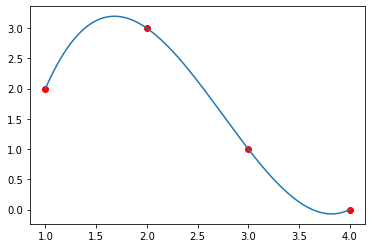

In [8]:

x, y = [1, 2, 3, 4], [2, 3, 1, 0]
GraphInterp(x,y)




<p><a id="Exo5"></a></p><div align="right"><a href="#top">Haut du document</a></div>



<div class="alert alert-info"><font color="black" size="5"><b>5. Le manque de stabilité vis-à-vis des données</b></font></div>



<p>Dans toute méthode numérique, on se préoccupe de sa « robustesse » ou de sa <i>stabilité</i> vis-à-vis des données. En raison des erreurs intrinsèques aux méthodes numériques, il est en effet important de s’assurer qu’une petite perturbation des données engendre une perturbation proportionnée des résultats.<br/>
L’exercice suivant est donc destiné à montrer que la méthode d’interpolation sur des abscisses équiréparties n’est pas stable vis-à-vis des données. En effet, nous allons voir qu’une modification d’un seul point peut avoir des conséquences disproportionnées sur le résultat « loin » du point perturbé.<br/></p>
<h3 id="Exercice-4.">Exercice 4.<a class="anchor-link" href="#Exercice-4.">¶</a></h3><p>Représenter graphiquement et sur la même fenêtre<br/></p>
<ol>
<li>Le polynôme interpolateur qui passe par les 11 points $M_k(x_k = \frac{k}{10}, y_k = 0)$. Autrement dit on prendra 11 points
équirépartis dans $[0, 1]$ pour $x_k$ et $y_k = 0$.<br/></li>
<li>Le polynôme interpolateur qui passe par ces mêmes points mais en modifiant le septième $(x_6,0)$ en $(x_6,1)$.<br/></li>
</ol>
<p>Quelle est la conclusion?</p>



<div class="alert alert-success"><b><font color="black" face="Times" size="3">Réponse</font></b> :
</div>



<ul>
<li>question 1</li>
</ul>


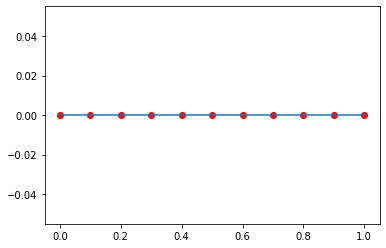

In [9]:

## Définition des 11 points d'abscisses équiréparties entre 0 et 1 et d'ordonnées 0
xe, ye = np.linspace(0, 1, 11),  [0]*11
GraphInterp(xe, ye)




<ul>
<li>question 2</li>
</ul>


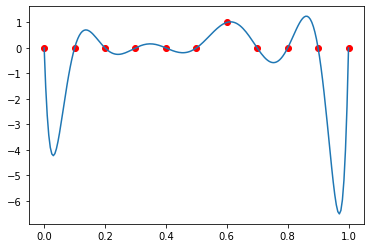

In [10]:

## Définition des 11 points d'abscisses équiréparties entre 0 et 1 et d'ordonnées 0
xe, ye = np.linspace(0, 1, 11),  [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
GraphInterp(xe, ye)




<p><a id="Exo6"></a></p><div align="right"><a href="#top">Haut du document</a></div>



<div class="alert alert-info"><font color="black" size="5"><b>6. Le phénomène de Runge</b></font></div>



<p>Le <i>phénomène de Runge</i> est une situation typique de l’interpolation, elle illustre le fait qu’augmenter le nombre de
points d’interpolation peut avoir des conséquences assez catastrophiques sur le résultat ! C’est ce qu’illustre
l’exercice suivant.<br/></p>
<h3 id="Exercice-5.">Exercice 5.<a class="anchor-link" href="#Exercice-5.">¶</a></h3><p>Soit $g : x \mapsto \frac{1}{1 + x^2}$ sur l’intervalle $[a,b] = [-5,5]$. <br/>
Représenter graphiquement l’interpolation liée au support de points $M_i(x_i, g(x_i))$ dans le cas de $n = m + 1$ abscisses équiréparties entre $x_0 = -5$ et $x_n = 5$ avec $m \in  \{10, 15, 25\}$. Par exemple, avec $m = 15$, vous devez obtenir la figure 4. Conclusion ?</p>



<p><img alt="image.png" src="data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAVQAAAEvCAYAAAAadzm3AAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAADsMAAA7DAcdvqGQAACv/SURBVHhe7d0JfBNl/gbwp0g5Ki3SUkCOWoVCQQFpqxQQpS5UpaD8uW9ZBURWRMG7dUGXY1VElEVBWGVFFFBW5VpFVkGFggUKIqd05So3FShtgULf//wmE0ivFMqkSSbP9/MpSWbSdJhMnrzvO++8r5/SgIiIrlk545aIiK4RA5WIyCQMVCIikzBQiYhMwkAlIjIJA5WIyCQMVCIikzBQiYhMwkAlIjIJA5WIyCQMVCIikzBQiYhMwkAlIjIJA5WIyCQeO3yfn5+fcY+I6Oq5I9o8OlA9dNOIyMO5Kz9Y5SciMgkDlYjIJAxUIiKTMFCJiEzCQCUiMgkDlYjIJOw25eEyTp/FidM5xqPLIupWM+4RUUHuyg8Gqgf57cAf2Lo3AylpJ7D7eBbWHc021hSvX5NQ1A2pjNvDQ9CoXjCCgyoZa4h8FwO1AF8JVAnRFZsPYP7GQ9iTlYuWNQLQrlF1RNxYFTfVCERAxfKoExpoPNsm59wFHDiWieOncnDkZI4ewHO3HdPXdQy/AfFNa+HupnUYruSzGKgFWD1Qk7cexJRvduqlUAnBAW1vvuYSpoTzup1HsHjzIf11pfTaKbouWt1a23gGkW9goBZg1UB1DNLn24ahV9sIl5Qk7SXf137cp5d6+7QMw30xN6GyVuIlsjoGagFWC1QJuLeWbMOyPSddGqQFyUmtH7akY8p3afrjpIRItI8K0+8TWRUDtQCrBKq0dy78aTeSvk3Tq+CjuzRzS9um43ZIiXVcz9vZU4Asi4FagBUCNf1YJkbNWY8jWbkeUzKUEuus5dvx7vqDGB5TG4PjG7sl4IlciYFagLcHqrSVvvjvX9Ek9HqM6xvtcaElTRBJCzbpYT+x6208cUWWYqlA3bdvH2bMmKHfj4+Pxz333KPft1u1ahVSUlLQqVMnREZGGkvz8+ZAfW/pFv1k0LgO9dH/T0X//zyBYzOAlFZHdG6Kynm5wP79QL16QOXKxjOJvIulAnXHjh3GPeCRRx7B4sWLERISoj+WdUlJSXjxxRcxceJEfPTRRwgICNDXOfLGQJWAmr1iux6mnw5o4TWlPimtDvkwBTXVBUz+zwzU2fMzUKEC8Le/AQMHGs8i8h7uyg+XXMtvL3WmpdnOLFd2KOnIsu7duyM6OhqxsbF6adYKJExHf7hO76C/evTdXlWFlpNT/3nuXjQ4fBht7hmKFdF9pZoBvPyy9h8rfNkrERXNpYOjbN++Xb/NcfhQZmZmIjDQduVPUFDQpdC1k28W+fEm9jDddiwLc4e1KnRlkzeofOwwxn+RiCm7kjH4tnvxXv83kFO+qq36T0RXxGWBKqXUZ555Bs2bN0dWVpaxVCsNRUQgPT1dv5+amqqXUh1JMd2bqvpWCFNd3bpAWBi6fDEe366cjfk162N0x2eRc9MtxhOIqCQuCdR58+YhMTFRr9qLMO2DKm2nsiw8PBzLly/X1wUHB19qW/VGlglTu1mzgFatELHuc8zd8hlQrwYeeP07vfsXEZXMZd2mJEBDQ0OLDUxpO5WgLY43nJSSs/nSZmqJMHWUkQHt2856XxjkM9yVH+yHWkr2rlFyAsrKQSOh6o09F8i3uSs/OGJ/KazYuO9SwFi91CaDqTye0FQff6DPnFT9ggUiKhoD9SpJn83BC7ZgSudInyqtMVSJSsYq/1WQ6+C7vv0DekXdqAeML5LSuXyhsPpPnoxVfi+Q9MkG/dr8Qe0bG0t8jwzwImHKkipRYQzUK/Txf3foZ7sTuzXz+UGapWTKUCUqjIF6BTanHdMHEJFRmdh1yIahSlQYA7UE0m468pNU/YQM2wzzk/3BE1VElzFQS/Dml7+g5vX+Pt1u6gzP/hNdxkB1Qs5oy/TMMl0IJ7crnj1UZUBtXqZKvoyBWgyp6o9bukPvb8q5l0omodqxcSj6TU9mqJLPYqAWQ6r60kWqS5v6xhIqiYz4L/tM5tGSS1aJfA0DtQjSFihV/ac7NTGW0JWQZpE3/9wSIQEV9EFVGKrkaxioBUgISFugzAfFqv7Vk1CVvrrSZ3fq4i3GUiLfwEAtQEZWEt3uaqDf0tWTvroy3J9MVS2jchH5CgaqAxn4REaRertvC57Vv0YSqtLxX/Ynu1ORr2CgOnhryTb0axKK5vVDjSV0LaTjv/SSkD6q8mVFZHUMVIOUopbtOYnhD7ADv5mkl4T0UZVpqtmdiqyOgapxPBHFa/XNJ1eZSXeq8Qt/4Zl/sjQGquab9Xv1W56Icg1pjx7XN5pn/snyfD5Q5YqopxbvQFJCJE9EuVBwUCXM/PMd+pn/L1enGUuJrMUlI/bLjKYzZsxAtWrVEBcXh+joaGPN5XV248ePN+7lV1Yjbku3npU7j2P+qDhjCbmSfcT/r4bcyZN/5DKWGrE/OzsbXbt21cN0xIgR+mM7uZ+RkYEBAwboP+4kpVPp1vPUfY2MJeRqMuK/nKSSIRFl/xNZiUsCNTIyUi+VNm7cGMnJycZSm4CAAGzevBlLlixBVlaWsdQ95Hr9juE3cJzTMmY/SSVTyhBZicvaUKUkOnDgQD04JUTtqlevjnnz5uml15iYmHylVyFFdflxNekXyev13cPx8lSZWobIKlxW5R89ejTi4+ORkJBgLLWRcA0LC9NLsN26dUNOTo6xxkbaPcqi7WP2d7/pnfh5vb57SPc0mVJGppaRKWaIrMAlJ6WkBNqnTx8MGzYMwcHBeOyxx/SQnTNnDpo2bYotW7Zg586daNSokVtOSknptMM/1uDbJ1ozUN1MTgrO33hIv/affYDJLO46KeWWefl37NiB0NBQhISEGEsKc+UOSfzoZ/12/MA79Vtyr+HTV+u3MvQfu66RGdwVqG7phyonrZyFqSvZ204H3RthLCF3s3f6t4/0ReSt3BKo7sS2U88jnf5lhC/pwsb2VPJmPhWoLJ16LunkL2MpsH8qeTOfCtQVmw+wdOrBZCwF9k8lb+YzgWq/KqpTdF1jCXkax/6pvN6fvJHPBOr8H39DyxoBvCrKw0nXKRmoRgas4aDU5G18IlB5zb53kev9h8fU1gel5vip5E18IlB/2JLO0qmXkTn+BcdPJW9i+UCVEs6U79LQp2WYsYS8gbSn2sdPlSH/iLyB5QN10+6j+u19MTfpt+Q9pDeGdKUat3QHu1KRV7B8oE75Zid6Rd3ISxq9VP8/RepdqWSoRSJPZ+lAlatu1h3NRq+27MjvzaQrlVyQwa5U5OksHagLVv+ud+SXSxvJe0lXKpnfX7pScSpq8mSWDVRpc5NSTc82NxtLyJvJ/P7y5cipqMmTWTZQl6Xs0btKcSI46xjdxXYV1cKfdhtLiDyLJQNVSjCz1uzDkHb1jSVkBdJ0Yx/ln1dRkSeyZKBKV6k9Wblow478liMXZ8hVVEkLNrHqTx7HkoE658ff9amK2VXKmuQqqiPaFyar/uRpLBeochZ42Z6TePDOcGMJWY18UcqA1Kz6k6exXKAu+nmPPtc+J3yzNjnZyKo/eRpLBap8sGQGzQFt2VXKF9ir/pyLijyFSwJ13759SExMxKRJk7BhQ+HR11etWqWvk9lPTXPgADYt+lG/e3uDGvotWZu96s+5qMhTuCRQZQ7+rl27Ii4uDiNGjNAf20mITp06VV+XlJSUb12pDRoE3HUX5qzaj157tqHy3v8ZK8jq7FV/mYuKVX9yN5cEqkwTHR0djcaNGyM5OdlYapOWlobu3bvr62NjY/XS7DXZtAlYuRLpN0RiWZUQtN+6Gvj4Y2Ml+QKOnUqewmVtqFLyHDhwIJYsWYKAgABjKZCZmYnAQNsJo6CgID1gHfn5+ek/VywlBdi7F9vr3oqWZzMRse5z4NNPjZXkC+xVfxk7lVV/cieXVflHjx6N+Ph4JCQkGEttIiIikJ6ert9PTU3VS6mOlFL6zxV74AHgppvQfulkzP5srG3Z00/bbslnsOpPnsAlgbpo0SJMnz5dD0w5OSXVemk7lfvh4eFYvny5Xu0PDg5GSEiI8VulVLcu8OqrQFQUKh/cCbz8MtC7t7GSfIm96s8O/+Quflpp8CqKg+aRkA0LK35aEqn2X/Wm5eRo9b/KxgPyRVLlf2jmz/j2idb6iP/km0qVHyZwW6CWxF07hLzf65+nYsO+k5j9l7a8/NhHuSs/XHZSishdeK0/uQsDlSyH1/qTuzBQyZLkrL+M8M9r/aksMVDJsmSEf1b9qSwxUMmyZIT/pIRIVv2pzDBQydLaR4XpVf+3lmwzlhC5DgOVLM8+uR/n9SdXY6CS5dmr/pzXn1yNgUo+wV71l3n9iVyFgUo+Y/gDjfX5xlj1J1dhoJLPkHnGpnSOxJTv0pBx+qyxlMg8DFTyKV3a1EeT0Ovx5pes+pP5GKjkcxK7NcPcbcewYuM1zhZBVAADlXyOveo/bukOVv3JVAxU8kn3xdyEmtf7s+pPpmKgkk+SEanG9bxdr/pzHioyCwOVfJaM6D+uQ33OQ0WmYaCST+t2VwO96s8pqMkMDFTyafaqP6egJjMwUMnnSdWfU1CTGVwySd+JEyewcOFC7N27F+PHjzeW2shspzNmzDAeodB6O07SR2VJgvSB17/D4NZh6P+nSGMpeSvLTdJXp04dTJgwwXh0WXZ2NjIyMjBgwAD9h8gTcB4qMoNLAjUkJAQJCQnGo/wCAgKwefNmLFmyBFlZWcZSIveTeaik6s95qKi0XDovf1HFbimhHj9+HMeOHUNMTIweqhKydvI7dqzyU1lj1d8afGZefgnPsLAwREdHo1u3bsjJyTHW2MhOYJCSu0jVn/NQUWm5JFDlxFNiYqJ+X27l8Y4dO/T78+bN02+7d++ORo0a6c0DRJ6E81BRabm0yl8cCdfQ0FCnYcqz/OROMmhK17d/wFP31teH/CPv4q78cEugXgkGKrmbDO83eMEWrB59tz5CFXkPn2lDJfIWUvXvGH4D56GiK8ZAJXJCBqPmPFR0pRioRE5wHiq6GgxUohJwHiq6UgxUoivAeajoSjBQia6AVP1lMGrOQ0XOMFCJrpB9MGpW/ak4DFSiK8R5qKgkDFSiq8B5qMgZBirRVeI8VFQcBirRVZKq/0sP3cZ5qKgQBipRKdgHo57w1a+s+tMlDFSiUhrRuSmOZOVi4U+7jSXk6xioRKXEeaioIAYq0TXgPFTkiIFKdI0Gxzdm1Z90DFSiaxQcVOnSPFTpxzKNpeSLGKhEJrDPQ8XBqH0bA5XIJKO7NMO2Y1kcjNqHMVCJTGKv+j+1eAer/j7KJZP0nThxAgsXLsTevXsxfvx4Y+llq1atQkpKCjp16oTIyEhjaX6cpI+81fDpq/Xbd5tq/4SGAg0b6o+p7Fhukr46depgwoQJxqPLZArpqVOnIi4uDklJScjOzjbWEFlDYpua2JZ2FF9O+QZo1w5o3RrIyTHWkpW5JFBlvv2EhATjUX5paWno3r07oqOjERsbi337OAI6WUudr+YhaftPeKp+S6TXaAbs3w8kJxtrycrKvA01MzMTgYG2Oc6DgoL0gHUkRXX5IfJaq1ej/dLJ6PfHQYxv0xc5edcDK1caK8nKyjxQIyIikJ6ert9PTU3VS6mOpN2Dbafk1YYP129Gr/wQ2yoHYuE9A4H+/fVlZG0uCVSpxicmJur35VYeS9up3A8PD8fy5cv1an9wcLDePEBkKe3bA2+9heCz6Ug6sAFJYc3xW0CosZKszCVn+a+EhGxYWJjxqDCe5SereP3zVGzYdxKz/9JWH1CFXM9yZ/lL4ixMiayEw/z5DrcFKpGvcBzmjyP8WxsDlagM2If54+R+1sZAJSojUvXn5H7WxkAlKiP2ef1lcr8VG3lBixUxUInKkMzrP6VzJMYt5QAqVsRAJSpjXdrUR5PQ6zl2qgUxUIncYFzfaH3s1I//u8NYQlbAQCVyA8dpUzhjqnUwUIncRKZNka5UQz5MYVcqi2CgErmRvSvVuPkbjSXkzRioRG4kXakmD4jB3G3HOBeVBTBQidysTmig3pWKc1F5PwYqkQeQrlQyDfWoOevZnurFGKhEHiKpV5Q+KhUvTfVeDFQiDyHtqTP/fAcvTfViDFQiD2K/NHXwgi1sT/VCDFQiDyPtqdI/td/0ZLanehkGKpEHYv9U78RAJfJA9v6pq/ee5PX+XoSBSuShpH/qxK636df7J289aCwlT+ayWU9XrVqFlJQUdOrUCZGRkcZS22ynM2bMMB4B48ePN+7lx1lPiWzeW7oF8zcewtxhrfSQpZJZatZTmYN/6tSpiIuLQ1JSErKzs4010O9nZGRgwIAB+g8ROfd4QtNL46fyJJVnc0mgpqWloXv37oiOjkZsbKxeKrULCAjA5s2bsWTJEmRlZRlLiciZN//cUh8/lSepPJtLAjUzMxOBgbaqSVBQkB6wdtWrV8e8efP00mtMTEy+0quQorr8ENFlcpJKqvxykkqaAMgzuSRQIyIikJ6ert9PTU3VS6l2UkINCwvTS6/dunVDTk6OscZG2j3YdkpUmP0k1Ws/7uNJKg/lkkANDw/H8uXL9Wp/cHAwQkJC9HbVxMREvXQqt7KuUaNG+joiujKtbq2NcR3qo8+cVF5J5YFcdpZfSNuplEYLknANDQ11GqY8y09UPJ75d85d+eHSQL0WDFSi4snZ/tEfrsOJ7POY/Ze2ehsrXcZALYCBSuScPVSF9AJgqF7mrvxwSRsqEbmeBGhit2Z6dyqOoeoZGKhEXkzaT6Udddn2Y+xO5QEYqERezrE7FUPVvRioRBYg3ak+HdBCD1XOnuo+DFQii7CHqsyeyo7/7sFAJbIQCVWZQkU6/jNUyx4DlchiZAqV59uGMVTdgIFKZEEy5B9DtewxUIksiqFa9nilFJHFyVl/OVElbavSHOALeOlpAQxUIvNICVVKqlJilZKr1fHSUyJyGcd+quz87zosoRL5kN8O/IEhH6boc1RZeUAVVvkLYKASuYYMTD1qznr9vsz9b8XxVFnlJ6IyIQEqY6iGBFRAv+nJ2Jx2zFhD14olVCIfJu2p0q5qtR4ArPIXwEAlKhsrNu7D4AVb0K9JKJJ6RVmiXZWBWgADlajs2NtVj2Tl4u2+LdC8fqixxjsxUAtgoBKVLZlSZfaK7XoTwPCY2hjRuanXllYtF6irVq1CSkoKOnXqhMjISGOpjbN1dgxUIveQk1QjP0nV78vA1dKH1a127QK2bAE6dgQqVzYWOueu/HDJWX6ZJnrq1KmIi4tDUlISsrOzjTXO1xGR+0l1/z/P3YvBrW3jACR+9LPef9UtunYF2rUDuncHAgKAdbZJCT2VSwI1LS1N+/93R3R0NGJjY/X5+e2crSMizyBV/f5/isS3T7TWH3f4xxq9R0DG6bP64zIhJdO1a5ERGI7kDo/blo0fb7v1UC4J1MzMTAQG2joLBwUF6SFq52ydkKK6/BCR+0XUrYbxA+/EV0PuxMqdxxE14b94/fPUMimxZmz4FR/fPRxR/5eIKU3uti3cvNl266FcEqgRERFIT0/X76empuolUTtn64S0e7DtlMizSDPA/FFxerCeys7VS6y9Jn+vD7oiJ7PMJGEtpeGozRWxuFYDfLpxKea/3ce2csgQ262HcslJqRMnTuCxxx7T7zdq1EgrpY/X207nzJmDUaNGFVpXFJ6UIvJc0s1q0c97MH/jIezJytV7BUTdEoLG9aqV6lJWCdF1O49g8eZDWHc0Gx3Db8CAtjej1Zn9wDvvAD/9ZAvT0aOv6MSUu/LDpd2mpH00LCzMeJSfs3WCgUrkHaRXwJodh/UmAQlDIRcJ1A2pjBtvCECVyv64qcblkN17NBNncnJx6GQ2DpzIwdxttktfJURbR4Sg4x3hCA6qpC8rLUsG6rVgoBJ5HzlptXN/Bo6czEFK2gl92e7jWZeCVrSsEYAG1a9H1QB/NLwxCDfXCkLDutVM7fPKQC2AgUpEpeWu/OBoU0REJmGgEhGZhIFKRGQSBioRkUkYqEREJmGgEhGZhIFKRGQSj+6HSkRUWu6INo8N1NLwhosBuI3m4Daah/vSPKzyExGZhIFKRGQSS1X5iYjciSVUIiKTeGUJVQawXrhwIfbu3VvkANVXMquqqznbRhkLdsaMGcYjmSbHPfPk2LejWrVq+qSJMs+XI0/YjyVto6ftSxEfH4977rlHv2/nSftSFNxGT9mPdkuXLtVn9hg6dKixxMYT9qNTEqje5vjx42rJkiXyRWAsuWz79u2qW7duav369fptVlaWsaZslbSNw4YN02/lx13kb8t+kp9WrVrl21eesh+dbaOQ9Z6yL+0/sp3y/tvJMk/Zl8620RP2o5C/L5+bl156yVhiI8s9YT8645VV/pCQECQkJBiP8vOUWVWdbWNAQAA2b94MLXChHRTG0rIn3/Cynxo3bozk5GRjqY2n7Edn2yg8aV8K+6STlR2m6fCkfSmK2kZP2Y9CppdfuXKl8egyT9mPzliuDbWkWVU9QfXq1TFv3jy9ChsTE4Ps7MujmZc1+dsDBw7UP0jyobLzpP1Y3DYKT9qXQitF6bc5OTn6rfC0Y7KobfSU/SjbIKFZs2ZNY8ll3vDZtlygljSrqieQUJD5tOSbVqu65Duwy5J8aEaPHq23pxUsTXvKfnS2jcJT9qWQEuAzzzyD5s2b5yvledIxWdw2etJ+3LJlC95++218//332LBhg7HUOz7bXhmoUtRPTEzU78utPJZZVeV+eHg4li9frn/LBQcH61Vvd3C2jfItLLeyjTLzq7u2cdGiRZg+fbp+cBbcRk/Zj862UXjKvnTcDiFfBPZt9JR9WXAbJUA97Zjs3bu3fkJs5MiRl05Cetox6Yxl+6HKB8/ZrKruJgdJaGioRx4Ujjx9PwpP2ZclbYcn7Etn28hj8tqxYz8RkUnYsZ+IyCQMVCIikzBQiYhMwkAlIjIJA5WIyCQMVCIikzBQiYhMwkAlIjIJA5WIyCQMVCIikzBQiYhMwkAlIjIJA5WIyCQMVCIikzBQiYhMwkAlIjIJA5WIyCQMVCIikzBQiYhMwkAlIjIJA5WIyCQMVCIikzBQiYhMwkAlIjIJA5WIyCQMVCIikzBQiYhMwkAlIjIJA5WIyCQMVCIikzBQiYhMwkAlIjIJA5WIyCQMVCIikzBQiYhMwkAlIjIJA5WIyCQMVCIikzBQiYhMwkAlIjIJA5WIyCQMVCIikzBQiYhMwkAlIjLJVQbqBWSuT8LLjzdETKAf/AJjUK/Tg7j11lsRE9MEXWMrw8/PD5VeX49zxm/Q1TqA1H/2wKhONyBQ25flonuj3VNzseh0Gv4zqhkeaOav7eNhGHvwAlT6W3jpwXq29+Lhf2Or8QreSyH3yI9Y8r9M7Z4bnf4YkzrXR7tbysGvwSR8dsFYfpWKfn9ykbG8AyLKPYie6/7Ql9icwdGfV2Bj5kXjsfW45nj1kGPGTpVG7gL1Rn1t++u/oRbkGstE3l6VMj5MVXwtRZ01FlnLRZWz9TX1txHt1MD4UFUf9VWTBfuMdebKXdtDe33k35d5a9Wn3Stox81jaky6bcfn7X1B9ZKjauBC9au+xGx56vyh9Sr19AXjsVky1aG1aeponvFQnJ6rXm/rrxDxhBrzu5uPoJw5alx4Ecf4VSr8/lxUWWt7qVb53ttclbm2j4rz81OVHv5crb+oL7x659PU2p2ntHfMc13b8erhx4zG3Cq/XxiiOndAiGW/ZMuhYr32aP/QQHS+3R9pxtIy4+cP/4p+xgMbv/IVUdG47xJqA74a1g0TtuUYC8yhDkzCc3GfY6XjsXJdRVS4Tu74o5K/m1ujZL/q23JtCr8/5RAQ3Q1dKt6BdnfebKwrh+vK+0P/cxUroMBbfIVycPDfvRD35W84byzxRNdyvHr8MaMxfQvKNZ2F9BdjtJ2Wh5zf3sP7T96EYL8GqPfkDLz72xnjWSIXZ36bjhmjIlGjSX/cP2o0xjzZAq0r344GT3yERZl52nPO4ljKGLzWJ1ir5rZG01c/wiz9NeS1Z2H2q80R4xeMqv3+jqSUo9rSAn9z6Bg8/2x79L4lEDWHvY856Wf1v2z7/fzP69mzp/7cgVpQOmuy8AuMQuyf+qJNdC1jiafKxekDJ7Q9WIDKwIHDV9ogk4fsnydh8lc3G4/NchAb5szEnNoFDr+Abhj5/XmoXZPxQh1/Y6HVaMfeL8vw3oAkvNEm2FhWDpWj/4Vv87R1MzrjttIEavYifPLWRu3VPaLi6wJecswYJdWrU1yVP3utmvvTYa1Sc5mt6tpO9VibaSwR59XpzU+q/pUaqdumb1JHLhXh81Tu7y+ph8sNvVSlVVql6OD8qHzV3EvSx6iBRVS7C/3N45PVUzW16tSTy9Quh+pC4W3LU+c2DFA3TlhfQpOFfZvKuMqvNqjP+1XMvy/0fXC5CnVxd5J6pGl5+VQ5VKtOq93zWqroKvJpc9xmrTp/YJqaEF9L1ejQRfVsF6TKRQ9Vj6//Q1u3S618pbm6X3+tG1VQu66qSZOHVI/vdqrUqW3U/7WspC0fop5fs1T94+EQVQV3qfu+P67yTq9QX4yNUS2CWqjbOtyi2tTwV1UfnaP+Y28yODFLje9c17YtVaJV3YTOqknsRDXrf0vVO33CbMvzHVfasbL172pi72BVrsUDKiGhrmpRrpW67ZWv1Hf21zw1R03qYntNv8e+ULuM51eRfYBIFTbmW7XlvLOKcKY6suZZ9dID1VSllg+pztrfaFyxoqpfaFs0539RP73ZWjUOvcvYljYqavKP6tfiXr/A+6PydqoVI96/vD+06v7p5MfUI9q+l+21vd8X1KkfBqm++rJIFfXvX9X2z3qqh5sb72v9buqhr/epHP33z6uM//ZVvY3f94vqqBpHR2v7Z6Xaq68/rdJXDVOPNayh7et4Fd+4oqr65/fURwfktw8W/15++5Na8GiEuudmP4XwsWrypnlqxoib9GMSqKIqdhyjXtl60qF54QreJ1Fwf2i885gpmomBmqfOruupQibmbz8tMlAvrlQfda6gyg1aqH4ptM371U/9O6uJR+xvggmBag+iAh+OIretiC+Fwjw3UEXR7VTZau/HTfNvs/Y+/KtTZVVj8kZ1Uh7n/a7W/DXc4f90VKVMDNV+p8A+UukqeWyItryKqtR3opr2ZifVpdYg9fTWzWrR4CDtoO+lHv3ltPY8e3thuAqfvVOLDkNxX8iF2i21wP99jBrWwE+Ve3iBSsmVg8X2pTsoUPuCHLJQrbcf9PbfRT1V4+m56svDZ7UP6n/Vp8OractsYV+08+pUcl/V3i9MhU1ab3y5n1eZ6/qqONmHjtuYt1utGVNX+TV8Vk3cL4F0Tp34Jl5FooVq+vFObQ8XoYj3p7A8lfPTQyo83/t9eRmq3K/iZq9Xu85fUJm7ktTIhlrIRY5Vs05dPkqLPl7OqYwfu6s4v1jV+os9tgA+8Q/1XEQ5VWngPLX6vCwo5r3cpr3fl9rsZd3batquUyrv/A61cdZd6g7tb/m1f0d9mWV7T674fSr0BbPBC4+Z4l1blf/IPIzqYjvLHx/fAPf1/gxnruAV87bOwfuLa6N++6giqjd10WbOIrxQw4QGLLu8P3Dq8EWUax+J5s5eVm3F10N2oXZsTfPbQspQ0e1U5eDvX6BKdPh7/HfJDcC58zinHULSBt78wR6ICSmplcsf5SvKHmqKe4YMxfBRi/HFoQ8xubE/qtYORdXeffHUbYHa+nIIqBeJCOzBoSOnUWLTeqF2y3Ssn/0upu+Owt194xBTXg4WP5QPfwQDhgbi7MypeHXdKdtT7b97Y2+8kNgTD9WsCL/AdujcIxb1sAlrNh0oum0xbw2+mvA5VtTqhacGNUcN/Xj0R5WoLuioJZSjvLRpeP3NAyjfszOG1K2kLamA4DY90aNeKrZM/w4/lPrcgfZ/Kl/B1oZ6yeVl5R99Ch8MjEaE/3WoEjEYXbtr79mOtViZVkK7dl4ylry+CN/XvQ+PdAiDbDGCOyGhR1Wc/ehTfLAjW1tQ3HupldUutdnHo98Lj2J4RJC2qBFaPDINLw+5HmrFP/Ha90e19VfxPhVS2fuOGSeuLTdq9sbkLxdh69atWP7Nasx6ORp6pcSpXJzctwtbEY7bG1TX/qsulrsTqR+Oxavrh+LZke3QsNAf3I/kf76ht6GOfX4gxi48hGMl/h8sIrQ12nY6gaMv/h8a9hmLv8zbhPRmr+Ff99YwnlCSigiqXMG4r/FrjLtf2Y2TMx/EbTiKPd9PwLS/z8ZqY/VVy9uJ7T9J16JmiI2salumq40GLW7SbnciZfth5OvVFFADdauWNx6UQ8XKVbTYO4Pz53OlKFKIOvA1li7WPjZ3NkVssP33ipKDA+tW4Msz4QiPrAd766ecFNE/lJu2IfVEqRPVqetqh+DGS8dtAAICZTvPat+Dzg/US/+31o3RIsD+Av6oUEE+9trn4n+O3bYKvJf5hKKu45es3y24tVU97U4afv3tMC6W5n2y88JjxhnzCmJ+tdDgocfRs1qVEl40D+eysuD4Vtocx+5lEzB27FjjZx4WHc011pWGLSj/+uLDeOEvZ1D9rccxKlL71i2kHlo9+iwWLFiAMUkj8cANJqbpwbF42M9P75tb7I87+4/6d8Cg96bird7ncHH+K3i3TzQa3voYnvjl5FUfSDbGicbRjRAZMAj9kuujWfeOaGWsvWp5GcjYI4d+BVTUSxp29tL2IWT8cabkUowTFw+lYb3cqXo9gpx+u5/B0f2Htdvj2Dftadym1cqkZnZr9ER8EtAEt/VthZaB5n2czHDp/7Z+Onp2aG/b3ls74NEFNdEk9gHEN3QMnKvhj8rXB2i3Ruhc0/vkfceMM+YeAcGP4IOhkdrudsYfQTVqajGWju37Tjh8cKujQccnMaz5d/jglWX4oc296FzD+Ss5ZwvKVyf9gE8WVsWBR8fipV8dexkU5hfUEX3evBdR+etepVd7LP5la6cu/udfXXGr8fSypjJ/xYbyD+OpTw/jUNrHmP9KM9xxaCamPT4Hi0so/RTp9L/weqfhGJb8KJKOLMbql3qhbYMapT/IygUjOFxKDudx7oLj9uQhN1e+bG9EsPYFfi1vV7mAIO1VNIdP4ph0LClRTdR/+h29Vub4s2VGH8RVdprI7tNmBL5asSL/NidPxkSp1pdKLnKypLmgHmrVuAHXXcv75IXHjDNu+Eoth+ujumJQw93YtmwDfs33ua2C6rVrad8t16N6UIDRHFAB1erUQzj+h2375U20Uzh3YDs2azuowY1BxrKiVEBwZBRi1c9YseGwtludqY6GfRvjuvlTjG5bXu5crq1tVJeNTO2b2ZHa8w56vrsRGdqXXJVb+qHnXxdh0pPVgDVbsfH41X+HX9i+HJ/s0v5gRAO0CLIdsurCudJfNVeuERrfpW0PfsHaHY5tcAexO3WvdtsIdzSuBXtlrTTK3RSLOGkHWrMa3+x3aDE7dxqn8zWg3YBbmkaimlbN3ZXym1bOcaB24sdJa5GW71h2v/INWqGT7L5v12PVKcfj+SyOrpqOz0tdAzyCPVsParfN0LZ5Lfhdw/vkjceMM+6powT1xOBXY1F/9jj0fX8zjjo9EP1QqcUAjLz7B6z45lcctj9X7cXG//yIX9r3xCNRzgJVe4U6UbgjfD/SN6VhX0kHfe4aLH9pD9JKU0LzFNVvR3Qr7a1d+hleW30Iueow0r4eiXGTfjOeYFMupA7uHj8Nz/9yyqgpZCPn9AX4dWmN+FpyyJU3qnb7sWnbQe1jeFHv21rcx7B843j0lXBavBTvbdMO5twdSFnwJZZr6y4ePIFD9l3qVwVVamnbd2Qrkvec1d7L4vrG1kHMIK300mAjfvjke6zXSxwKF/Z8gDnvZ6LSkBH4a8vSVlsNQQ+i5xMNUOXMAkxJmo0FR85pJfefsWrmVMzbbzxH54/guJEY084fF96bimFLdtva2uX/+HZ/DPTT1ruxgGovaZ/fuAMbtDdInU5HelBfDEoMR5VDn2Li5K+RrF/WegZH1z6FIYPOwr/KlcbKKiz8fq/Rp1mrov8yCTPeOoOqz47EX2+XUm7p3yevPGac0aqdVyFXnU5JVEnDIi71CQsb9IzqMXOjOmI847KLKnvXu2rGiDBVDfVV3RHT1bRdjl1vpH/cSPV8l1oqqMXD6r6nR6lnRsWrPmFhKmLg39U/9jh2vspTuftnqDd7hKqqCU+qHk90Vk/dH6Kq9Z6iZh5wfJ78zZnqg2fD9b8Z9syHaqb+N4+qHbOiVAO/9qrVtHVqd16ew7bdqKr2ek51799fPaG97tMJVZXfza/n75pxifb/X/+kGnhvI6N/ptHv7+6harjed9MM+9XGWd317ZA+cX5RvdQ9Iz9WK/YtVB8921J1lH6BiFR1h4xRT49+WI0ZHKZ3l0H9B1Wr0XPVV6elK805lZE81KHf4kOq3TvfqE3/bq/qSR/C+OHqoX9uVKfOb1IrJ96hWlVqouomJKgHIqupGo/NMPoo2uQdnqHG3V9Zex3t99oMVT0/W6wWvtpeDdBf+0YVpL0fD479Wm3Qe/Bo7+nX3VRnfRvl+SPUo4sWqpn9A22P4/+uZh2VHZujjnzXw3hehKrx8Bvq/c9eUW+MbKLu0I+r1qrJyLfVNP1SwpL7FF78fVoRv3tK7V02WL3Qw9a30C9mgIp/5RtjOws4/4taPTXO2Lfy3EdVv/lvqOekS02+bdGOwwMfqfcv9ceUfXu/ajX5hyL6odo+K0W/P44yi9jOL9S3iwpv+y+569U3Dvu+aq/n1cBle2xdi/K2qVVjbjH+VryKHrtErc7WtqnA/03f3/b3+GL+18v/Xgp7N716Kji4gt4XuWt8qKpYsaNq/ebKAv00S3qfitsfWd55zBTDT/7RdjQRUQEbsbB/a3SfOwhj0v+BsbVdVVG2DvdU+YmILIiBSkRkEgYqERWWuQhznhuOD9ZIV4fv8N6LL6PnrFTIdVFUPLahEhGZhCVUIiKTMFCJiEzCQCUiMgkDlYjIJAxUIiKTMFCJiEzCQCUiMgkDlYjIJAxUIiKTMFCJiEzCQCUiMgXw/xSlYsmxyZbvAAAAAElFTkSuQmCC"/></p>



<div class="alert alert-success"><b><font color="black" face="Times" size="3">Réponse</font></b> :
</div>


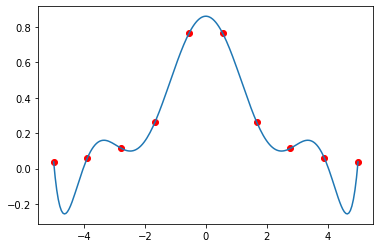

In [11]:

def g(x):
    return 1/(1+x**2)

# Définition des abscisses équiréparties entre -5 et 5
m = [10, 15, 20]
xe = np.linspace(-5, 5, m[0])
ye = g(xe)
GraphInterp(xe, ye)



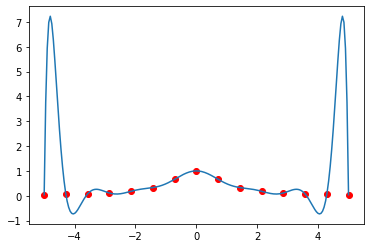

In [12]:

xe = np.linspace(-5, 5, m[1])
ye = g(xe)
GraphInterp(xe, ye)



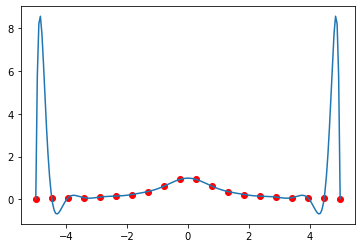

In [13]:

xe = np.linspace(-5, 5, m[2])
ye = g(xe)
GraphInterp(xe, ye)




<p><a id="Exo7"></a></p><div align="right"><a href="#top">Haut du document</a></div>



<div class="alert alert-info"><font color="black" size="5"><b>7. Méthode directe avec abscisses de Tchebychev</b></font></div>



<p>La section précédente a montré que, contrairement à ce que l’on pourrait penser intuitivement, choisir des abscisses
équiréparties n’est pas une bonne idée car la qualité du résultat est directement liée au choix de ces abscisses.<br/></p>
<p>On démontre alors qu’il existe des abscisses, appelées abscisses de <i>Tchebychev</i>, définies par <br/></p>
<div align="center">$\forall k \in [0,n]$, $x_k =$ <font size="3">$\frac{b+a}{2} + \frac{b-a}{2}\cos(\frac{(2k+1)\pi}{2(n+1)})$</font>
</div>
<br/>
qui permettent de minimiser l’erreur commise entre la fonction à interpoler et le polynôme interpolateur.<br/>
En effet, on démontre que l’erreur commise, entre la fonction $f$ qui fournit les points d’interpolation sur le segment $[a, b]$ et supposée de classe <font face="Kunstler Script" size="2">C </font>$ ^{n+1}$ et le polynôme interpolateur $P$ est donnée par<br/>
<div align="center">$|f(x) - P(x)| =$ <font size="3">$\frac{|f^{(n+1)}(c)|}{(n+1)!} \prod_{k=0}^{n}$</font> $|x - x_k|$
</div><p>où $c \in [a,b]$.<br/>
Cette erreur peut alors être minimisée en minimisant le produit $\prod_{k=0}^{n} |x - x_k|$ et les abscisses de Tchebychev sont précisément les abscisses à choisir pourminimiser ce produit.<br/>
Dans ce cas, l’erreur est alors majorée de la manière suivante<br/></p>
<p></p><div align="center">$|f(x) - P(x)| = 2$<font size="3">$\frac{|f^{(n+1)}(c)|}{(n+1)!} \frac{(b-a)^{n+1}}{4^{n+1}}$</font>
</div><br/>
<h3 id="Exercice-6.">Exercice 6.<a class="anchor-link" href="#Exercice-6.">¶</a></h3><ol>
<li><p>Construire une fonction <font face="Courier">PTchebychev()</font> qui prend en entrée deux réels $a$, $b$ (avec $a &lt; b$), un entier $n \in \mathbb{N^*}$ et qui renvoie la liste des $n + 1$ abscisses de Tchebychev de $x_0 = a$ à $x_n = b$.<br/>
Vérifier que l’appel <font face="Courier">PTchebychev(0, 2, 5)</font> renvoie<br/></p>
<p><font face="Courier">array([0. , 0.19098301, 0.69098301, 1.30901699, 1.80901699, 2. ])</font><br/>
<br/></p>
</li>
<li>Reprenez la fonction $g : x \mapsto \frac{1}{1+x^2}$ sur l’intervalle $[a, b] = [-5, 5]$ et représentez graphiquement l’interpolation liée au support de points $M_i(x_i, g(x_i))$ dans le cas de $n = m + 1$ abscisses de Tchebychev entre $x_0 = -5$ et $x_n = 5$ avec $m \in \{10, 15, 25\}$. Par exemple pour $m = 15$, vous devez obtenir la figure 5. Conclusion ?</li>
</ol>



<p><img alt="image.png" src="data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAVQAAAEvCAYAAAAadzm3AAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAADsMAAA7DAcdvqGQAACv/SURBVHhe7d0JfBNl/gbwp0g5Ki3SUkCOWoVCQQFpqxQQpS5UpaD8uW9ZBURWRMG7dUGXY1VElEVBWGVFFFBW5VpFVkGFggUKIqd05So3FShtgULf//wmE0ivFMqkSSbP9/MpSWbSdJhMnrzvO++8r5/SgIiIrlk545aIiK4RA5WIyCQMVCIikzBQiYhMwkAlIjIJA5WIyCQMVCIikzBQiYhMwkAlIjIJA5WIyCQMVCIikzBQiYhMwkAlIjIJA5WIyCQeO3yfn5+fcY+I6Oq5I9o8OlA9dNOIyMO5Kz9Y5SciMgkDlYjIJAxUIiKTMFCJiEzCQCUiMgkDlYjIJOw25eEyTp/FidM5xqPLIupWM+4RUUHuyg8Gqgf57cAf2Lo3AylpJ7D7eBbWHc021hSvX5NQ1A2pjNvDQ9CoXjCCgyoZa4h8FwO1AF8JVAnRFZsPYP7GQ9iTlYuWNQLQrlF1RNxYFTfVCERAxfKoExpoPNsm59wFHDiWieOncnDkZI4ewHO3HdPXdQy/AfFNa+HupnUYruSzGKgFWD1Qk7cexJRvduqlUAnBAW1vvuYSpoTzup1HsHjzIf11pfTaKbouWt1a23gGkW9goBZg1UB1DNLn24ahV9sIl5Qk7SXf137cp5d6+7QMw30xN6GyVuIlsjoGagFWC1QJuLeWbMOyPSddGqQFyUmtH7akY8p3afrjpIRItI8K0+8TWRUDtQCrBKq0dy78aTeSvk3Tq+CjuzRzS9um43ZIiXVcz9vZU4Asi4FagBUCNf1YJkbNWY8jWbkeUzKUEuus5dvx7vqDGB5TG4PjG7sl4IlciYFagLcHqrSVvvjvX9Ek9HqM6xvtcaElTRBJCzbpYT+x6208cUWWYqlA3bdvH2bMmKHfj4+Pxz333KPft1u1ahVSUlLQqVMnREZGGkvz8+ZAfW/pFv1k0LgO9dH/T0X//zyBYzOAlFZHdG6Kynm5wP79QL16QOXKxjOJvIulAnXHjh3GPeCRRx7B4sWLERISoj+WdUlJSXjxxRcxceJEfPTRRwgICNDXOfLGQJWAmr1iux6mnw5o4TWlPimtDvkwBTXVBUz+zwzU2fMzUKEC8Le/AQMHGs8i8h7uyg+XXMtvL3WmpdnOLFd2KOnIsu7duyM6OhqxsbF6adYKJExHf7hO76C/evTdXlWFlpNT/3nuXjQ4fBht7hmKFdF9pZoBvPyy9h8rfNkrERXNpYOjbN++Xb/NcfhQZmZmIjDQduVPUFDQpdC1k28W+fEm9jDddiwLc4e1KnRlkzeofOwwxn+RiCm7kjH4tnvxXv83kFO+qq36T0RXxGWBKqXUZ555Bs2bN0dWVpaxVCsNRUQgPT1dv5+amqqXUh1JMd2bqvpWCFNd3bpAWBi6fDEe366cjfk162N0x2eRc9MtxhOIqCQuCdR58+YhMTFRr9qLMO2DKm2nsiw8PBzLly/X1wUHB19qW/VGlglTu1mzgFatELHuc8zd8hlQrwYeeP07vfsXEZXMZd2mJEBDQ0OLDUxpO5WgLY43nJSSs/nSZmqJMHWUkQHt2856XxjkM9yVH+yHWkr2rlFyAsrKQSOh6o09F8i3uSs/OGJ/KazYuO9SwFi91CaDqTye0FQff6DPnFT9ggUiKhoD9SpJn83BC7ZgSudInyqtMVSJSsYq/1WQ6+C7vv0DekXdqAeML5LSuXyhsPpPnoxVfi+Q9MkG/dr8Qe0bG0t8jwzwImHKkipRYQzUK/Txf3foZ7sTuzXz+UGapWTKUCUqjIF6BTanHdMHEJFRmdh1yIahSlQYA7UE0m468pNU/YQM2wzzk/3BE1VElzFQS/Dml7+g5vX+Pt1u6gzP/hNdxkB1Qs5oy/TMMl0IJ7crnj1UZUBtXqZKvoyBWgyp6o9bukPvb8q5l0omodqxcSj6TU9mqJLPYqAWQ6r60kWqS5v6xhIqiYz4L/tM5tGSS1aJfA0DtQjSFihV/ac7NTGW0JWQZpE3/9wSIQEV9EFVGKrkaxioBUgISFugzAfFqv7Vk1CVvrrSZ3fq4i3GUiLfwEAtQEZWEt3uaqDf0tWTvroy3J9MVS2jchH5CgaqAxn4REaRertvC57Vv0YSqtLxX/Ynu1ORr2CgOnhryTb0axKK5vVDjSV0LaTjv/SSkD6q8mVFZHUMVIOUopbtOYnhD7ADv5mkl4T0UZVpqtmdiqyOgapxPBHFa/XNJ1eZSXeq8Qt/4Zl/sjQGquab9Xv1W56Icg1pjx7XN5pn/snyfD5Q5YqopxbvQFJCJE9EuVBwUCXM/PMd+pn/L1enGUuJrMUlI/bLjKYzZsxAtWrVEBcXh+joaGPN5XV248ePN+7lV1Yjbku3npU7j2P+qDhjCbmSfcT/r4bcyZN/5DKWGrE/OzsbXbt21cN0xIgR+mM7uZ+RkYEBAwboP+4kpVPp1vPUfY2MJeRqMuK/nKSSIRFl/xNZiUsCNTIyUi+VNm7cGMnJycZSm4CAAGzevBlLlixBVlaWsdQ95Hr9juE3cJzTMmY/SSVTyhBZicvaUKUkOnDgQD04JUTtqlevjnnz5uml15iYmHylVyFFdflxNekXyev13cPx8lSZWobIKlxW5R89ejTi4+ORkJBgLLWRcA0LC9NLsN26dUNOTo6xxkbaPcqi7WP2d7/pnfh5vb57SPc0mVJGppaRKWaIrMAlJ6WkBNqnTx8MGzYMwcHBeOyxx/SQnTNnDpo2bYotW7Zg586daNSokVtOSknptMM/1uDbJ1ozUN1MTgrO33hIv/affYDJLO46KeWWefl37NiB0NBQhISEGEsKc+UOSfzoZ/12/MA79Vtyr+HTV+u3MvQfu66RGdwVqG7phyonrZyFqSvZ204H3RthLCF3s3f6t4/0ReSt3BKo7sS2U88jnf5lhC/pwsb2VPJmPhWoLJ16LunkL2MpsH8qeTOfCtQVmw+wdOrBZCwF9k8lb+YzgWq/KqpTdF1jCXkax/6pvN6fvJHPBOr8H39DyxoBvCrKw0nXKRmoRgas4aDU5G18IlB5zb53kev9h8fU1gel5vip5E18IlB/2JLO0qmXkTn+BcdPJW9i+UCVEs6U79LQp2WYsYS8gbSn2sdPlSH/iLyB5QN10+6j+u19MTfpt+Q9pDeGdKUat3QHu1KRV7B8oE75Zid6Rd3ISxq9VP8/RepdqWSoRSJPZ+lAlatu1h3NRq+27MjvzaQrlVyQwa5U5OksHagLVv+ud+SXSxvJe0lXKpnfX7pScSpq8mSWDVRpc5NSTc82NxtLyJvJ/P7y5cipqMmTWTZQl6Xs0btKcSI46xjdxXYV1cKfdhtLiDyLJQNVSjCz1uzDkHb1jSVkBdJ0Yx/ln1dRkSeyZKBKV6k9Wblow478liMXZ8hVVEkLNrHqTx7HkoE658ff9amK2VXKmuQqqiPaFyar/uRpLBeochZ42Z6TePDOcGMJWY18UcqA1Kz6k6exXKAu+nmPPtc+J3yzNjnZyKo/eRpLBap8sGQGzQFt2VXKF9ir/pyLijyFSwJ13759SExMxKRJk7BhQ+HR11etWqWvk9lPTXPgADYt+lG/e3uDGvotWZu96s+5qMhTuCRQZQ7+rl27Ii4uDiNGjNAf20mITp06VV+XlJSUb12pDRoE3HUX5qzaj157tqHy3v8ZK8jq7FV/mYuKVX9yN5cEqkwTHR0djcaNGyM5OdlYapOWlobu3bvr62NjY/XS7DXZtAlYuRLpN0RiWZUQtN+6Gvj4Y2Ml+QKOnUqewmVtqFLyHDhwIJYsWYKAgABjKZCZmYnAQNsJo6CgID1gHfn5+ek/VywlBdi7F9vr3oqWZzMRse5z4NNPjZXkC+xVfxk7lVV/cieXVflHjx6N+Ph4JCQkGEttIiIikJ6ert9PTU3VS6mOlFL6zxV74AHgppvQfulkzP5srG3Z00/bbslnsOpPnsAlgbpo0SJMnz5dD0w5OSXVemk7lfvh4eFYvny5Xu0PDg5GSEiI8VulVLcu8OqrQFQUKh/cCbz8MtC7t7GSfIm96s8O/+Quflpp8CqKg+aRkA0LK35aEqn2X/Wm5eRo9b/KxgPyRVLlf2jmz/j2idb6iP/km0qVHyZwW6CWxF07hLzf65+nYsO+k5j9l7a8/NhHuSs/XHZSishdeK0/uQsDlSyH1/qTuzBQyZLkrL+M8M9r/aksMVDJsmSEf1b9qSwxUMmyZIT/pIRIVv2pzDBQydLaR4XpVf+3lmwzlhC5DgOVLM8+uR/n9SdXY6CS5dmr/pzXn1yNgUo+wV71l3n9iVyFgUo+Y/gDjfX5xlj1J1dhoJLPkHnGpnSOxJTv0pBx+qyxlMg8DFTyKV3a1EeT0Ovx5pes+pP5GKjkcxK7NcPcbcewYuM1zhZBVAADlXyOveo/bukOVv3JVAxU8kn3xdyEmtf7s+pPpmKgkk+SEanG9bxdr/pzHioyCwOVfJaM6D+uQ33OQ0WmYaCST+t2VwO96s8pqMkMDFTyafaqP6egJjMwUMnnSdWfU1CTGVwySd+JEyewcOFC7N27F+PHjzeW2shspzNmzDAeodB6O07SR2VJgvSB17/D4NZh6P+nSGMpeSvLTdJXp04dTJgwwXh0WXZ2NjIyMjBgwAD9h8gTcB4qMoNLAjUkJAQJCQnGo/wCAgKwefNmLFmyBFlZWcZSIveTeaik6s95qKi0XDovf1HFbimhHj9+HMeOHUNMTIweqhKydvI7dqzyU1lj1d8afGZefgnPsLAwREdHo1u3bsjJyTHW2MhOYJCSu0jVn/NQUWm5JFDlxFNiYqJ+X27l8Y4dO/T78+bN02+7d++ORo0a6c0DRJ6E81BRabm0yl8cCdfQ0FCnYcqz/OROMmhK17d/wFP31teH/CPv4q78cEugXgkGKrmbDO83eMEWrB59tz5CFXkPn2lDJfIWUvXvGH4D56GiK8ZAJXJCBqPmPFR0pRioRE5wHiq6GgxUohJwHiq6UgxUoivAeajoSjBQia6AVP1lMGrOQ0XOMFCJrpB9MGpW/ak4DFSiK8R5qKgkDFSiq8B5qMgZBirRVeI8VFQcBirRVZKq/0sP3cZ5qKgQBipRKdgHo57w1a+s+tMlDFSiUhrRuSmOZOVi4U+7jSXk6xioRKXEeaioIAYq0TXgPFTkiIFKdI0Gxzdm1Z90DFSiaxQcVOnSPFTpxzKNpeSLGKhEJrDPQ8XBqH0bA5XIJKO7NMO2Y1kcjNqHMVCJTGKv+j+1eAer/j7KJZP0nThxAgsXLsTevXsxfvx4Y+llq1atQkpKCjp16oTIyEhjaX6cpI+81fDpq/Xbd5tq/4SGAg0b6o+p7Fhukr46depgwoQJxqPLZArpqVOnIi4uDklJScjOzjbWEFlDYpua2JZ2FF9O+QZo1w5o3RrIyTHWkpW5JFBlvv2EhATjUX5paWno3r07oqOjERsbi337OAI6WUudr+YhaftPeKp+S6TXaAbs3w8kJxtrycrKvA01MzMTgYG2Oc6DgoL0gHUkRXX5IfJaq1ej/dLJ6PfHQYxv0xc5edcDK1caK8nKyjxQIyIikJ6ert9PTU3VS6mOpN2Dbafk1YYP129Gr/wQ2yoHYuE9A4H+/fVlZG0uCVSpxicmJur35VYeS9up3A8PD8fy5cv1an9wcLDePEBkKe3bA2+9heCz6Ug6sAFJYc3xW0CosZKszCVn+a+EhGxYWJjxqDCe5SereP3zVGzYdxKz/9JWH1CFXM9yZ/lL4ixMiayEw/z5DrcFKpGvcBzmjyP8WxsDlagM2If54+R+1sZAJSojUvXn5H7WxkAlKiP2ef1lcr8VG3lBixUxUInKkMzrP6VzJMYt5QAqVsRAJSpjXdrUR5PQ6zl2qgUxUIncYFzfaH3s1I//u8NYQlbAQCVyA8dpUzhjqnUwUIncRKZNka5UQz5MYVcqi2CgErmRvSvVuPkbjSXkzRioRG4kXakmD4jB3G3HOBeVBTBQidysTmig3pWKc1F5PwYqkQeQrlQyDfWoOevZnurFGKhEHiKpV5Q+KhUvTfVeDFQiDyHtqTP/fAcvTfViDFQiD2K/NHXwgi1sT/VCDFQiDyPtqdI/td/0ZLanehkGKpEHYv9U78RAJfJA9v6pq/ee5PX+XoSBSuShpH/qxK636df7J289aCwlT+ayWU9XrVqFlJQUdOrUCZGRkcZS22ynM2bMMB4B48ePN+7lx1lPiWzeW7oF8zcewtxhrfSQpZJZatZTmYN/6tSpiIuLQ1JSErKzs4010O9nZGRgwIAB+g8ROfd4QtNL46fyJJVnc0mgpqWloXv37oiOjkZsbKxeKrULCAjA5s2bsWTJEmRlZRlLiciZN//cUh8/lSepPJtLAjUzMxOBgbaqSVBQkB6wdtWrV8e8efP00mtMTEy+0quQorr8ENFlcpJKqvxykkqaAMgzuSRQIyIikJ6ert9PTU3VS6l2UkINCwvTS6/dunVDTk6OscZG2j3YdkpUmP0k1Ws/7uNJKg/lkkANDw/H8uXL9Wp/cHAwQkJC9HbVxMREvXQqt7KuUaNG+joiujKtbq2NcR3qo8+cVF5J5YFcdpZfSNuplEYLknANDQ11GqY8y09UPJ75d85d+eHSQL0WDFSi4snZ/tEfrsOJ7POY/Ze2ehsrXcZALYCBSuScPVSF9AJgqF7mrvxwSRsqEbmeBGhit2Z6dyqOoeoZGKhEXkzaT6Udddn2Y+xO5QEYqERezrE7FUPVvRioRBYg3ak+HdBCD1XOnuo+DFQii7CHqsyeyo7/7sFAJbIQCVWZQkU6/jNUyx4DlchiZAqV59uGMVTdgIFKZEEy5B9DtewxUIksiqFa9nilFJHFyVl/OVElbavSHOALeOlpAQxUIvNICVVKqlJilZKr1fHSUyJyGcd+quz87zosoRL5kN8O/IEhH6boc1RZeUAVVvkLYKASuYYMTD1qznr9vsz9b8XxVFnlJ6IyIQEqY6iGBFRAv+nJ2Jx2zFhD14olVCIfJu2p0q5qtR4ArPIXwEAlKhsrNu7D4AVb0K9JKJJ6RVmiXZWBWgADlajs2NtVj2Tl4u2+LdC8fqixxjsxUAtgoBKVLZlSZfaK7XoTwPCY2hjRuanXllYtF6irVq1CSkoKOnXqhMjISGOpjbN1dgxUIveQk1QjP0nV78vA1dKH1a127QK2bAE6dgQqVzYWOueu/HDJWX6ZJnrq1KmIi4tDUlISsrOzjTXO1xGR+0l1/z/P3YvBrW3jACR+9LPef9UtunYF2rUDuncHAgKAdbZJCT2VSwI1LS1N+/93R3R0NGJjY/X5+e2crSMizyBV/f5/isS3T7TWH3f4xxq9R0DG6bP64zIhJdO1a5ERGI7kDo/blo0fb7v1UC4J1MzMTAQG2joLBwUF6SFq52ydkKK6/BCR+0XUrYbxA+/EV0PuxMqdxxE14b94/fPUMimxZmz4FR/fPRxR/5eIKU3uti3cvNl266FcEqgRERFIT0/X76empuolUTtn64S0e7DtlMizSDPA/FFxerCeys7VS6y9Jn+vD7oiJ7PMJGEtpeGozRWxuFYDfLpxKea/3ce2csgQ262HcslJqRMnTuCxxx7T7zdq1EgrpY/X207nzJmDUaNGFVpXFJ6UIvJc0s1q0c97MH/jIezJytV7BUTdEoLG9aqV6lJWCdF1O49g8eZDWHc0Gx3Db8CAtjej1Zn9wDvvAD/9ZAvT0aOv6MSUu/LDpd2mpH00LCzMeJSfs3WCgUrkHaRXwJodh/UmAQlDIRcJ1A2pjBtvCECVyv64qcblkN17NBNncnJx6GQ2DpzIwdxttktfJURbR4Sg4x3hCA6qpC8rLUsG6rVgoBJ5HzlptXN/Bo6czEFK2gl92e7jWZeCVrSsEYAG1a9H1QB/NLwxCDfXCkLDutVM7fPKQC2AgUpEpeWu/OBoU0REJmGgEhGZhIFKRGQSBioRkUkYqEREJmGgEhGZhIFKRGQSj+6HSkRUWu6INo8N1NLwhosBuI3m4Daah/vSPKzyExGZhIFKRGQSS1X5iYjciSVUIiKTeGUJVQawXrhwIfbu3VvkANVXMquqqznbRhkLdsaMGcYjmSbHPfPk2LejWrVq+qSJMs+XI0/YjyVto6ftSxEfH4977rlHv2/nSftSFNxGT9mPdkuXLtVn9hg6dKixxMYT9qNTEqje5vjx42rJkiXyRWAsuWz79u2qW7duav369fptVlaWsaZslbSNw4YN02/lx13kb8t+kp9WrVrl21eesh+dbaOQ9Z6yL+0/sp3y/tvJMk/Zl8620RP2o5C/L5+bl156yVhiI8s9YT8645VV/pCQECQkJBiP8vOUWVWdbWNAQAA2b94MLXChHRTG0rIn3/Cynxo3bozk5GRjqY2n7Edn2yg8aV8K+6STlR2m6fCkfSmK2kZP2Y9CppdfuXKl8egyT9mPzliuDbWkWVU9QfXq1TFv3jy9ChsTE4Ps7MujmZc1+dsDBw7UP0jyobLzpP1Y3DYKT9qXQitF6bc5OTn6rfC0Y7KobfSU/SjbIKFZs2ZNY8ll3vDZtlygljSrqieQUJD5tOSbVqu65Duwy5J8aEaPHq23pxUsTXvKfnS2jcJT9qWQEuAzzzyD5s2b5yvledIxWdw2etJ+3LJlC95++218//332LBhg7HUOz7bXhmoUtRPTEzU78utPJZZVeV+eHg4li9frn/LBQcH61Vvd3C2jfItLLeyjTLzq7u2cdGiRZg+fbp+cBbcRk/Zj862UXjKvnTcDiFfBPZt9JR9WXAbJUA97Zjs3bu3fkJs5MiRl05Cetox6Yxl+6HKB8/ZrKruJgdJaGioRx4Ujjx9PwpP2ZclbYcn7Etn28hj8tqxYz8RkUnYsZ+IyCQMVCIikzBQiYhMwkAlIjIJA5WIyCQMVCIikzBQiYhMwkAlIjIJA5WIyCQMVCIikzBQiYhMwkAlIjIJA5WIyCQMVCIikzBQiYhMwkAlIjIJA5WIyCQMVCIikzBQiYhMwkAlIjIJA5WIyCQMVCIikzBQiYhMwkAlIjIJA5WIyCQMVCIikzBQiYhMwkAlIjIJA5WIyCQMVCIikzBQiYhMwkAlIjIJA5WIyCQMVCIikzBQiYhMwkAlIjIJA5WIyCQMVCIikzBQiYhMwkAlIjIJA5WIyCQMVCIikzBQiYhMwkAlIjLJVQbqBWSuT8LLjzdETKAf/AJjUK/Tg7j11lsRE9MEXWMrw8/PD5VeX49zxm/Q1TqA1H/2wKhONyBQ25flonuj3VNzseh0Gv4zqhkeaOav7eNhGHvwAlT6W3jpwXq29+Lhf2Or8QreSyH3yI9Y8r9M7Z4bnf4YkzrXR7tbysGvwSR8dsFYfpWKfn9ykbG8AyLKPYie6/7Ql9icwdGfV2Bj5kXjsfW45nj1kGPGTpVG7gL1Rn1t++u/oRbkGstE3l6VMj5MVXwtRZ01FlnLRZWz9TX1txHt1MD4UFUf9VWTBfuMdebKXdtDe33k35d5a9Wn3Stox81jaky6bcfn7X1B9ZKjauBC9au+xGx56vyh9Sr19AXjsVky1aG1aeponvFQnJ6rXm/rrxDxhBrzu5uPoJw5alx4Ecf4VSr8/lxUWWt7qVb53ttclbm2j4rz81OVHv5crb+oL7x659PU2p2ntHfMc13b8erhx4zG3Cq/XxiiOndAiGW/ZMuhYr32aP/QQHS+3R9pxtIy4+cP/4p+xgMbv/IVUdG47xJqA74a1g0TtuUYC8yhDkzCc3GfY6XjsXJdRVS4Tu74o5K/m1ujZL/q23JtCr8/5RAQ3Q1dKt6BdnfebKwrh+vK+0P/cxUroMBbfIVycPDfvRD35W84byzxRNdyvHr8MaMxfQvKNZ2F9BdjtJ2Wh5zf3sP7T96EYL8GqPfkDLz72xnjWSIXZ36bjhmjIlGjSX/cP2o0xjzZAq0r344GT3yERZl52nPO4ljKGLzWJ1ir5rZG01c/wiz9NeS1Z2H2q80R4xeMqv3+jqSUo9rSAn9z6Bg8/2x79L4lEDWHvY856Wf1v2z7/fzP69mzp/7cgVpQOmuy8AuMQuyf+qJNdC1jiafKxekDJ7Q9WIDKwIHDV9ogk4fsnydh8lc3G4/NchAb5szEnNoFDr+Abhj5/XmoXZPxQh1/Y6HVaMfeL8vw3oAkvNEm2FhWDpWj/4Vv87R1MzrjttIEavYifPLWRu3VPaLi6wJecswYJdWrU1yVP3utmvvTYa1Sc5mt6tpO9VibaSwR59XpzU+q/pUaqdumb1JHLhXh81Tu7y+ph8sNvVSlVVql6OD8qHzV3EvSx6iBRVS7C/3N45PVUzW16tSTy9Quh+pC4W3LU+c2DFA3TlhfQpOFfZvKuMqvNqjP+1XMvy/0fXC5CnVxd5J6pGl5+VQ5VKtOq93zWqroKvJpc9xmrTp/YJqaEF9L1ejQRfVsF6TKRQ9Vj6//Q1u3S618pbm6X3+tG1VQu66qSZOHVI/vdqrUqW3U/7WspC0fop5fs1T94+EQVQV3qfu+P67yTq9QX4yNUS2CWqjbOtyi2tTwV1UfnaP+Y28yODFLje9c17YtVaJV3YTOqknsRDXrf0vVO33CbMvzHVfasbL172pi72BVrsUDKiGhrmpRrpW67ZWv1Hf21zw1R03qYntNv8e+ULuM51eRfYBIFTbmW7XlvLOKcKY6suZZ9dID1VSllg+pztrfaFyxoqpfaFs0539RP73ZWjUOvcvYljYqavKP6tfiXr/A+6PydqoVI96/vD+06v7p5MfUI9q+l+21vd8X1KkfBqm++rJIFfXvX9X2z3qqh5sb72v9buqhr/epHP33z6uM//ZVvY3f94vqqBpHR2v7Z6Xaq68/rdJXDVOPNayh7et4Fd+4oqr65/fURwfktw8W/15++5Na8GiEuudmP4XwsWrypnlqxoib9GMSqKIqdhyjXtl60qF54QreJ1Fwf2i885gpmomBmqfOruupQibmbz8tMlAvrlQfda6gyg1aqH4ptM371U/9O6uJR+xvggmBag+iAh+OIretiC+Fwjw3UEXR7VTZau/HTfNvs/Y+/KtTZVVj8kZ1Uh7n/a7W/DXc4f90VKVMDNV+p8A+UukqeWyItryKqtR3opr2ZifVpdYg9fTWzWrR4CDtoO+lHv3ltPY8e3thuAqfvVOLDkNxX8iF2i21wP99jBrWwE+Ve3iBSsmVg8X2pTsoUPuCHLJQrbcf9PbfRT1V4+m56svDZ7UP6n/Vp8OractsYV+08+pUcl/V3i9MhU1ab3y5n1eZ6/qqONmHjtuYt1utGVNX+TV8Vk3cL4F0Tp34Jl5FooVq+vFObQ8XoYj3p7A8lfPTQyo83/t9eRmq3K/iZq9Xu85fUJm7ktTIhlrIRY5Vs05dPkqLPl7OqYwfu6s4v1jV+os9tgA+8Q/1XEQ5VWngPLX6vCwo5r3cpr3fl9rsZd3batquUyrv/A61cdZd6g7tb/m1f0d9mWV7T674fSr0BbPBC4+Z4l1blf/IPIzqYjvLHx/fAPf1/gxnruAV87bOwfuLa6N++6giqjd10WbOIrxQw4QGLLu8P3Dq8EWUax+J5s5eVm3F10N2oXZsTfPbQspQ0e1U5eDvX6BKdPh7/HfJDcC58zinHULSBt78wR6ICSmplcsf5SvKHmqKe4YMxfBRi/HFoQ8xubE/qtYORdXeffHUbYHa+nIIqBeJCOzBoSOnUWLTeqF2y3Ssn/0upu+Owt194xBTXg4WP5QPfwQDhgbi7MypeHXdKdtT7b97Y2+8kNgTD9WsCL/AdujcIxb1sAlrNh0oum0xbw2+mvA5VtTqhacGNUcN/Xj0R5WoLuioJZSjvLRpeP3NAyjfszOG1K2kLamA4DY90aNeKrZM/w4/lPrcgfZ/Kl/B1oZ6yeVl5R99Ch8MjEaE/3WoEjEYXbtr79mOtViZVkK7dl4ylry+CN/XvQ+PdAiDbDGCOyGhR1Wc/ehTfLAjW1tQ3HupldUutdnHo98Lj2J4RJC2qBFaPDINLw+5HmrFP/Ha90e19VfxPhVS2fuOGSeuLTdq9sbkLxdh69atWP7Nasx6ORp6pcSpXJzctwtbEY7bG1TX/qsulrsTqR+Oxavrh+LZke3QsNAf3I/kf76ht6GOfX4gxi48hGMl/h8sIrQ12nY6gaMv/h8a9hmLv8zbhPRmr+Ff99YwnlCSigiqXMG4r/FrjLtf2Y2TMx/EbTiKPd9PwLS/z8ZqY/VVy9uJ7T9J16JmiI2salumq40GLW7SbnciZfth5OvVFFADdauWNx6UQ8XKVbTYO4Pz53OlKFKIOvA1li7WPjZ3NkVssP33ipKDA+tW4Msz4QiPrAd766ecFNE/lJu2IfVEqRPVqetqh+DGS8dtAAICZTvPat+Dzg/US/+31o3RIsD+Av6oUEE+9trn4n+O3bYKvJf5hKKu45es3y24tVU97U4afv3tMC6W5n2y88JjxhnzCmJ+tdDgocfRs1qVEl40D+eysuD4Vtocx+5lEzB27FjjZx4WHc011pWGLSj/+uLDeOEvZ1D9rccxKlL71i2kHlo9+iwWLFiAMUkj8cANJqbpwbF42M9P75tb7I87+4/6d8Cg96bird7ncHH+K3i3TzQa3voYnvjl5FUfSDbGicbRjRAZMAj9kuujWfeOaGWsvWp5GcjYI4d+BVTUSxp29tL2IWT8cabkUowTFw+lYb3cqXo9gpx+u5/B0f2Htdvj2Dftadym1cqkZnZr9ER8EtAEt/VthZaB5n2czHDp/7Z+Onp2aG/b3ls74NEFNdEk9gHEN3QMnKvhj8rXB2i3Ruhc0/vkfceMM+YeAcGP4IOhkdrudsYfQTVqajGWju37Tjh8cKujQccnMaz5d/jglWX4oc296FzD+Ss5ZwvKVyf9gE8WVsWBR8fipV8dexkU5hfUEX3evBdR+etepVd7LP5la6cu/udfXXGr8fSypjJ/xYbyD+OpTw/jUNrHmP9KM9xxaCamPT4Hi0so/RTp9L/weqfhGJb8KJKOLMbql3qhbYMapT/IygUjOFxKDudx7oLj9uQhN1e+bG9EsPYFfi1vV7mAIO1VNIdP4ph0LClRTdR/+h29Vub4s2VGH8RVdprI7tNmBL5asSL/NidPxkSp1pdKLnKypLmgHmrVuAHXXcv75IXHjDNu+Eoth+ujumJQw93YtmwDfs33ua2C6rVrad8t16N6UIDRHFAB1erUQzj+h2375U20Uzh3YDs2azuowY1BxrKiVEBwZBRi1c9YseGwtludqY6GfRvjuvlTjG5bXu5crq1tVJeNTO2b2ZHa8w56vrsRGdqXXJVb+qHnXxdh0pPVgDVbsfH41X+HX9i+HJ/s0v5gRAO0CLIdsurCudJfNVeuERrfpW0PfsHaHY5tcAexO3WvdtsIdzSuBXtlrTTK3RSLOGkHWrMa3+x3aDE7dxqn8zWg3YBbmkaimlbN3ZXym1bOcaB24sdJa5GW71h2v/INWqGT7L5v12PVKcfj+SyOrpqOz0tdAzyCPVsParfN0LZ5Lfhdw/vkjceMM+6powT1xOBXY1F/9jj0fX8zjjo9EP1QqcUAjLz7B6z45lcctj9X7cXG//yIX9r3xCNRzgJVe4U6UbgjfD/SN6VhX0kHfe4aLH9pD9JKU0LzFNVvR3Qr7a1d+hleW30Iueow0r4eiXGTfjOeYFMupA7uHj8Nz/9yyqgpZCPn9AX4dWmN+FpyyJU3qnb7sWnbQe1jeFHv21rcx7B843j0lXBavBTvbdMO5twdSFnwJZZr6y4ePIFD9l3qVwVVamnbd2Qrkvec1d7L4vrG1kHMIK300mAjfvjke6zXSxwKF/Z8gDnvZ6LSkBH4a8vSVlsNQQ+i5xMNUOXMAkxJmo0FR85pJfefsWrmVMzbbzxH54/guJEY084fF96bimFLdtva2uX/+HZ/DPTT1ruxgGovaZ/fuAMbtDdInU5HelBfDEoMR5VDn2Li5K+RrF/WegZH1z6FIYPOwr/KlcbKKiz8fq/Rp1mrov8yCTPeOoOqz47EX2+XUm7p3yevPGac0aqdVyFXnU5JVEnDIi71CQsb9IzqMXOjOmI847KLKnvXu2rGiDBVDfVV3RHT1bRdjl1vpH/cSPV8l1oqqMXD6r6nR6lnRsWrPmFhKmLg39U/9jh2vspTuftnqDd7hKqqCU+qHk90Vk/dH6Kq9Z6iZh5wfJ78zZnqg2fD9b8Z9syHaqb+N4+qHbOiVAO/9qrVtHVqd16ew7bdqKr2ek51799fPaG97tMJVZXfza/n75pxifb/X/+kGnhvI6N/ptHv7+6harjed9MM+9XGWd317ZA+cX5RvdQ9Iz9WK/YtVB8921J1lH6BiFR1h4xRT49+WI0ZHKZ3l0H9B1Wr0XPVV6elK805lZE81KHf4kOq3TvfqE3/bq/qSR/C+OHqoX9uVKfOb1IrJ96hWlVqouomJKgHIqupGo/NMPoo2uQdnqHG3V9Zex3t99oMVT0/W6wWvtpeDdBf+0YVpL0fD479Wm3Qe/Bo7+nX3VRnfRvl+SPUo4sWqpn9A22P4/+uZh2VHZujjnzXw3hehKrx8Bvq/c9eUW+MbKLu0I+r1qrJyLfVNP1SwpL7FF78fVoRv3tK7V02WL3Qw9a30C9mgIp/5RtjOws4/4taPTXO2Lfy3EdVv/lvqOekS02+bdGOwwMfqfcv9ceUfXu/ajX5hyL6odo+K0W/P44yi9jOL9S3iwpv+y+569U3Dvu+aq/n1cBle2xdi/K2qVVjbjH+VryKHrtErc7WtqnA/03f3/b3+GL+18v/Xgp7N716Kji4gt4XuWt8qKpYsaNq/ebKAv00S3qfitsfWd55zBTDT/7RdjQRUQEbsbB/a3SfOwhj0v+BsbVdVVG2DvdU+YmILIiBSkRkEgYqERWWuQhznhuOD9ZIV4fv8N6LL6PnrFTIdVFUPLahEhGZhCVUIiKTMFCJiEzCQCUiMgkDlYjIJAxUIiKTMFCJiEzCQCUiMgkDlYjIJAxUIiKTMFCJiEzCQCUiMgXw/xSlYsmxyZbvAAAAAElFTkSuQmCC"/></p>



<div class="alert alert-success"><b><font color="black" face="Times" size="3">Réponse</font></b> :
</div>



<ul>
<li>$1^{\text{ère}}$ formulation :  $x_k =$ <font size="3">$\frac{b+a}{2} + \frac{b-a}{2}\cos(\frac{(2k+1)\pi}{2(n+1)})$</font></li>
</ul>


In [14]:

def PTchebychev(a, b, n):
    xT = np.zeros(n+1)
    for k in range(n+1):
        xT[k] = (a+b)/2 - (b-a)/2 * np.cos( ( (2*k+1)*np.pi )/( 2*(n+1) ))
    
    return xT



In [15]:

PTchebychev(0, 2, 5) 



array([0.03407417, 0.29289322, 0.74118095, 1.25881905, 1.70710678,
       1.96592583])

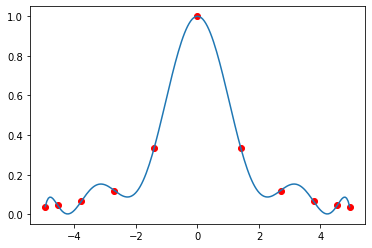

In [16]:

xe = PTchebychev(-5, 5, m[0]) 
GraphInterp(xe, g(xe))



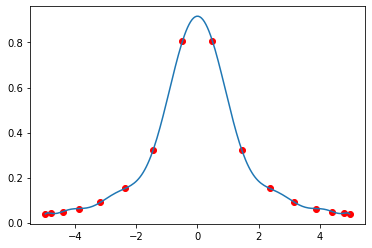

In [17]:

xe = PTchebychev(-5, 5, m[1]) 
GraphInterp(xe, g(xe))



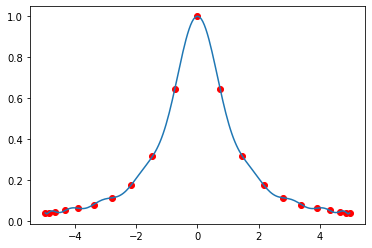

In [18]:

xe = PTchebychev(-5, 5, m[2]) 
GraphInterp(xe, g(xe))




<div class="alert alert-success"><span style="font-size: 25px;"><i aria-hidden="true" class="fa fa-lightbulb-o"></i></span><font color="black" face="Times" size="3"><b>  Bonus</b></font><br/>
<font color="black" face="Times" size="3">  Une autre formulation et superposition des résultats</font>
</div>


In [19]:

def GraphInterp2(x, y, mark='or'):
    
    #plt.close()
    # tracé des points
    plt.plot(x, y, mark) #r=rouge, o=ronds
    
    # tracé de la courbe avec une résolution 200 points
    xcourbe = np.linspace(x[0], x[len(x)-1], 200)
    A = Interp(x,y) # Le polynôme interpolateur
    p = poly.polyval(xcourbe, A) # Calcul des images p(x) sur la grille d'abscisses
    plt.plot(xcourbe, p, label='m='+str(len(x)-1));




<ul>
<li>$2^{\text{nde}}$  formulation :  $x_k =$ <font size="3">$\frac{b+a}{2} + \frac{b-a}{2}\cos(\frac{\pi}{n})$</font></li>
</ul>


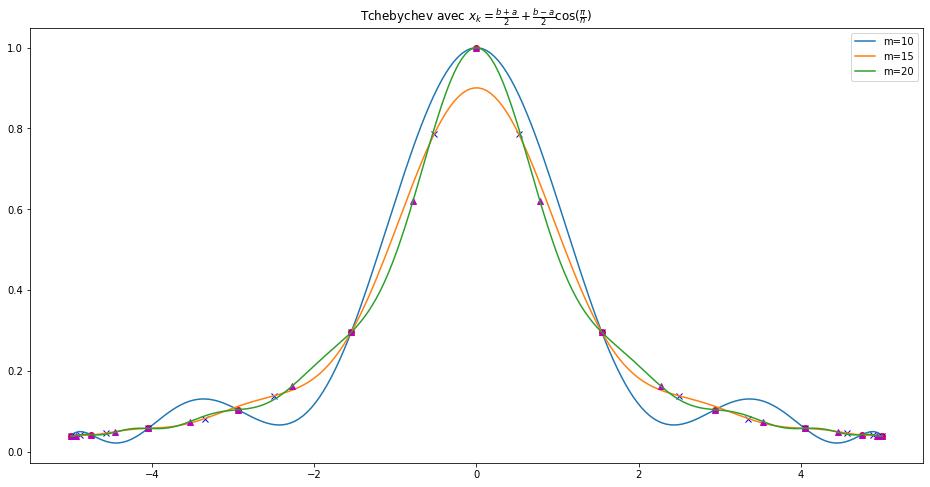

In [20]:

def PTchebychev2(a, b, n):
    N = np.arange(n+1)
    C = np.cos(np.pi/n*N)
    
    return (a + b)/2 - (b - a)/2 * C

# Résultats
plt.figure(figsize=(16,8))
# m = 10
PTchebychev2(0, 2, 5) 
xe = PTchebychev2(-5, 5, m[0]) 
GraphInterp2(xe, g(xe), mark='or')
# m = 15
xe = PTchebychev2(-5, 5, m[1]) 
GraphInterp2(xe, g(xe), mark='xb')
# m = 20
xe = PTchebychev2(-5, 5, m[2])
GraphInterp2(xe, g(xe), mark='^m')
plt.title(r'Tchebychev avec $x_k = \frac{b+a}{2} + \frac{b-a}{2}\cos(\frac{\pi}{n})$')
plt.legend(loc='best');



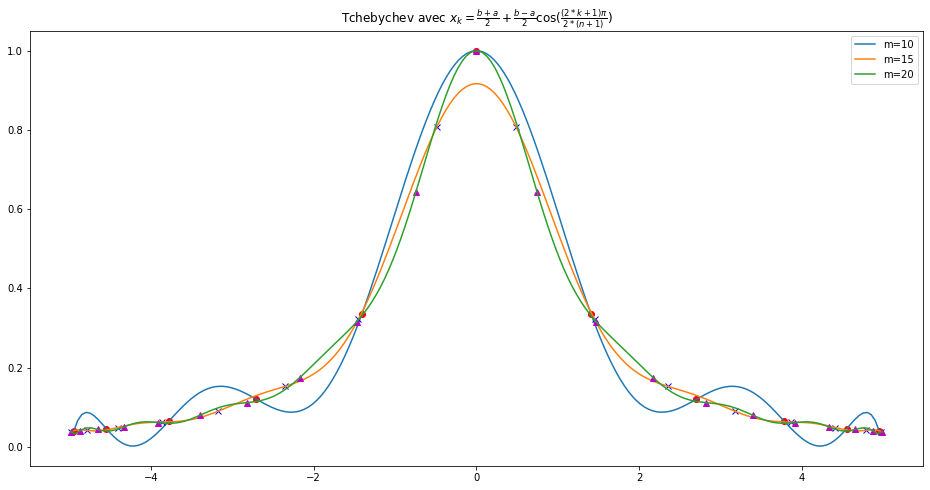

In [21]:

def PTchebychev(a, b, n):
    xT = np.zeros(n+1)
    for k in range(n+1):
        xT[k] = (a+b)/2 - (b-a)/2 * np.cos( ( (2*k+1)*np.pi )/( 2*(n+1) ))
    
    return xT

# Résultats
plt.figure(figsize=(16,8))
# m = 10
PTchebychev2(0, 2, 5) 
xe = PTchebychev(-5, 5, m[0]) 
GraphInterp2(xe, g(xe), mark='or')
# m = 15
xe = PTchebychev(-5, 5, m[1]) 
GraphInterp2(xe, g(xe), mark='xb')
# m = 20
xe = PTchebychev(-5, 5, m[2])
GraphInterp2(xe, g(xe), mark='^m')
plt.title(r'Tchebychev avec $x_k = \frac{b+a}{2} + \frac{b-a}{2}\cos(\frac{(2*k+1)\pi}{2*(n+1)})$')
plt.legend(loc='best');




<p>La première formulation raccorde mieux les extrémités de l'intervalle. Les oscillations y sont plus contenues.</p>



<p><a id="Exo8"></a></p><div align="right"><a href="#top">Haut du document</a></div>



<div class="alert alert-info"><font color="black" size="5"><b>8. Méthode de Lagrange</b></font></div>



<p>La méthode de Lagrange consiste à décomposer le polynôme interpolateur cherché dans une base de polynômes $L_j$ particuliers, appelés <i>polynômes de Lagrange</i>, qui respectent certaines contraintes. Ainsi, pour une interpolation de degré $n$, associée aux abscisses d’interpolation $x_0 &lt; .. &lt; x_n$, la base de Lagrange contient $n + 1$ polynômes qui
vérifient :<br/></p>
<ol>
<li>$\forall j \in [0, n], \deg L_j = n$</li>
<li>$\forall j \in [0, n], \forall k \in [0, n], L_j(x_k) = \delta_{jk}$
<br/></li>
</ol>
<p>Le polynôme interpolateur cherché s’écrit alors<br/></p>
<p></p><div align="center">$P(x) = \sum_{j=0}^n{y_j L_j(x)}$
</div><br/>
<p>ce qui assure, par construction, que<br/></p>
<p></p><div align="center">$\deg P = n+ 1 \text{   }$ et $\text{   } \forall k \in [0, n], P(x_k) = y_k$
</div><br/>
<p>Par exemple, dans le cas du segment $[0, 1]$ et de deux points $x_0 = 0$ et $x_1 = 1$ on aura<br/><br/></p>
<p></p><div align="center">$L_0(x) = 1 - x\text{   }$ et $\text{   } L_1(x) = x$
</div><br/>
qui vérifient bien les conditions et on a alors comme polynôme interpolateur<br/><br/>
<p></p><div align="center">$P(x) = y_0L_0(x) + y_1L_1(x) = y_0(1 - x) + y_1 x$
</div><br/>
qui vérifie bien $P(0) = y_0$ et $P(1) = y_1$.<br/>
On peut aussi vérifier facilement que, en posant :
<ul>
<li>$S(x) = \prod_{i=0}^{n} (x - x_i)$.<br/></li>
<li>$R_k(x) = $<font size="3">$\frac{S(x)}{x-x_k}$</font>$ = \prod_{i=0,i \neq k}^{n} (x - x_i)$</li>
</ul>
<p>On obtient l’expression :<br/></p>
<p></p><div align="center"><font size="3">$L_k(x) = \frac{R_k(x)}{R_k(x_k)} = \prod_{i=0,i \neq k}^{n} \frac{(x - x_i)}{(x_k - x_i)}$
</font></div><br/><br/>
En notant $L_k(x) = \sum_{i=0}^{n} L_{k,i}x^{i}$, c’est-à-dire en décomposant chaque polynôme de Lagrange dans la base canonique ($L_{k,i}$ est alors un scalaire), on peut construire la <i>matrice de Lagrange</i>, définie par<br/>
<p></p><div align="center"><font size="2">$M_L \in $<font face="Kunstler Script" size="3">M</font>$_{n+1}(\mathbb{R}) \text{   }$ et $\text{   } M_L = (L_{i,j})_{(i, j) \in [0,n]^2}$
</font></div><br/><br/>
Autrement dit, la colonne numéro $k$ (en commençant à $0$ comme en Python) contient les coefficients du polynôme $L_k$.<br/>
Il est alors facile de constater que la colonne $A$ des coefficients du polynôme interpolateur $P(x) = \sum_{j=0}^n a_j x^j$ cherché s’obtient par le simple produit :<br/>
<p></p><div align="center">$A = M_L Y$</div><br/>
où $Y$ est la colonne des valeurs $y_k$.<br/>
On remarquera en particulier que les matrices de Lagrange $M_L$ et de Vandermonde $M_V$ sont inverses l’une de l’autre.<br/>
<h3>Exercice 7.  <font size="3">Interpolation de Lagrange, version 1.</font></h3>
<ol>
<li><p>Construire une fonction <font face="Courier">Lagrange()</font> qui prend en entrée une liste de réels $x_0 &lt; x_1 &lt; .. &lt; x_n$, un entier $k \in [0,n]$ et qui renvoie le polynôme $L_k$ de Lagrange selon la formule<br/>
</p><div align="center"><font size="3">$L_k(x) = \prod_{i=0,i \neq k}^{n} \frac{(x - x_i)}{(x_k - x_i)}$
</font></div><br/><br/>
</li>
<li><p>Construire une fonction <font face="Courier">InterpLagrange1()</font> qui prend en entrée deux listes de réels $x_0 &lt; x_1 &lt; .. &lt; x_n$ et $y_0, y_1, .., y_n$ et qui renvoie le polynôme interpolateur de Lagrange selon la formule<br/>
</p><div align="center"><font size="2">$P(x) = \sum_{k=0}^n {y_k L_k(x)}$
</font></div><br/><br/>
</li>
<li><p>Vérifier que pour $x = [1, 2, 3]$ et $y = [0, 1, -1]$ l’appel <font face="Courier">InterpLagrange1(x,y)</font> renvoie <font face="Courier">array([-4., 5.5, -1.5])</font>.</p>
</li>
</ol>



<div class="alert alert-success"><b><font color="black" face="Times" size="3">Réponse</font></b> :
</div>



<ul>
<li>fonction <font face="Courier">Lagrange()</font></li>
</ul>


In [22]:

def Lagrange(x, k):
    D = 1
    for j in range(len(x)):
        if j != k:
            D *= (x[k] - x[j])
    racines = np.concatenate( (x[0:k], x[k+1:]) )
    N = poly.polyfromroots(racines)
    
    return N/D



In [23]:

def LagrangeBis(x, i): # Alternative avec la fonction prod
    racines = np.concatenate( (x[0:i], x[i+1:]) )
    N = poly.polyfromroots(racines)
    D = np.prod( x[i] - racines)
    
    return N/D




<ul>
<li>fonction <font face="Courier">InterpLagrange1()</font></li>
</ul>


In [24]:

# Interpolation de Lagrange en calculant P=Somme yiLi
def InterpLagrange1(x,y):
    n = len(x)
    P = np.zeros( n )
    for i in range(n):
        P = P + y[i]*Lagrange(x, i)
    return P




<ul>
<li>vérification du bon fonctionnement</li>
</ul>


In [25]:

xe, ye = [1, 2, 3], [0, 1, -1]
InterpLagrange1(xe, ye)



array([-4. ,  5.5, -1.5])


<h3>Exercice 8. <font size="3">Interpolation de Lagrange, version 2.</font></h3>
<ol>
<li><p>Construire une fonction <font face="Courier">MatriceLagrange()</font> qui prend en entrée deux listes de réels $x_0 &lt; x_1 &lt; .. &lt; x_n$ et $y_0, y_1, .., y_n$  et qui renvoie la matrice de Lagrange selon la formule<br/>
</p><div align="center"><font size="2">$M_L = (L_{i,j})_{(i, j) \in [0,n]^2}$
</font></div><br/>
où $L_k(x) = \sum_{i=0}^{n} L_{k,i}x^{i}$
<br/><br/>
</li>
<li><p>Vérifier que pour $x = [1, 2, 3]$ et $y = [0, 1, -1]$ l’appel <font face="Courier">MatriceLagrange(x, y)</font> renvoie<br/>
<font face="Courier">array([[ 3. , -3. , 1. ],</font><br/>
<font face="Courier">[-2.5, 4. , -1.5],</font><br/>
<font face="Courier">[ 0.5, -1. , 0.5]])</font><br/><br/></p>
</li>
<li><p>Construire une fonction <font face="Courier">InterpLagrange2()</font> qui prend en entrée deux listes de réels $x_0 &lt; x_1 &lt; .. &lt; x_n$ et $y_0, y_1, .., y_n$ et qui renvoie les coefficients du polynôme interpolateur (rangés dans l’ordre des puissances croissantes) associé au support des points $M_i(x_i, y_i)$ par la méthode de Lagrange selon la formule<br/>
</p><div align="center">$A = M_L Y$</div><br/>
où $A$ est la colonne des coefficients $a_k$ du polynôme interpolateur $P(x) = \sum_{k=0}^n {a_k x^k}$. Les plus avancés pourront programmer eux-même la fonction <font face="Courier">InterpLagrange()</font>. Les autres pourront utiliser la fonction
<font face="Courier">InterpLagrange()</font> écrite dans le fichier <font face="Courier">Lagrange.py</font> à copier/coller dans votre script. La trame de cette fonction est la suivante :<br/>
<p><font face="Courier">def InterpLagrange(x, y): #x et y matrices lignes définies avec np.array([..])</font><br/>
<font face="Courier">n = len(x)</font><br/>
<font face="Courier">L = np.ones( (n, n) ) # Matrice de Lagrange</font><br/>
<font face="Courier">for k in range(n):</font><br/>
<font face="Courier">racines = np.concatenate( (x[:....], x[....:]) ) #attention aux doubles parenthèses</font><br/>
<font face="Courier">denominateur = np.prod(..... - .......)</font><br/>
<font face="Courier">L[:, k] = poly.polyfromroots( ....... )/denominateur</font><br/>
<font face="Courier">return np.dot( L, np.transpose(y) )</font><br/>
<br/></p>
</li>
<li>Représenter graphiquement les interpolations de la fonction $g : x \mapsto \frac{1}{1+x^2}$ sur l’intervalle $[a, b] = [-5, 5]$ dans les cas suivants<br/>
 a. Cas de $n = m + 1$ abscisses équiréparties entre $x_0 = -5$ et $x_n = 5$ avec $m \in \{10, 15, 25\}$.<br/>
 b. Cas de $n = m + 1$ abscisses de Tchebychev entre $x_0 = -5$ et $x_n = 5$.</li>
</ol>



<div class="alert alert-success"><b><font color="black" face="Times" size="3">Réponse</font></b> :
</div>



<ul>
<li>fonction <font face="Courier">MatriceLagrange()</font></li>
</ul>


In [26]:

def MatriceLagrange(x, y):
    n = len(x)
    L = np.ones( (n,n) )
    for k in range(n):
        racines = np.concatenate( (x[:k], x[k+1:]) )
        N = poly.polyfromroots(racines)
        D = np.prod( x[k] - racines )
        L[:,k] = N/D
    
    return L




<ul>
<li>vérification du bon fonctionnement</li>
</ul>


In [27]:

xe, ye = [1, 2, 3], [0, 1, -1]
MatriceLagrange(xe, ye)



array([[ 3. , -3. ,  1. ],
       [-2.5,  4. , -1.5],
       [ 0.5, -1. ,  0.5]])


<ul>
<li>fonction <font face="Courier">InterpLagrange2()</font></li>
</ul>


In [28]:

def InterpLagrange2(x, y):
   # Interpolation de Lagrange en calculant P = M_L Y

    # matrice de Lagrange
    L = MatriceLagrange(x, y)
    # Second membre
    Y = np.transpose(y)
    # Coefficients du polynôme
    P = np.dot(L, Y)
    
    return P




<ul>
<li>fonction <font face="Courier">InterpLagrange()</font></li>
</ul>


In [29]:

def InterpLagrange(x, y): # x et y matrices lignes définies avec np.array([..])
         
    n = len(x)
    L  = np.zeros( (n,n) )  # L est la matrice de Lagrange
    
    for k in range(n):
        racines = np.concatenate( (x[0:k], x[k+1:n]) ) # Tab est le tableau XE sans le numéro k
        denominateur = np.prod(x[k] - racines)
        L[:, k] = np.poly(racines)/denominateur             
        #L[:, k] = poly.polyfromroots(racines)/denominateur             
    
    return np.dot(L, y.T)




<ul>
<li>vérification du bon fonctionnement</li>
</ul>



<p>    Cas de $n = m + 1$ abscisses équiréparties entre $x_0 = -5$ et $x_n = 5$ avec $m \in \{10, 15, 25\}$.<br/></p>


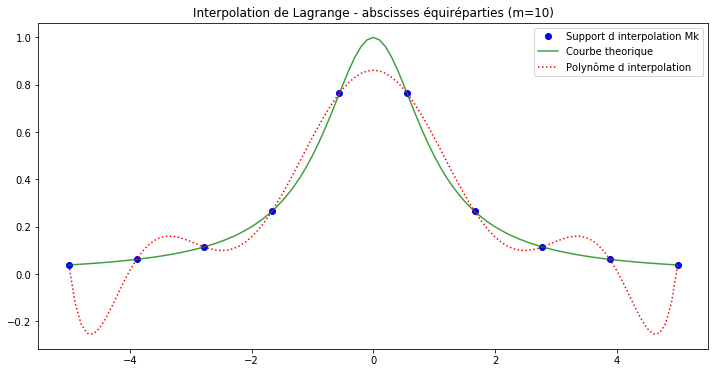

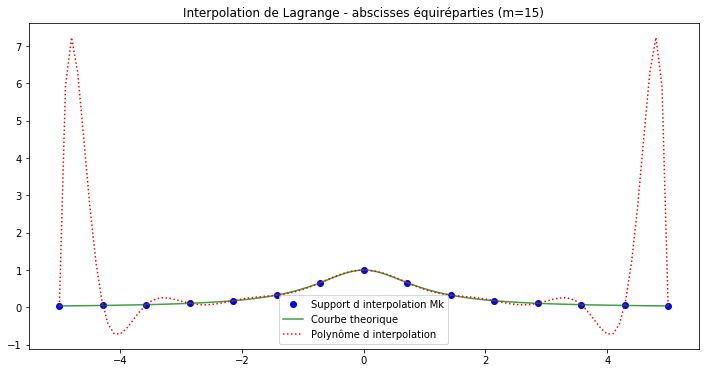

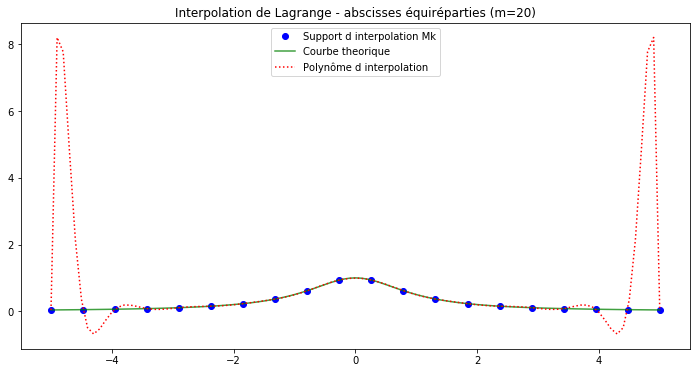

In [30]:

# Représentation graphique de l'interpolations de la fonction g(x)=1/(1+x^2) sur [-5; 5]
def g(x):
    return 1/(1+x**2)

def graphInterPol(f, a, b, m):
    # Initialisation
    xe = np.linspace(a, b, m)
    xs = np.linspace(a, b, 101)
    
    # Calcul
    ye = f(xe)
    P = InterpLagrange2(xe, ye)
    ys = poly.polyval(xs, P)

    # Représentation graphique
    plt.figure(figsize=(12,6))
    plt.plot(xe, ye, 'ob', label='Support d interpolation Mk')
    plt.plot(xs, f(xs), '-g', alpha=0.75, label='Courbe theorique')
    plt.plot(xs, ys, ':r', label='Polynôme d interpolation')
    plt.title("Interpolation de Lagrange - abscisses équiréparties (m="+str(m)+")")
    plt.legend(loc='best');
    
    return

# script principal
M = [10, 15, 20]
for m in M:
    graphInterPol(g, -5, 5, m)




<p>    Cas de $n = m + 1$ abscisses de Tchebychev entre $x_0 = -5$ et $x_n = 5$.</p>


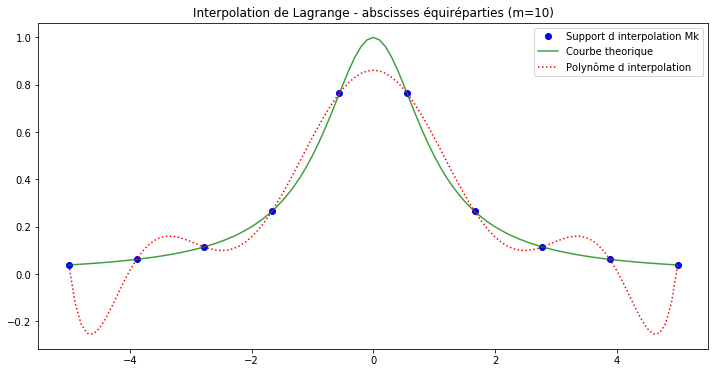

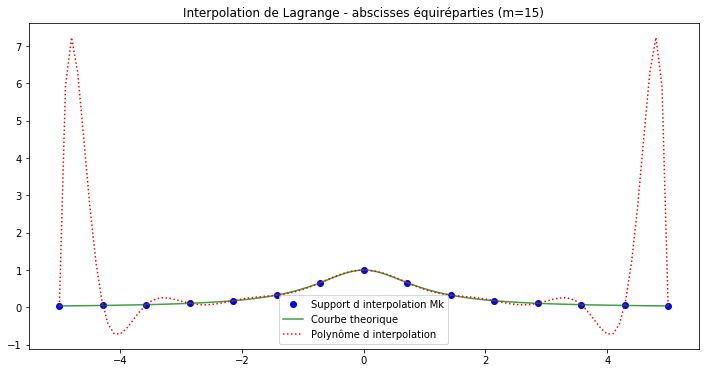

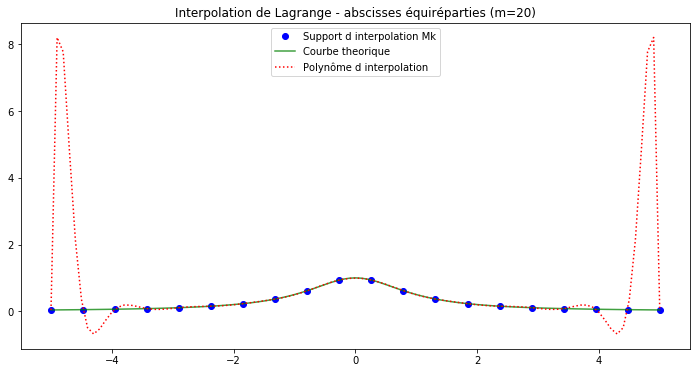

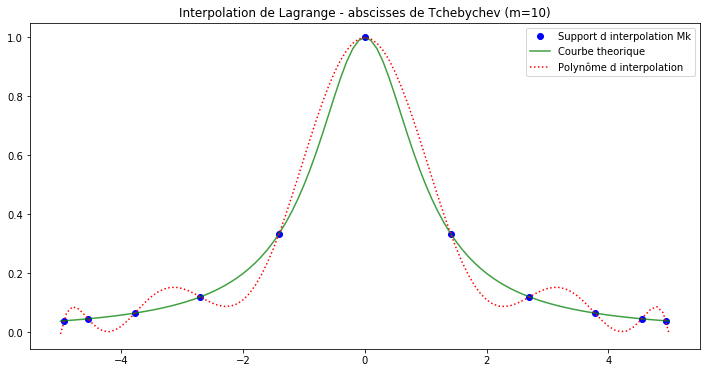

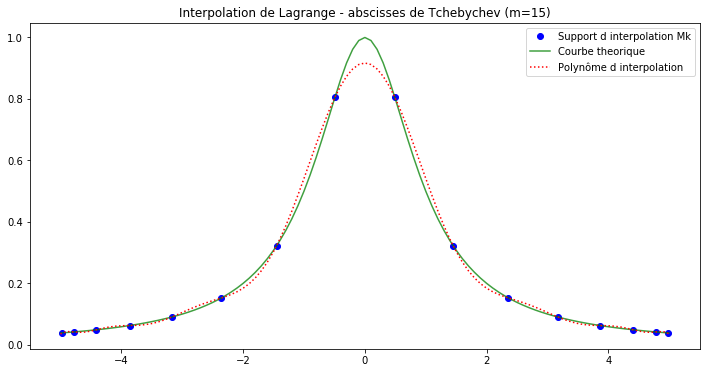

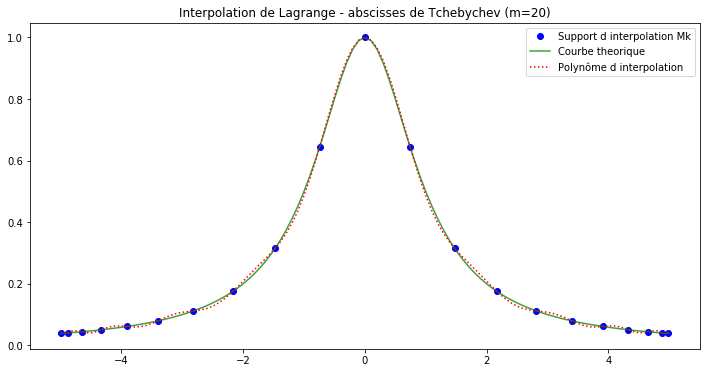

In [31]:

# Représentation graphique de l'interpolations de la fonction g(x)=1/(1+x^2) sur [-5; 5]
def g(x):
    return 1/(1+x**2)

def graphInterPol2(f, a, b, m, meth='Tchebychev'):
    # Initialisation
    if meth == "Tchebychev":
        xe = PTchebychev(a, b, m)
        titre = "de Tchebychev"
    else:
        xe = np.linspace(a, b, m)
        titre = "équiréparties"
    
    xs = np.linspace(a, b, 101)
    
    # Calcul
    ye = f(xe)
    P = InterpLagrange2(xe, ye)
    ys = poly.polyval(xs, P)

    # Représentation graphique
    plt.figure(figsize=(12,6))
    plt.plot(xe, ye, 'ob', label='Support d interpolation Mk')
    plt.plot(xs, f(xs), '-g', alpha=0.75, label='Courbe theorique')
    plt.plot(xs, ys, ':r', label='Polynôme d interpolation')
    plt.title("Interpolation de Lagrange - abscisses " + titre + " (m="+str(m)+")")
    plt.legend(loc='best');
    
    return

# script principal
M = [10, 15, 20]
for m in M:
    # Cas a : abscisses équiréparties
    graphInterPol2(g, -5, 5, m, meth="équi")
for m in M:    
    # Cas b : abscisses de Tchebychev
    graphInterPol2(g, -5, 5, m, meth="Tchebychev")




<p><a id="Exo9"></a></p><div align="right"><a href="#top">Haut du document</a></div>



<div class="alert alert-info"><font color="black" size="5"><b>9. Le cas paramétrique</b></font></div>



<p>Lorsqu’on travaille en paramétrique il y a plusieurs adaptations à faire. On dispose toujours de $n + 1$ points $M_k (x_k, y_k)$ mais au lieu de chercher un lien fonctionnel entre $x_k$ et $y_k$, on va exprimer que le point $M_k (x_k, y_k)$, ou de
manière équivalente, le vecteur  $\overrightarrow{OM_k}$ est l’image d’une fonction vectorielle $\overrightarrow{\varphi} : t \mapsto (x(t), y(t))$.<br/>
Ainsi, la problématique de l’interpolation se pose désormais de la manière suivante : Déterminer deux polynômes $P$ et $Q$ de degrés $n + 1$ tels que <br/></p>
<p></p><div align="center">$\forall k \in [0,n]$, <font size="2"> $\begin{cases} x_k = P(t_k) \\ y_k = P(t_k) \end{cases} $</font></div>
<br/>
<h3 id="Exercice-9.">Exercice 9.<a class="anchor-link" href="#Exercice-9.">¶</a></h3><p>Construire une fonction <font face="Courier">LagrangeParametrique()</font> qui permet, pour une liste $x$ d’abscisses et une liste $y$ d’ordonnées (avec le même nombre de composantes), de construire la courbe paramétrée qui interpole les points
$M_k(x_k, y_k)$ dans les différents cas :<br/></p>
<ol>
<li>Une façade de maison : <font face="Courier">x = [0, 4, 4, 2, 0, 0]</font> et <font face="Courier">y = [0, 0, 4, 6, 4, 0]</font>. Vous devez alors obtenir la figure 6.<br/></li>
<li>Un Pacman : <font face="Courier">x = [0, 1, 4, 7, 4, 7, 4, 1, 0]</font> et <font face="Courier">y = [0, -3, -4, -3, 0, 3, 4, 3, 0]</font>.<br/></li>
<li>Une clé de sol : <font face="Courier">x = [0, 2, 4, 1, -2, -2, 1, 4, 2, 0, 1, 1, -1, -1]</font> et <font face="Courier">y = [0, 3, 1, -2, -1, 3, 5, 8, 9, 5, 1, -4, -6, -4]</font>.<br/>
<i>De manière générale, vous pouvez dessiner n’importe quelle forme sur du papier quadrillé, puis relever les coordonnées, comme cela a été fait pour ces trois exemples.</i><br/></li>
<li><p>Un coeur : <font size="2"> $\begin{cases} x(t) = sin(2t) \\ y(t) = sin(t) \end{cases} $</font> sur $[0,2\pi]$ en choisissant quelques points.<br/><br/></p>
</li>
<li><p>Un huit : <font size="2"> $\begin{cases} x(t) = sin^3(t) \\ y(t) = cos(t) - cos^4(t) \end{cases} $</font> sur $[-\pi,\pi]$ en choisissant quelques points.<br/><br/></p>
</li>
</ol>
<ol>
<li>Commenter les résultats.</li>
</ol>



<p><img alt="image.png" src="data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAVQAAAEvCAYAAAAadzm3AAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAADsMAAA7DAcdvqGQAACv/SURBVHhe7d0JfBNl/gbwp0g5Ki3SUkCOWoVCQQFpqxQQpS5UpaD8uW9ZBURWRMG7dUGXY1VElEVBWGVFFFBW5VpFVkGFggUKIqd05So3FShtgULf//wmE0ivFMqkSSbP9/MpSWbSdJhMnrzvO++8r5/SgIiIrlk545aIiK4RA5WIyCQMVCIikzBQiYhMwkAlIjIJA5WIyCQMVCIikzBQiYhMwkAlIjIJA5WIyCQMVCIikzBQiYhMwkAlIjIJA5WIyCQeO3yfn5+fcY+I6Oq5I9o8OlA9dNOIyMO5Kz9Y5SciMgkDlYjIJAxUIiKTMFCJiEzCQCUiMgkDlYjIJOw25eEyTp/FidM5xqPLIupWM+4RUUHuyg8Gqgf57cAf2Lo3AylpJ7D7eBbWHc021hSvX5NQ1A2pjNvDQ9CoXjCCgyoZa4h8FwO1AF8JVAnRFZsPYP7GQ9iTlYuWNQLQrlF1RNxYFTfVCERAxfKoExpoPNsm59wFHDiWieOncnDkZI4ewHO3HdPXdQy/AfFNa+HupnUYruSzGKgFWD1Qk7cexJRvduqlUAnBAW1vvuYSpoTzup1HsHjzIf11pfTaKbouWt1a23gGkW9goBZg1UB1DNLn24ahV9sIl5Qk7SXf137cp5d6+7QMw30xN6GyVuIlsjoGagFWC1QJuLeWbMOyPSddGqQFyUmtH7akY8p3afrjpIRItI8K0+8TWRUDtQCrBKq0dy78aTeSvk3Tq+CjuzRzS9um43ZIiXVcz9vZU4Asi4FagBUCNf1YJkbNWY8jWbkeUzKUEuus5dvx7vqDGB5TG4PjG7sl4IlciYFagLcHqrSVvvjvX9Ek9HqM6xvtcaElTRBJCzbpYT+x6208cUWWYqlA3bdvH2bMmKHfj4+Pxz333KPft1u1ahVSUlLQqVMnREZGGkvz8+ZAfW/pFv1k0LgO9dH/T0X//zyBYzOAlFZHdG6Kynm5wP79QL16QOXKxjOJvIulAnXHjh3GPeCRRx7B4sWLERISoj+WdUlJSXjxxRcxceJEfPTRRwgICNDXOfLGQJWAmr1iux6mnw5o4TWlPimtDvkwBTXVBUz+zwzU2fMzUKEC8Le/AQMHGs8i8h7uyg+XXMtvL3WmpdnOLFd2KOnIsu7duyM6OhqxsbF6adYKJExHf7hO76C/evTdXlWFlpNT/3nuXjQ4fBht7hmKFdF9pZoBvPyy9h8rfNkrERXNpYOjbN++Xb/NcfhQZmZmIjDQduVPUFDQpdC1k28W+fEm9jDddiwLc4e1KnRlkzeofOwwxn+RiCm7kjH4tnvxXv83kFO+qq36T0RXxGWBKqXUZ555Bs2bN0dWVpaxVCsNRUQgPT1dv5+amqqXUh1JMd2bqvpWCFNd3bpAWBi6fDEe366cjfk162N0x2eRc9MtxhOIqCQuCdR58+YhMTFRr9qLMO2DKm2nsiw8PBzLly/X1wUHB19qW/VGlglTu1mzgFatELHuc8zd8hlQrwYeeP07vfsXEZXMZd2mJEBDQ0OLDUxpO5WgLY43nJSSs/nSZmqJMHWUkQHt2856XxjkM9yVH+yHWkr2rlFyAsrKQSOh6o09F8i3uSs/OGJ/KazYuO9SwFi91CaDqTye0FQff6DPnFT9ggUiKhoD9SpJn83BC7ZgSudInyqtMVSJSsYq/1WQ6+C7vv0DekXdqAeML5LSuXyhsPpPnoxVfi+Q9MkG/dr8Qe0bG0t8jwzwImHKkipRYQzUK/Txf3foZ7sTuzXz+UGapWTKUCUqjIF6BTanHdMHEJFRmdh1yIahSlQYA7UE0m468pNU/YQM2wzzk/3BE1VElzFQS/Dml7+g5vX+Pt1u6gzP/hNdxkB1Qs5oy/TMMl0IJ7crnj1UZUBtXqZKvoyBWgyp6o9bukPvb8q5l0omodqxcSj6TU9mqJLPYqAWQ6r60kWqS5v6xhIqiYz4L/tM5tGSS1aJfA0DtQjSFihV/ac7NTGW0JWQZpE3/9wSIQEV9EFVGKrkaxioBUgISFugzAfFqv7Vk1CVvrrSZ3fq4i3GUiLfwEAtQEZWEt3uaqDf0tWTvroy3J9MVS2jchH5CgaqAxn4REaRertvC57Vv0YSqtLxX/Ynu1ORr2CgOnhryTb0axKK5vVDjSV0LaTjv/SSkD6q8mVFZHUMVIOUopbtOYnhD7ADv5mkl4T0UZVpqtmdiqyOgapxPBHFa/XNJ1eZSXeq8Qt/4Zl/sjQGquab9Xv1W56Icg1pjx7XN5pn/snyfD5Q5YqopxbvQFJCJE9EuVBwUCXM/PMd+pn/L1enGUuJrMUlI/bLjKYzZsxAtWrVEBcXh+joaGPN5XV248ePN+7lV1Yjbku3npU7j2P+qDhjCbmSfcT/r4bcyZN/5DKWGrE/OzsbXbt21cN0xIgR+mM7uZ+RkYEBAwboP+4kpVPp1vPUfY2MJeRqMuK/nKSSIRFl/xNZiUsCNTIyUi+VNm7cGMnJycZSm4CAAGzevBlLlixBVlaWsdQ95Hr9juE3cJzTMmY/SSVTyhBZicvaUKUkOnDgQD04JUTtqlevjnnz5uml15iYmHylVyFFdflxNekXyev13cPx8lSZWobIKlxW5R89ejTi4+ORkJBgLLWRcA0LC9NLsN26dUNOTo6xxkbaPcqi7WP2d7/pnfh5vb57SPc0mVJGppaRKWaIrMAlJ6WkBNqnTx8MGzYMwcHBeOyxx/SQnTNnDpo2bYotW7Zg586daNSokVtOSknptMM/1uDbJ1ozUN1MTgrO33hIv/affYDJLO46KeWWefl37NiB0NBQhISEGEsKc+UOSfzoZ/12/MA79Vtyr+HTV+u3MvQfu66RGdwVqG7phyonrZyFqSvZ204H3RthLCF3s3f6t4/0ReSt3BKo7sS2U88jnf5lhC/pwsb2VPJmPhWoLJ16LunkL2MpsH8qeTOfCtQVmw+wdOrBZCwF9k8lb+YzgWq/KqpTdF1jCXkax/6pvN6fvJHPBOr8H39DyxoBvCrKw0nXKRmoRgas4aDU5G18IlB5zb53kev9h8fU1gel5vip5E18IlB/2JLO0qmXkTn+BcdPJW9i+UCVEs6U79LQp2WYsYS8gbSn2sdPlSH/iLyB5QN10+6j+u19MTfpt+Q9pDeGdKUat3QHu1KRV7B8oE75Zid6Rd3ISxq9VP8/RepdqWSoRSJPZ+lAlatu1h3NRq+27MjvzaQrlVyQwa5U5OksHagLVv+ud+SXSxvJe0lXKpnfX7pScSpq8mSWDVRpc5NSTc82NxtLyJvJ/P7y5cipqMmTWTZQl6Xs0btKcSI46xjdxXYV1cKfdhtLiDyLJQNVSjCz1uzDkHb1jSVkBdJ0Yx/ln1dRkSeyZKBKV6k9Wblow478liMXZ8hVVEkLNrHqTx7HkoE658ff9amK2VXKmuQqqiPaFyar/uRpLBeochZ42Z6TePDOcGMJWY18UcqA1Kz6k6exXKAu+nmPPtc+J3yzNjnZyKo/eRpLBap8sGQGzQFt2VXKF9ir/pyLijyFSwJ13759SExMxKRJk7BhQ+HR11etWqWvk9lPTXPgADYt+lG/e3uDGvotWZu96s+5qMhTuCRQZQ7+rl27Ii4uDiNGjNAf20mITp06VV+XlJSUb12pDRoE3HUX5qzaj157tqHy3v8ZK8jq7FV/mYuKVX9yN5cEqkwTHR0djcaNGyM5OdlYapOWlobu3bvr62NjY/XS7DXZtAlYuRLpN0RiWZUQtN+6Gvj4Y2Ml+QKOnUqewmVtqFLyHDhwIJYsWYKAgABjKZCZmYnAQNsJo6CgID1gHfn5+ek/VywlBdi7F9vr3oqWZzMRse5z4NNPjZXkC+xVfxk7lVV/cieXVflHjx6N+Ph4JCQkGEttIiIikJ6ert9PTU3VS6mOlFL6zxV74AHgppvQfulkzP5srG3Z00/bbslnsOpPnsAlgbpo0SJMnz5dD0w5OSXVemk7lfvh4eFYvny5Xu0PDg5GSEiI8VulVLcu8OqrQFQUKh/cCbz8MtC7t7GSfIm96s8O/+Quflpp8CqKg+aRkA0LK35aEqn2X/Wm5eRo9b/KxgPyRVLlf2jmz/j2idb6iP/km0qVHyZwW6CWxF07hLzf65+nYsO+k5j9l7a8/NhHuSs/XHZSishdeK0/uQsDlSyH1/qTuzBQyZLkrL+M8M9r/aksMVDJsmSEf1b9qSwxUMmyZIT/pIRIVv2pzDBQydLaR4XpVf+3lmwzlhC5DgOVLM8+uR/n9SdXY6CS5dmr/pzXn1yNgUo+wV71l3n9iVyFgUo+Y/gDjfX5xlj1J1dhoJLPkHnGpnSOxJTv0pBx+qyxlMg8DFTyKV3a1EeT0Ovx5pes+pP5GKjkcxK7NcPcbcewYuM1zhZBVAADlXyOveo/bukOVv3JVAxU8kn3xdyEmtf7s+pPpmKgkk+SEanG9bxdr/pzHioyCwOVfJaM6D+uQ33OQ0WmYaCST+t2VwO96s8pqMkMDFTyafaqP6egJjMwUMnnSdWfU1CTGVwySd+JEyewcOFC7N27F+PHjzeW2shspzNmzDAeodB6O07SR2VJgvSB17/D4NZh6P+nSGMpeSvLTdJXp04dTJgwwXh0WXZ2NjIyMjBgwAD9h8gTcB4qMoNLAjUkJAQJCQnGo/wCAgKwefNmLFmyBFlZWcZSIveTeaik6s95qKi0XDovf1HFbimhHj9+HMeOHUNMTIweqhKydvI7dqzyU1lj1d8afGZefgnPsLAwREdHo1u3bsjJyTHW2MhOYJCSu0jVn/NQUWm5JFDlxFNiYqJ+X27l8Y4dO/T78+bN02+7d++ORo0a6c0DRJ6E81BRabm0yl8cCdfQ0FCnYcqz/OROMmhK17d/wFP31teH/CPv4q78cEugXgkGKrmbDO83eMEWrB59tz5CFXkPn2lDJfIWUvXvGH4D56GiK8ZAJXJCBqPmPFR0pRioRE5wHiq6GgxUohJwHiq6UgxUoivAeajoSjBQia6AVP1lMGrOQ0XOMFCJrpB9MGpW/ak4DFSiK8R5qKgkDFSiq8B5qMgZBirRVeI8VFQcBirRVZKq/0sP3cZ5qKgQBipRKdgHo57w1a+s+tMlDFSiUhrRuSmOZOVi4U+7jSXk6xioRKXEeaioIAYq0TXgPFTkiIFKdI0Gxzdm1Z90DFSiaxQcVOnSPFTpxzKNpeSLGKhEJrDPQ8XBqH0bA5XIJKO7NMO2Y1kcjNqHMVCJTGKv+j+1eAer/j7KJZP0nThxAgsXLsTevXsxfvx4Y+llq1atQkpKCjp16oTIyEhjaX6cpI+81fDpq/Xbd5tq/4SGAg0b6o+p7Fhukr46depgwoQJxqPLZArpqVOnIi4uDklJScjOzjbWEFlDYpua2JZ2FF9O+QZo1w5o3RrIyTHWkpW5JFBlvv2EhATjUX5paWno3r07oqOjERsbi337OAI6WUudr+YhaftPeKp+S6TXaAbs3w8kJxtrycrKvA01MzMTgYG2Oc6DgoL0gHUkRXX5IfJaq1ej/dLJ6PfHQYxv0xc5edcDK1caK8nKyjxQIyIikJ6ert9PTU3VS6mOpN2Dbafk1YYP129Gr/wQ2yoHYuE9A4H+/fVlZG0uCVSpxicmJur35VYeS9up3A8PD8fy5cv1an9wcLDePEBkKe3bA2+9heCz6Ug6sAFJYc3xW0CosZKszCVn+a+EhGxYWJjxqDCe5SereP3zVGzYdxKz/9JWH1CFXM9yZ/lL4ixMiayEw/z5DrcFKpGvcBzmjyP8WxsDlagM2If54+R+1sZAJSojUvXn5H7WxkAlKiP2ef1lcr8VG3lBixUxUInKkMzrP6VzJMYt5QAqVsRAJSpjXdrUR5PQ6zl2qgUxUIncYFzfaH3s1I//u8NYQlbAQCVyA8dpUzhjqnUwUIncRKZNka5UQz5MYVcqi2CgErmRvSvVuPkbjSXkzRioRG4kXakmD4jB3G3HOBeVBTBQidysTmig3pWKc1F5PwYqkQeQrlQyDfWoOevZnurFGKhEHiKpV5Q+KhUvTfVeDFQiDyHtqTP/fAcvTfViDFQiD2K/NHXwgi1sT/VCDFQiDyPtqdI/td/0ZLanehkGKpEHYv9U78RAJfJA9v6pq/ee5PX+XoSBSuShpH/qxK636df7J289aCwlT+ayWU9XrVqFlJQUdOrUCZGRkcZS22ynM2bMMB4B48ePN+7lx1lPiWzeW7oF8zcewtxhrfSQpZJZatZTmYN/6tSpiIuLQ1JSErKzs4010O9nZGRgwIAB+g8ROfd4QtNL46fyJJVnc0mgpqWloXv37oiOjkZsbKxeKrULCAjA5s2bsWTJEmRlZRlLiciZN//cUh8/lSepPJtLAjUzMxOBgbaqSVBQkB6wdtWrV8e8efP00mtMTEy+0quQorr8ENFlcpJKqvxykkqaAMgzuSRQIyIikJ6ert9PTU3VS6l2UkINCwvTS6/dunVDTk6OscZG2j3YdkpUmP0k1Ws/7uNJKg/lkkANDw/H8uXL9Wp/cHAwQkJC9HbVxMREvXQqt7KuUaNG+joiujKtbq2NcR3qo8+cVF5J5YFcdpZfSNuplEYLknANDQ11GqY8y09UPJ75d85d+eHSQL0WDFSi4snZ/tEfrsOJ7POY/Ze2ehsrXcZALYCBSuScPVSF9AJgqF7mrvxwSRsqEbmeBGhit2Z6dyqOoeoZGKhEXkzaT6Udddn2Y+xO5QEYqERezrE7FUPVvRioRBYg3ak+HdBCD1XOnuo+DFQii7CHqsyeyo7/7sFAJbIQCVWZQkU6/jNUyx4DlchiZAqV59uGMVTdgIFKZEEy5B9DtewxUIksiqFa9nilFJHFyVl/OVElbavSHOALeOlpAQxUIvNICVVKqlJilZKr1fHSUyJyGcd+quz87zosoRL5kN8O/IEhH6boc1RZeUAVVvkLYKASuYYMTD1qznr9vsz9b8XxVFnlJ6IyIQEqY6iGBFRAv+nJ2Jx2zFhD14olVCIfJu2p0q5qtR4ArPIXwEAlKhsrNu7D4AVb0K9JKJJ6RVmiXZWBWgADlajs2NtVj2Tl4u2+LdC8fqixxjsxUAtgoBKVLZlSZfaK7XoTwPCY2hjRuanXllYtF6irVq1CSkoKOnXqhMjISGOpjbN1dgxUIveQk1QjP0nV78vA1dKH1a127QK2bAE6dgQqVzYWOueu/HDJWX6ZJnrq1KmIi4tDUlISsrOzjTXO1xGR+0l1/z/P3YvBrW3jACR+9LPef9UtunYF2rUDuncHAgKAdbZJCT2VSwI1LS1N+/93R3R0NGJjY/X5+e2crSMizyBV/f5/isS3T7TWH3f4xxq9R0DG6bP64zIhJdO1a5ERGI7kDo/blo0fb7v1UC4J1MzMTAQG2joLBwUF6SFq52ydkKK6/BCR+0XUrYbxA+/EV0PuxMqdxxE14b94/fPUMimxZmz4FR/fPRxR/5eIKU3uti3cvNl266FcEqgRERFIT0/X76empuolUTtn64S0e7DtlMizSDPA/FFxerCeys7VS6y9Jn+vD7oiJ7PMJGEtpeGozRWxuFYDfLpxKea/3ce2csgQ262HcslJqRMnTuCxxx7T7zdq1EgrpY/X207nzJmDUaNGFVpXFJ6UIvJc0s1q0c97MH/jIezJytV7BUTdEoLG9aqV6lJWCdF1O49g8eZDWHc0Gx3Db8CAtjej1Zn9wDvvAD/9ZAvT0aOv6MSUu/LDpd2mpH00LCzMeJSfs3WCgUrkHaRXwJodh/UmAQlDIRcJ1A2pjBtvCECVyv64qcblkN17NBNncnJx6GQ2DpzIwdxttktfJURbR4Sg4x3hCA6qpC8rLUsG6rVgoBJ5HzlptXN/Bo6czEFK2gl92e7jWZeCVrSsEYAG1a9H1QB/NLwxCDfXCkLDutVM7fPKQC2AgUpEpeWu/OBoU0REJmGgEhGZhIFKRGQSBioRkUkYqEREJmGgEhGZhIFKRGQSj+6HSkRUWu6INo8N1NLwhosBuI3m4Daah/vSPKzyExGZhIFKRGQSS1X5iYjciSVUIiKTeGUJVQawXrhwIfbu3VvkANVXMquqqznbRhkLdsaMGcYjmSbHPfPk2LejWrVq+qSJMs+XI0/YjyVto6ftSxEfH4977rlHv2/nSftSFNxGT9mPdkuXLtVn9hg6dKixxMYT9qNTEqje5vjx42rJkiXyRWAsuWz79u2qW7duav369fptVlaWsaZslbSNw4YN02/lx13kb8t+kp9WrVrl21eesh+dbaOQ9Z6yL+0/sp3y/tvJMk/Zl8620RP2o5C/L5+bl156yVhiI8s9YT8645VV/pCQECQkJBiP8vOUWVWdbWNAQAA2b94MLXChHRTG0rIn3/Cynxo3bozk5GRjqY2n7Edn2yg8aV8K+6STlR2m6fCkfSmK2kZP2Y9CppdfuXKl8egyT9mPzliuDbWkWVU9QfXq1TFv3jy9ChsTE4Ps7MujmZc1+dsDBw7UP0jyobLzpP1Y3DYKT9qXQitF6bc5OTn6rfC0Y7KobfSU/SjbIKFZs2ZNY8ll3vDZtlygljSrqieQUJD5tOSbVqu65Duwy5J8aEaPHq23pxUsTXvKfnS2jcJT9qWQEuAzzzyD5s2b5yvledIxWdw2etJ+3LJlC95++218//332LBhg7HUOz7bXhmoUtRPTEzU78utPJZZVeV+eHg4li9frn/LBQcH61Vvd3C2jfItLLeyjTLzq7u2cdGiRZg+fbp+cBbcRk/Zj862UXjKvnTcDiFfBPZt9JR9WXAbJUA97Zjs3bu3fkJs5MiRl05Cetox6Yxl+6HKB8/ZrKruJgdJaGioRx4Ujjx9PwpP2ZclbYcn7Etn28hj8tqxYz8RkUnYsZ+IyCQMVCIikzBQiYhMwkAlIjIJA5WIyCQMVCIikzBQiYhMwkAlIjIJA5WIyCQMVCIikzBQiYhMwkAlIjIJA5WIyCQMVCIikzBQiYhMwkAlIjIJA5WIyCQMVCIikzBQiYhMwkAlIjIJA5WIyCQMVCIikzBQiYhMwkAlIjIJA5WIyCQMVCIikzBQiYhMwkAlIjIJA5WIyCQMVCIikzBQiYhMwkAlIjIJA5WIyCQMVCIikzBQiYhMwkAlIjIJA5WIyCQMVCIikzBQiYhMwkAlIjIJA5WIyCQMVCIikzBQiYhMwkAlIjLJVQbqBWSuT8LLjzdETKAf/AJjUK/Tg7j11lsRE9MEXWMrw8/PD5VeX49zxm/Q1TqA1H/2wKhONyBQ25flonuj3VNzseh0Gv4zqhkeaOav7eNhGHvwAlT6W3jpwXq29+Lhf2Or8QreSyH3yI9Y8r9M7Z4bnf4YkzrXR7tbysGvwSR8dsFYfpWKfn9ykbG8AyLKPYie6/7Ql9icwdGfV2Bj5kXjsfW45nj1kGPGTpVG7gL1Rn1t++u/oRbkGstE3l6VMj5MVXwtRZ01FlnLRZWz9TX1txHt1MD4UFUf9VWTBfuMdebKXdtDe33k35d5a9Wn3Stox81jaky6bcfn7X1B9ZKjauBC9au+xGx56vyh9Sr19AXjsVky1aG1aeponvFQnJ6rXm/rrxDxhBrzu5uPoJw5alx4Ecf4VSr8/lxUWWt7qVb53ttclbm2j4rz81OVHv5crb+oL7x659PU2p2ntHfMc13b8erhx4zG3Cq/XxiiOndAiGW/ZMuhYr32aP/QQHS+3R9pxtIy4+cP/4p+xgMbv/IVUdG47xJqA74a1g0TtuUYC8yhDkzCc3GfY6XjsXJdRVS4Tu74o5K/m1ujZL/q23JtCr8/5RAQ3Q1dKt6BdnfebKwrh+vK+0P/cxUroMBbfIVycPDfvRD35W84byzxRNdyvHr8MaMxfQvKNZ2F9BdjtJ2Wh5zf3sP7T96EYL8GqPfkDLz72xnjWSIXZ36bjhmjIlGjSX/cP2o0xjzZAq0r344GT3yERZl52nPO4ljKGLzWJ1ir5rZG01c/wiz9NeS1Z2H2q80R4xeMqv3+jqSUo9rSAn9z6Bg8/2x79L4lEDWHvY856Wf1v2z7/fzP69mzp/7cgVpQOmuy8AuMQuyf+qJNdC1jiafKxekDJ7Q9WIDKwIHDV9ogk4fsnydh8lc3G4/NchAb5szEnNoFDr+Abhj5/XmoXZPxQh1/Y6HVaMfeL8vw3oAkvNEm2FhWDpWj/4Vv87R1MzrjttIEavYifPLWRu3VPaLi6wJecswYJdWrU1yVP3utmvvTYa1Sc5mt6tpO9VibaSwR59XpzU+q/pUaqdumb1JHLhXh81Tu7y+ph8sNvVSlVVql6OD8qHzV3EvSx6iBRVS7C/3N45PVUzW16tSTy9Quh+pC4W3LU+c2DFA3TlhfQpOFfZvKuMqvNqjP+1XMvy/0fXC5CnVxd5J6pGl5+VQ5VKtOq93zWqroKvJpc9xmrTp/YJqaEF9L1ejQRfVsF6TKRQ9Vj6//Q1u3S618pbm6X3+tG1VQu66qSZOHVI/vdqrUqW3U/7WspC0fop5fs1T94+EQVQV3qfu+P67yTq9QX4yNUS2CWqjbOtyi2tTwV1UfnaP+Y28yODFLje9c17YtVaJV3YTOqknsRDXrf0vVO33CbMvzHVfasbL172pi72BVrsUDKiGhrmpRrpW67ZWv1Hf21zw1R03qYntNv8e+ULuM51eRfYBIFTbmW7XlvLOKcKY6suZZ9dID1VSllg+pztrfaFyxoqpfaFs0539RP73ZWjUOvcvYljYqavKP6tfiXr/A+6PydqoVI96/vD+06v7p5MfUI9q+l+21vd8X1KkfBqm++rJIFfXvX9X2z3qqh5sb72v9buqhr/epHP33z6uM//ZVvY3f94vqqBpHR2v7Z6Xaq68/rdJXDVOPNayh7et4Fd+4oqr65/fURwfktw8W/15++5Na8GiEuudmP4XwsWrypnlqxoib9GMSqKIqdhyjXtl60qF54QreJ1Fwf2i885gpmomBmqfOruupQibmbz8tMlAvrlQfda6gyg1aqH4ptM371U/9O6uJR+xvggmBag+iAh+OIretiC+Fwjw3UEXR7VTZau/HTfNvs/Y+/KtTZVVj8kZ1Uh7n/a7W/DXc4f90VKVMDNV+p8A+UukqeWyItryKqtR3opr2ZifVpdYg9fTWzWrR4CDtoO+lHv3ltPY8e3thuAqfvVOLDkNxX8iF2i21wP99jBrWwE+Ve3iBSsmVg8X2pTsoUPuCHLJQrbcf9PbfRT1V4+m56svDZ7UP6n/Vp8OractsYV+08+pUcl/V3i9MhU1ab3y5n1eZ6/qqONmHjtuYt1utGVNX+TV8Vk3cL4F0Tp34Jl5FooVq+vFObQ8XoYj3p7A8lfPTQyo83/t9eRmq3K/iZq9Xu85fUJm7ktTIhlrIRY5Vs05dPkqLPl7OqYwfu6s4v1jV+os9tgA+8Q/1XEQ5VWngPLX6vCwo5r3cpr3fl9rsZd3batquUyrv/A61cdZd6g7tb/m1f0d9mWV7T674fSr0BbPBC4+Z4l1blf/IPIzqYjvLHx/fAPf1/gxnruAV87bOwfuLa6N++6giqjd10WbOIrxQw4QGLLu8P3Dq8EWUax+J5s5eVm3F10N2oXZsTfPbQspQ0e1U5eDvX6BKdPh7/HfJDcC58zinHULSBt78wR6ICSmplcsf5SvKHmqKe4YMxfBRi/HFoQ8xubE/qtYORdXeffHUbYHa+nIIqBeJCOzBoSOnUWLTeqF2y3Ssn/0upu+Owt194xBTXg4WP5QPfwQDhgbi7MypeHXdKdtT7b97Y2+8kNgTD9WsCL/AdujcIxb1sAlrNh0oum0xbw2+mvA5VtTqhacGNUcN/Xj0R5WoLuioJZSjvLRpeP3NAyjfszOG1K2kLamA4DY90aNeKrZM/w4/lPrcgfZ/Kl/B1oZ6yeVl5R99Ch8MjEaE/3WoEjEYXbtr79mOtViZVkK7dl4ylry+CN/XvQ+PdAiDbDGCOyGhR1Wc/ehTfLAjW1tQ3HupldUutdnHo98Lj2J4RJC2qBFaPDINLw+5HmrFP/Ha90e19VfxPhVS2fuOGSeuLTdq9sbkLxdh69atWP7Nasx6ORp6pcSpXJzctwtbEY7bG1TX/qsulrsTqR+Oxavrh+LZke3QsNAf3I/kf76ht6GOfX4gxi48hGMl/h8sIrQ12nY6gaMv/h8a9hmLv8zbhPRmr+Ff99YwnlCSigiqXMG4r/FrjLtf2Y2TMx/EbTiKPd9PwLS/z8ZqY/VVy9uJ7T9J16JmiI2salumq40GLW7SbnciZfth5OvVFFADdauWNx6UQ8XKVbTYO4Pz53OlKFKIOvA1li7WPjZ3NkVssP33ipKDA+tW4Msz4QiPrAd766ecFNE/lJu2IfVEqRPVqetqh+DGS8dtAAICZTvPat+Dzg/US/+31o3RIsD+Av6oUEE+9trn4n+O3bYKvJf5hKKu45es3y24tVU97U4afv3tMC6W5n2y88JjxhnzCmJ+tdDgocfRs1qVEl40D+eysuD4Vtocx+5lEzB27FjjZx4WHc011pWGLSj/+uLDeOEvZ1D9rccxKlL71i2kHlo9+iwWLFiAMUkj8cANJqbpwbF42M9P75tb7I87+4/6d8Cg96bird7ncHH+K3i3TzQa3voYnvjl5FUfSDbGicbRjRAZMAj9kuujWfeOaGWsvWp5GcjYI4d+BVTUSxp29tL2IWT8cabkUowTFw+lYb3cqXo9gpx+u5/B0f2Htdvj2Dftadym1cqkZnZr9ER8EtAEt/VthZaB5n2czHDp/7Z+Onp2aG/b3ls74NEFNdEk9gHEN3QMnKvhj8rXB2i3Ruhc0/vkfceMM+YeAcGP4IOhkdrudsYfQTVqajGWju37Tjh8cKujQccnMaz5d/jglWX4oc296FzD+Ss5ZwvKVyf9gE8WVsWBR8fipV8dexkU5hfUEX3evBdR+etepVd7LP5la6cu/udfXXGr8fSypjJ/xYbyD+OpTw/jUNrHmP9KM9xxaCamPT4Hi0so/RTp9L/weqfhGJb8KJKOLMbql3qhbYMapT/IygUjOFxKDudx7oLj9uQhN1e+bG9EsPYFfi1vV7mAIO1VNIdP4ph0LClRTdR/+h29Vub4s2VGH8RVdprI7tNmBL5asSL/NidPxkSp1pdKLnKypLmgHmrVuAHXXcv75IXHjDNu+Eoth+ujumJQw93YtmwDfs33ua2C6rVrad8t16N6UIDRHFAB1erUQzj+h2375U20Uzh3YDs2azuowY1BxrKiVEBwZBRi1c9YseGwtludqY6GfRvjuvlTjG5bXu5crq1tVJeNTO2b2ZHa8w56vrsRGdqXXJVb+qHnXxdh0pPVgDVbsfH41X+HX9i+HJ/s0v5gRAO0CLIdsurCudJfNVeuERrfpW0PfsHaHY5tcAexO3WvdtsIdzSuBXtlrTTK3RSLOGkHWrMa3+x3aDE7dxqn8zWg3YBbmkaimlbN3ZXym1bOcaB24sdJa5GW71h2v/INWqGT7L5v12PVKcfj+SyOrpqOz0tdAzyCPVsParfN0LZ5Lfhdw/vkjceMM+6powT1xOBXY1F/9jj0fX8zjjo9EP1QqcUAjLz7B6z45lcctj9X7cXG//yIX9r3xCNRzgJVe4U6UbgjfD/SN6VhX0kHfe4aLH9pD9JKU0LzFNVvR3Qr7a1d+hleW30Iueow0r4eiXGTfjOeYFMupA7uHj8Nz/9yyqgpZCPn9AX4dWmN+FpyyJU3qnb7sWnbQe1jeFHv21rcx7B843j0lXBavBTvbdMO5twdSFnwJZZr6y4ePIFD9l3qVwVVamnbd2Qrkvec1d7L4vrG1kHMIK300mAjfvjke6zXSxwKF/Z8gDnvZ6LSkBH4a8vSVlsNQQ+i5xMNUOXMAkxJmo0FR85pJfefsWrmVMzbbzxH54/guJEY084fF96bimFLdtva2uX/+HZ/DPTT1ruxgGovaZ/fuAMbtDdInU5HelBfDEoMR5VDn2Li5K+RrF/WegZH1z6FIYPOwr/KlcbKKiz8fq/Rp1mrov8yCTPeOoOqz47EX2+XUm7p3yevPGac0aqdVyFXnU5JVEnDIi71CQsb9IzqMXOjOmI847KLKnvXu2rGiDBVDfVV3RHT1bRdjl1vpH/cSPV8l1oqqMXD6r6nR6lnRsWrPmFhKmLg39U/9jh2vspTuftnqDd7hKqqCU+qHk90Vk/dH6Kq9Z6iZh5wfJ78zZnqg2fD9b8Z9syHaqb+N4+qHbOiVAO/9qrVtHVqd16ew7bdqKr2ek51799fPaG97tMJVZXfza/n75pxifb/X/+kGnhvI6N/ptHv7+6harjed9MM+9XGWd317ZA+cX5RvdQ9Iz9WK/YtVB8921J1lH6BiFR1h4xRT49+WI0ZHKZ3l0H9B1Wr0XPVV6elK805lZE81KHf4kOq3TvfqE3/bq/qSR/C+OHqoX9uVKfOb1IrJ96hWlVqouomJKgHIqupGo/NMPoo2uQdnqHG3V9Zex3t99oMVT0/W6wWvtpeDdBf+0YVpL0fD479Wm3Qe/Bo7+nX3VRnfRvl+SPUo4sWqpn9A22P4/+uZh2VHZujjnzXw3hehKrx8Bvq/c9eUW+MbKLu0I+r1qrJyLfVNP1SwpL7FF78fVoRv3tK7V02WL3Qw9a30C9mgIp/5RtjOws4/4taPTXO2Lfy3EdVv/lvqOekS02+bdGOwwMfqfcv9ceUfXu/ajX5hyL6odo+K0W/P44yi9jOL9S3iwpv+y+569U3Dvu+aq/n1cBle2xdi/K2qVVjbjH+VryKHrtErc7WtqnA/03f3/b3+GL+18v/Xgp7N716Kji4gt4XuWt8qKpYsaNq/ebKAv00S3qfitsfWd55zBTDT/7RdjQRUQEbsbB/a3SfOwhj0v+BsbVdVVG2DvdU+YmILIiBSkRkEgYqERWWuQhznhuOD9ZIV4fv8N6LL6PnrFTIdVFUPLahEhGZhCVUIiKTMFCJiEzCQCUiMgkDlYjIJAxUIiKTMFCJiEzCQCUiMgkDlYjIJAxUIiKTMFCJiEzCQCUiMgXw/xSlYsmxyZbvAAAAAElFTkSuQmCC"/></p>



<div class="alert alert-success"><b><font color="black" face="Times" size="3">Réponse</font></b> :
</div>


In [32]:

def LagrangeParametrique(x, y, a): # a='E' pour équirépartie ou 'T' pour Tchebychev
    n = len(x)
    if a == 'E':
        # Grille de temps équirépartis
        t = np.linspace(0, 1, n)
    else:
        # Grille de temps Tchebychev
        t = PTchebychev(0, 1, n-1)
    # Polynôme de Lagrange pour X et Y
    PLagrangeX = InterpLagrange2(t, x)
    PLagrangeY = InterpLagrange2(t, y)
    # Grille de temps pour le graphique
    tplot = np.linspace(t[0], t[n-1], 500)
    # Evaluation des polynômes interpolateurs sur la grille de temps
    Xplot = poly.polyval(tplot, PLagrangeX)
    Yplot = poly.polyval(tplot, PLagrangeY)
    # Graphiques
    plt.plot(Xplot, Yplot, 'r')
    plt.plot(x, y, '-ob')
    plt.show();



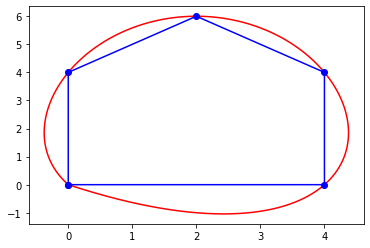

In [33]:

xe, ye = [0, 4, 4, 2, 0, 0], [0, 0, 4, 6, 4, 0]
LagrangeParametrique(xe, ye, 'E')



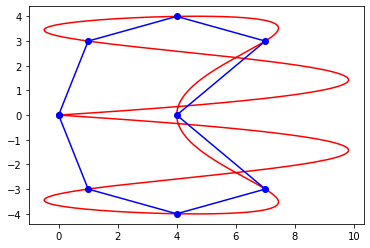

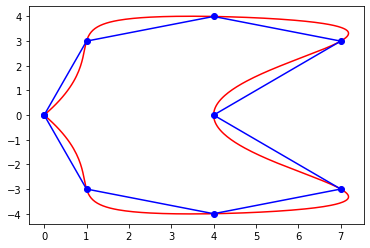

In [34]:

xe, ye = [0, 1, 4, 7, 4, 7, 4, 1, 0], [0, -3, -4, -3, 0, 3, 4, 3, 0]
LagrangeParametrique(xe, ye, 'E')
LagrangeParametrique(xe, ye, 'T')



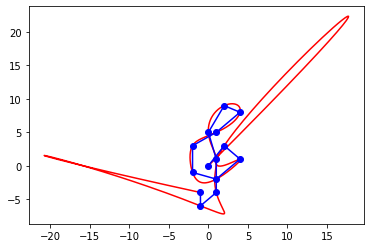

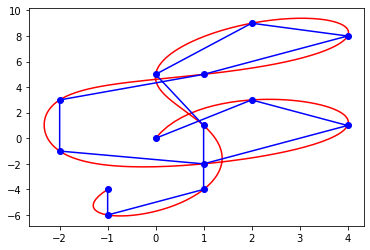

In [35]:

xe, ye = [0, 2, 4, 1, -2, -2, 1, 4, 2, 0, 1, 1, -1, -1], [0, 3, 1, -2, -1, 3, 5, 8, 9, 5, 1, -4, -6, -4]
LagrangeParametrique(xe, ye, 'E')
LagrangeParametrique(xe, ye, 'T')



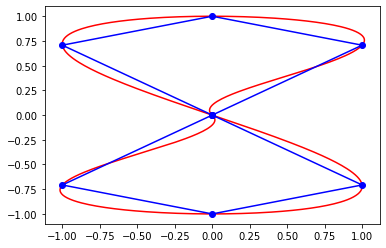

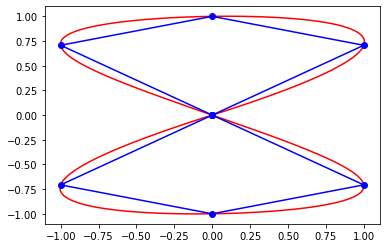

In [36]:

te = np.linspace(0, 2*np.pi, 9)
xe, ye = np.sin(2*te), np.sin(te)
LagrangeParametrique(xe, ye, 'E')
LagrangeParametrique(xe, ye, 'T')



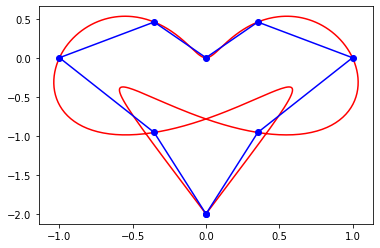

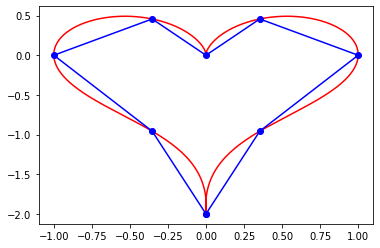

In [37]:

te = np.linspace(-np.pi, np.pi, 9)
xe, ye = np.sin(te)**3, np.cos(te)-np.cos(te)**4
LagrangeParametrique(xe, ye, 'E')
LagrangeParametrique(xe, ye, 'T')




<p><a id="Exo10"></a></p><div align="right"><a href="#top">Haut du document</a></div>



<div class="alert alert-info"><font color="black" size="5"><b>10. Perturbation de l’interpolation de Lagrange (facultatif )</b></font></div>



<h4 id="Exercice-10.">Exercice 10.<a class="anchor-link" href="#Exercice-10.">¶</a></h4><p>Soit $f : x \mapsto sin(x)$ sur $[a, b] = [0, 5]$.<br/><br/></p>
<ol>
<li><p>On souhaite visualiser l’impact sur la qualité du polynôme interpolateur de Lagrange en cas de perturbations des données.<br/>
Soit donc $n \in \mathbb{N}-\{0,1\}$ fixé.<br/></p>
<ul>
<li>Construire la liste des abscisses d’interpolation équiréparties $x_k = \frac{5k}{n}$.<br/></li>
<li>Construire la liste des ordonnées des points d’interpolation $y_k = sin(x_k)$.<br/></li>
<li>Construire une liste d’ordonnées des points d’interpolation après perturbation de l’ordre de $10^{-5}$, c’est-à-dire que ces ordonnées $z_k$ sont construite en ajoutant à $y_k = sin(x_k)$ un nombre aléatoire de l’ordre de $10^{-5}$.<br/></li>
<li>Construire le polynôme interpolateur de Lagrange $p_n$ associé aux points de coordonnées $(x_k, y_k)$.</li>
<li>Construire le polynôme interpolateur de Lagrange $\hat{p}_n$ associé aux points de coordonnées $(x_k, z_k)$.</li>
<li>Représenter graphiquement et sur la même fenêtre la fonction $sin()$ et les deux polynômes $p_n$ et $\hat{p}_n$ pour $n \in \{10, 15, 20, 25, 30, 35, 40\}$.</li>
<li>Recommencer avec des perturbations d’ordre de grandeur différents.<br/><br/></li>
</ul>
</li>
<li><p>Faire de même avec les points de Tchebychev.<br/><br/></p>
</li>
<li><p>Comparer les résultats entre points équidistants et points de Tchebychev avec une même perturbation.<br/>
 Qu’observez-vous ?<br/><br/></p>
</li>
<li><p>Montrer les limites de Python en traçant $p_n$ pour les points équidistants et pour les points de Tchebychev pour $n$ grand avec la fonction $f : x \mapsto sin(x)$ sur l’intervalle $[0, 5]$. En théorie, $p_n$ converge uniformément vers $f$ quand $n$ tend vers l’infini.<br/> Qu’observez-vous ? Expliquez.</p>
</li>
</ol>



<div class="alert alert-success"><b><font color="black" face="Times" size="3">Réponse</font></b> :
</div>


In [38]:

def PerturbationSinus(ne, h, Tche):
    """
    NE  est le nombre de points d'échantillonnage
    h   est l'amplitude maximale de la perturbation
    Tch est un booléen (True=régulier - False=Tchebytchev)
    """
    
    xmin, xmax, ns = 0.0, 5.0, 1000
 
    if Tche:
        xe = Tchebychev(xmin,xmax, ne-1)
        xlabel = '(abscisses de Tchebytchev)'
        loc = 'lower center'
    else:
        xe = np.linspace(xmin, xmax, ne)
        xlabel = '(abscisses régulières)'
        loc = 'upper center'
        
    ye = np.sin(xe)
    ze = ye + h*(2*np.random.rand(ne)-1) # h est l'amplitude maximale de la perturbation
    LagY = InterpLagrange2(xe, ye)
    LagZ = InterpLagrange2(xe, ze)
    
    xs = np.linspace(xmin, xmax, ns)
    ys = poly.polyval(xs, LagY)
    zs = poly.polyval(xs, LagZ)
    
    plt.figure(figsize=(12,6))
    
    plt.plot(xe, ye, '-g', label='Sinus')
    plt.plot(xe, ze, ':k', label='Sinus perturbé')
    plt.plot(xs, ys, 'b', label='Lagrange')
    plt.plot(xs, zs, '-r', label='Lagrange pertubé')
    
    plt.title("Méthode de Lagrange pour l'interpolation polynomiale (n="+str(ne-1)+")")
    plt.xlabel('Perturbation de la fonction sinus '+xlabel)
    plt.ylabel('Amplitude maximale de la perturbation = '+str(h))
    plt.legend(loc=loc)
    plt.axhline(color='m', linewidth=1)
    plt.axvline(color='m', linewidth=1)



NameError: name 'Tchebychev' is not defined

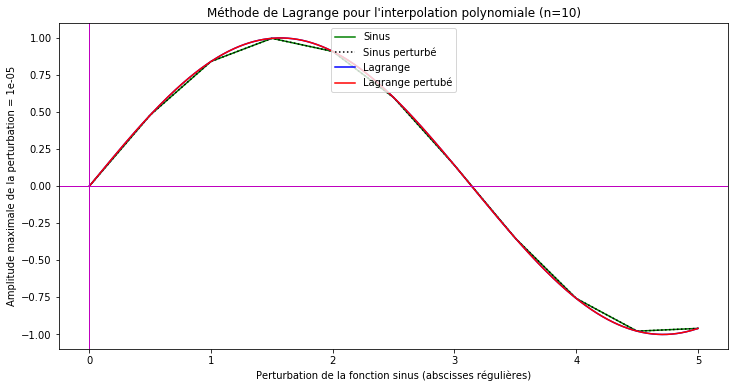

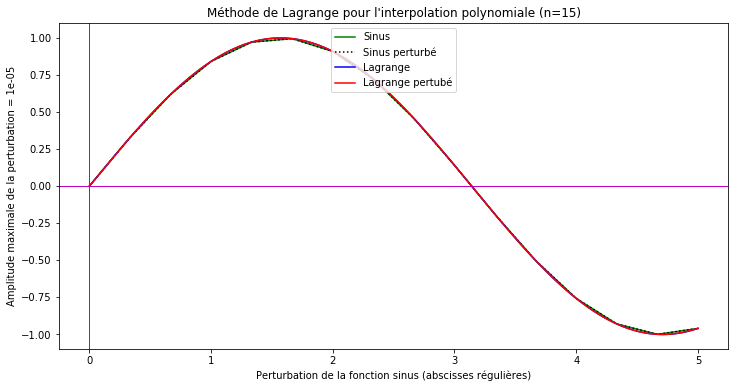

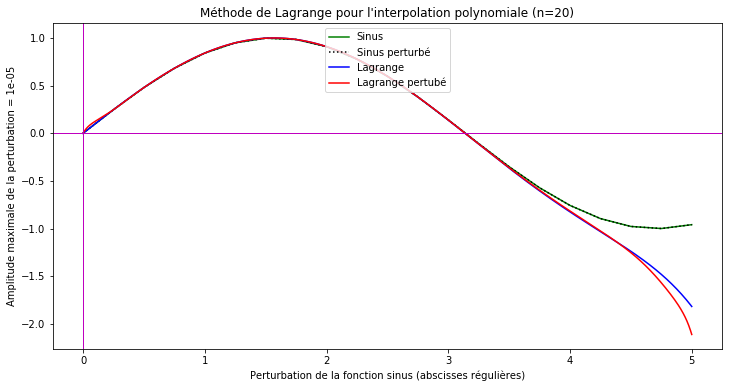

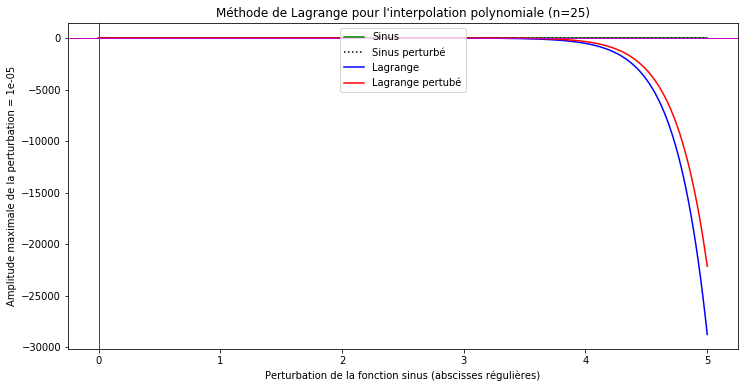

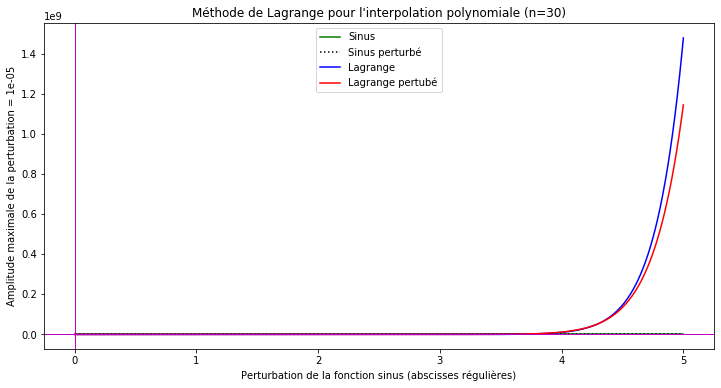

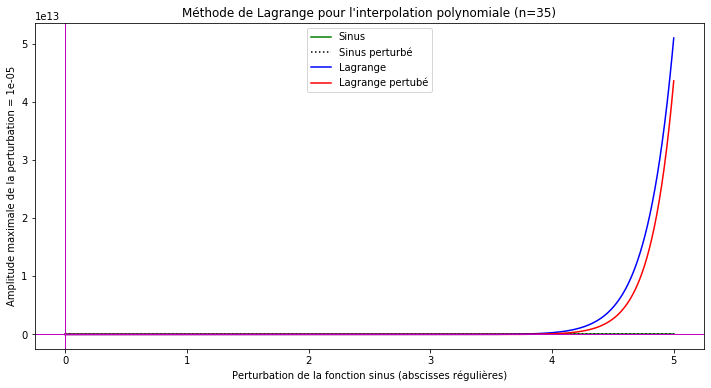

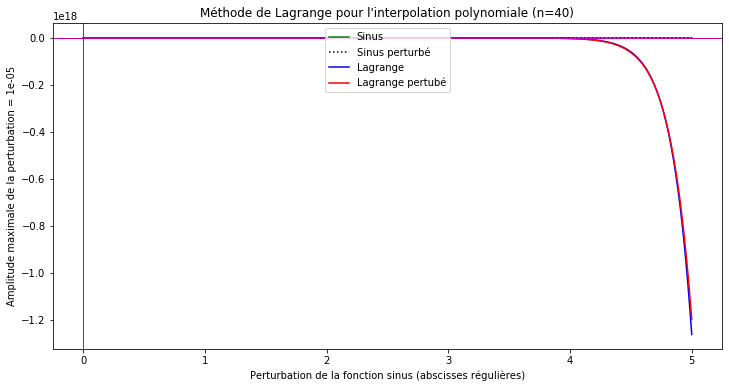

In [39]:

# Script principal de test
M = [11, 16, 21, 26, 31, 36, 41]
for m in M:
    # Cas a : abscisses équiréparties
    PerturbationSinus(m, 1.e-5, False) # abscisses équiréparties
for m in M:    
    # Cas b : abscisses de Tchebychev
    PerturbationSinus(m, 1.e-5, True) # abscisses de Tchebychev



In [ ]:

PerturbationSinus(22, 1.e-5, True)




<p><a id="Exo11"></a></p><div align="right"><a href="#top">Haut du document</a></div>



<div class="alert alert-info">
<font color="black" size="5"><b>11. Indications</b></font>
</div>



<p>VOIR L'ENONCE</p>
